Calculating masses for MerianCDM feedback type.
Total data points: 219
Data points after NaN removal: 210
NaN percentage: 4.11%
Data points after outlier removal: 205
Outlier percentage: 6.39%
Saving ../../Figures/3DShapesv2/r431.MerianCDM/Stars.1.png
Total data points: 218
Data points after NaN removal: 206
NaN percentage: 5.50%
Data points after outlier removal: 202
Outlier percentage: 7.34%
Saving ../../Figures/3DShapesv2/r442.MerianCDM/Stars.1.png
Total data points: 238
Data points after NaN removal: 235
NaN percentage: 1.26%
Data points after outlier removal: 230
Outlier percentage: 3.36%
Saving ../../Figures/3DShapesv2/r468.MerianCDM/Stars.1.png
Total data points: 227
Data points after NaN removal: 225
NaN percentage: 0.88%
Data points after outlier removal: 219
Outlier percentage: 3.52%
Saving ../../Figures/3DShapesv2/r488.MerianCDM/Stars.1.png
Total data points: 183
Data points after NaN removal: 178
NaN percentage: 2.73%
Data points after outlier removal: 174
Outlier percentag

/tmp/ipykernel_655244/3769858477.py:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f,ax=plt.subplots(1,1,figsize=(20,8))


Total data points: 259
Data points after NaN removal: 251
NaN percentage: 3.09%
Data points after outlier removal: 248
Outlier percentage: 4.25%
Saving ../../Figures/3DShapesv2/r615.MerianCDM/Stars.1.png
Total data points: 155
Data points after NaN removal: 145
NaN percentage: 6.45%
Data points after outlier removal: 140
Outlier percentage: 9.68%
Saving ../../Figures/3DShapesv2/r618.MerianCDM/Stars.1.png
Total data points: 156
Data points after NaN removal: 149
NaN percentage: 4.49%
Data points after outlier removal: 146
Outlier percentage: 6.41%
Saving ../../Figures/3DShapesv2/r634.MerianCDM/Stars.1.png
Total data points: 161
Data points after NaN removal: 151
NaN percentage: 6.21%
Data points after outlier removal: 149
Outlier percentage: 7.45%
Saving ../../Figures/3DShapesv2/r642.MerianCDM/Stars.1.png
Total data points: 169
Data points after NaN removal: 163
NaN percentage: 3.55%
Data points after outlier removal: 160
Outlier percentage: 5.33%
Saving ../../Figures/3DShapesv2/r656.Me

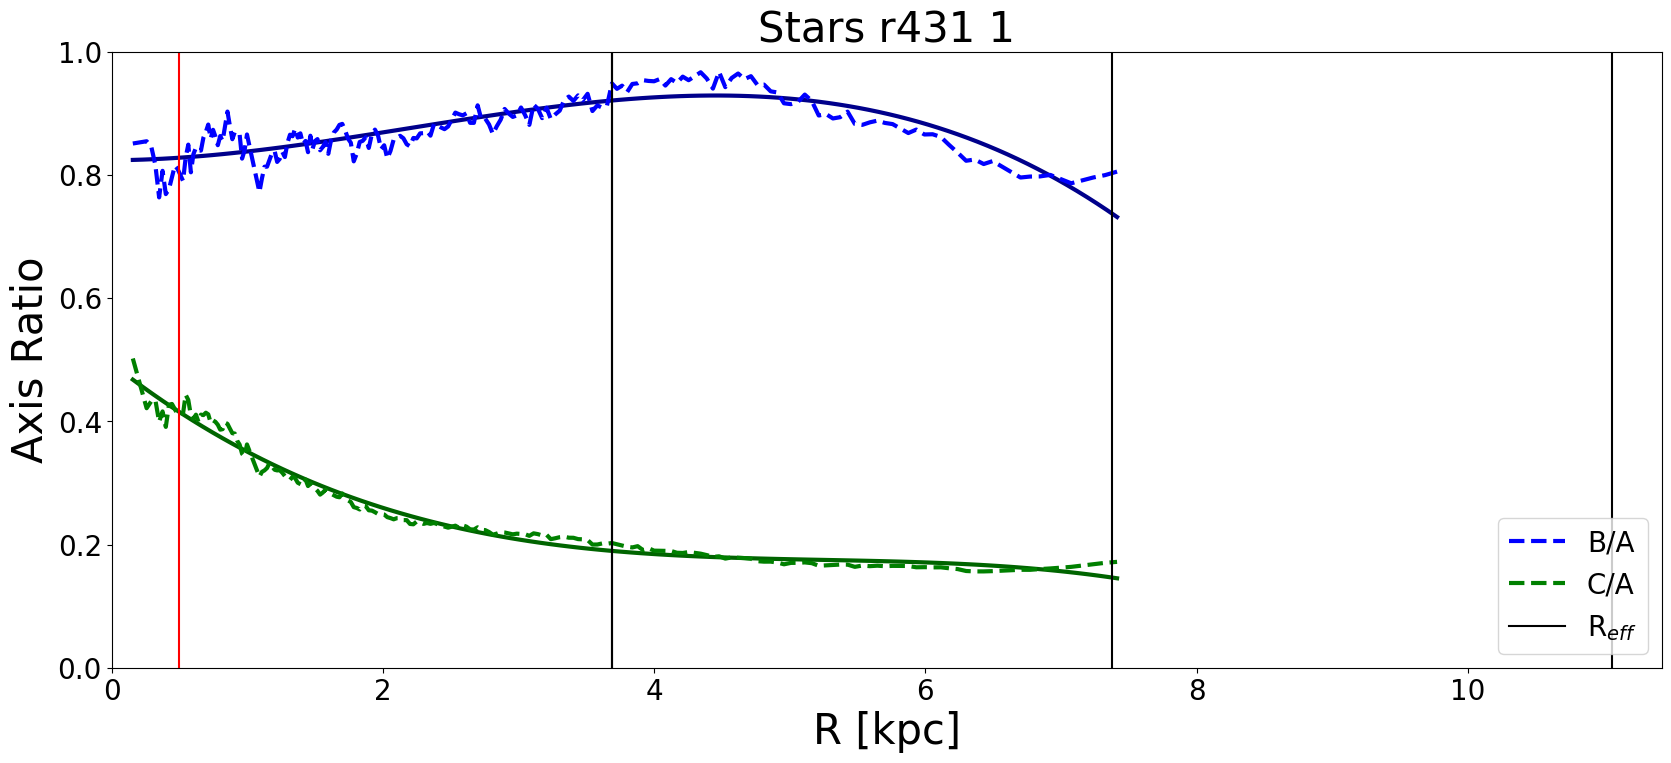

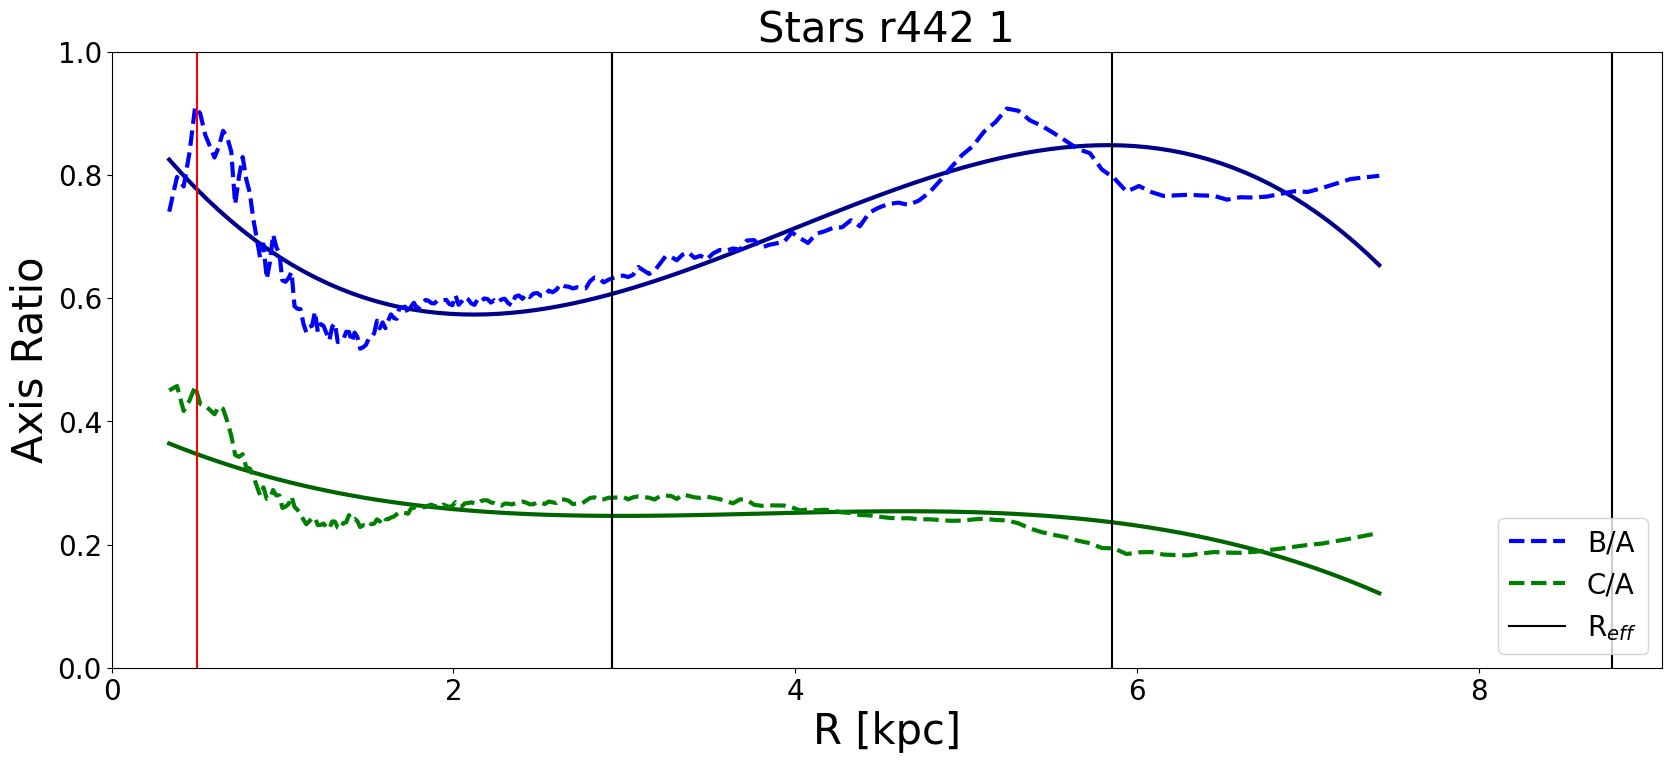

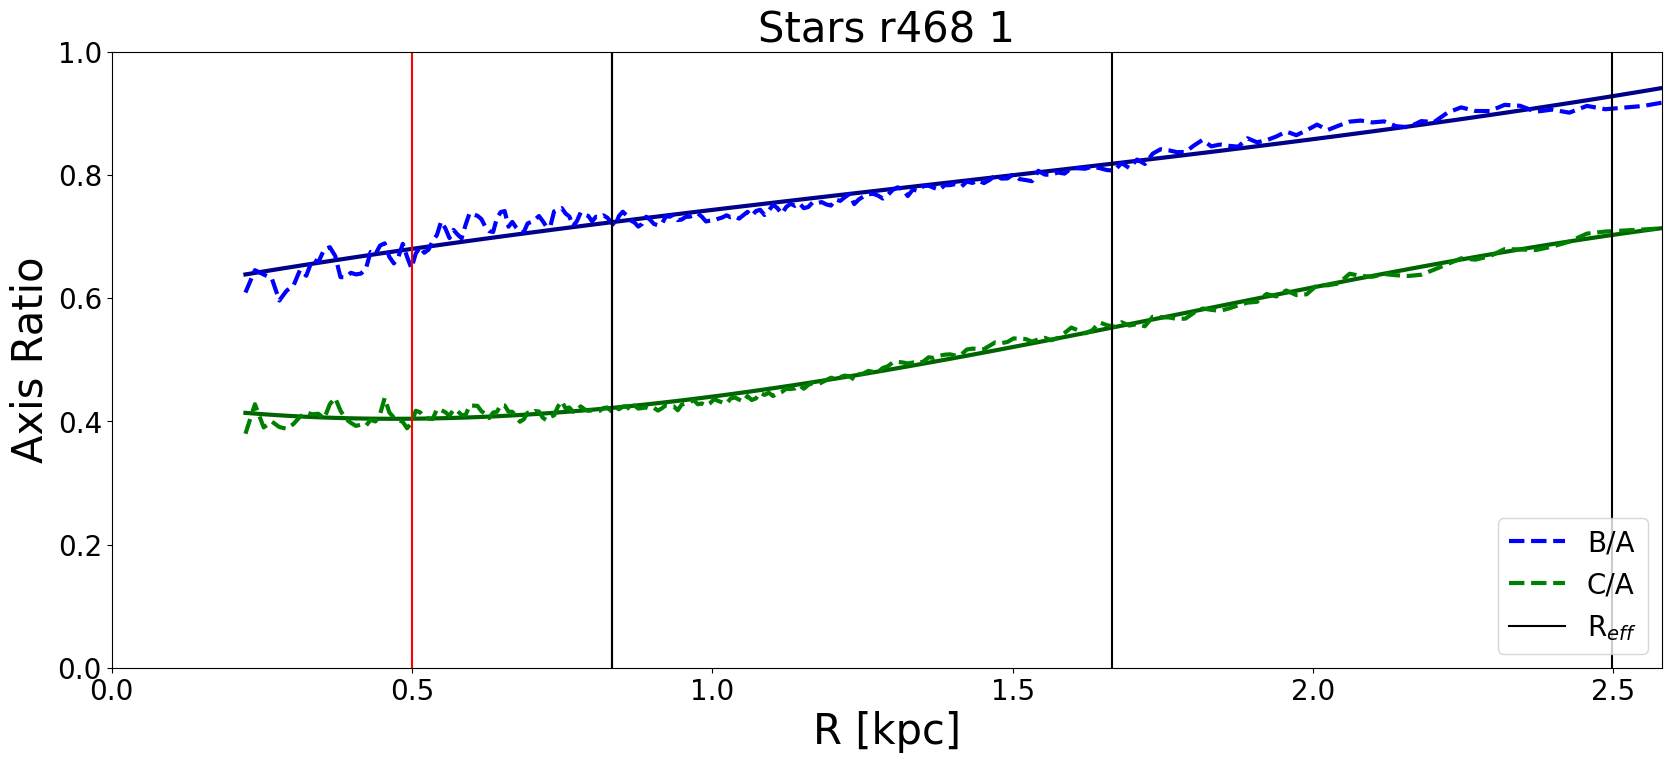

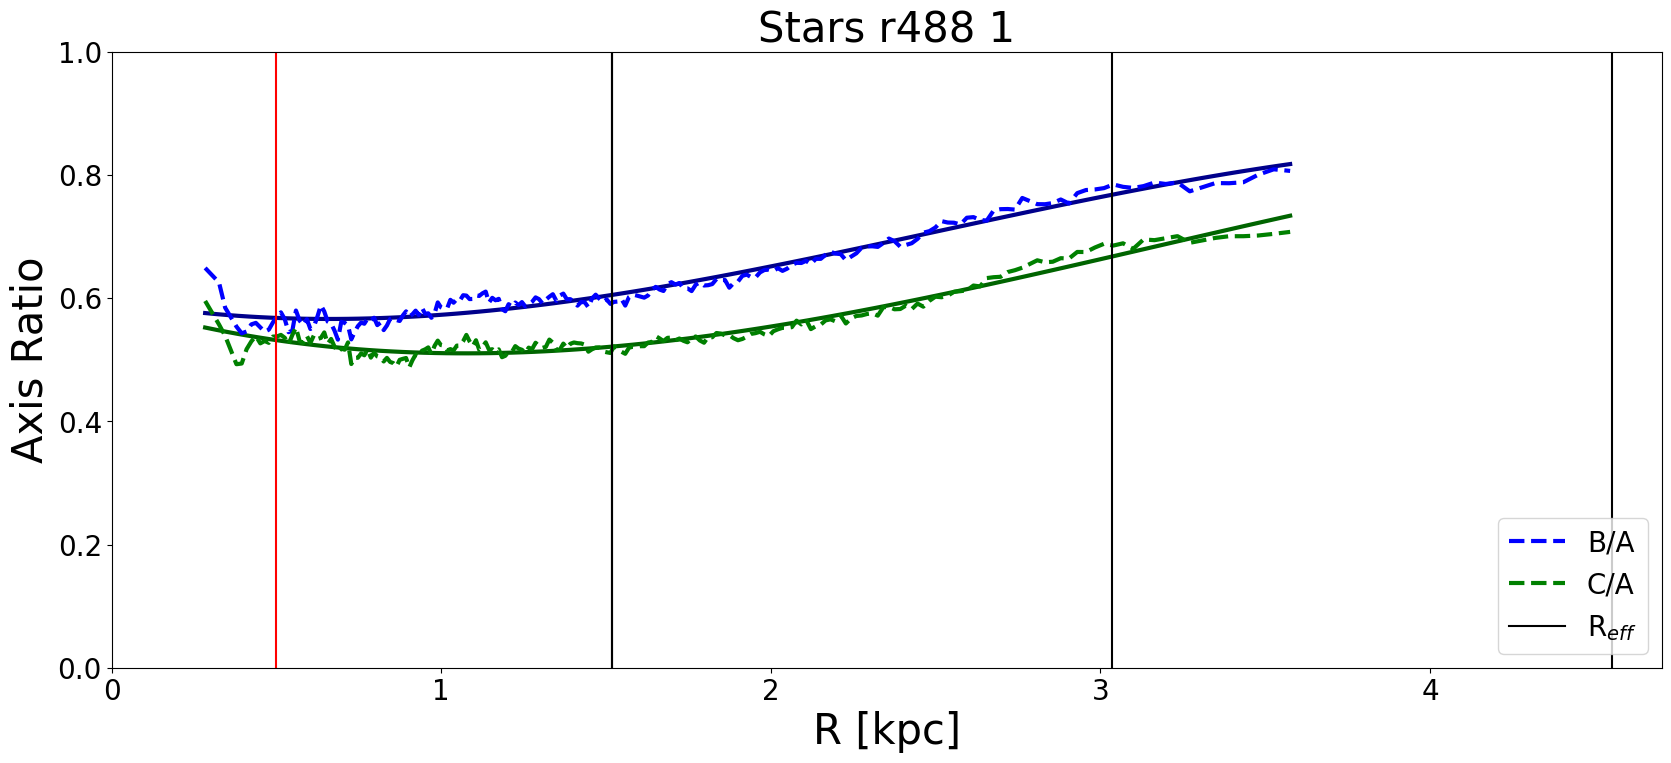

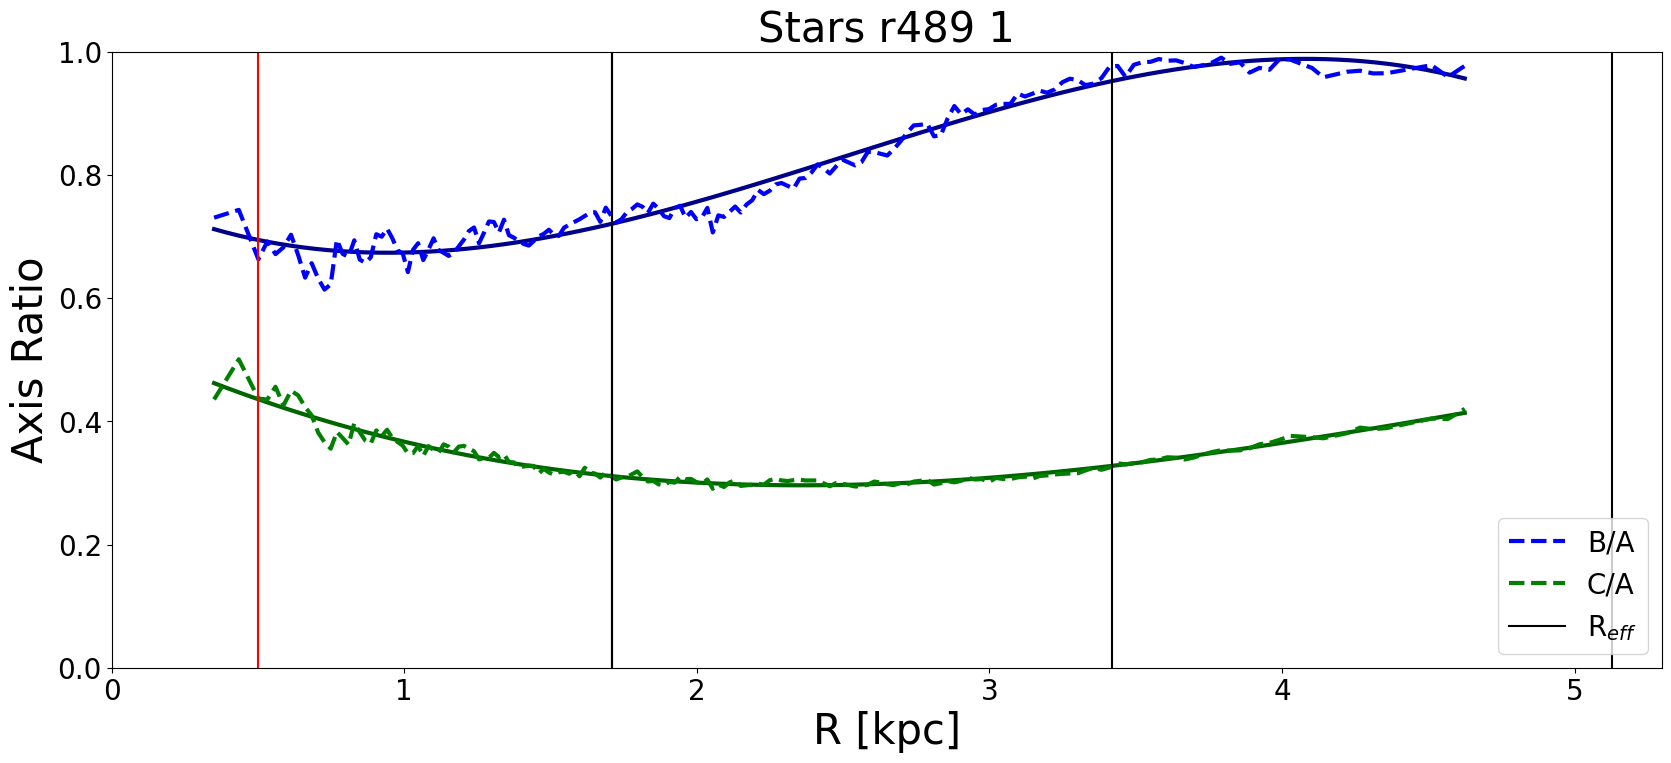

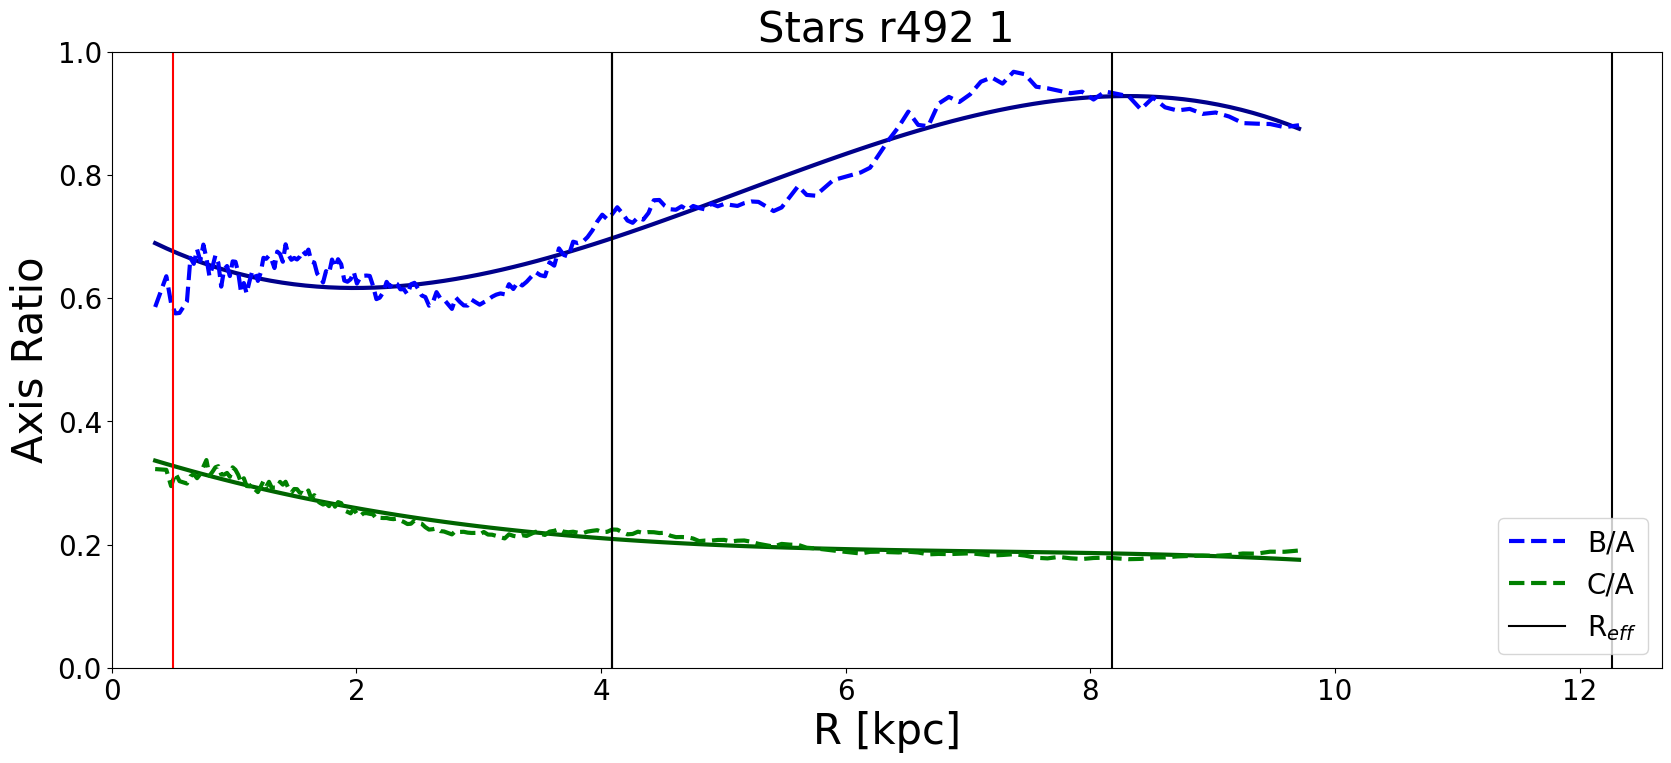

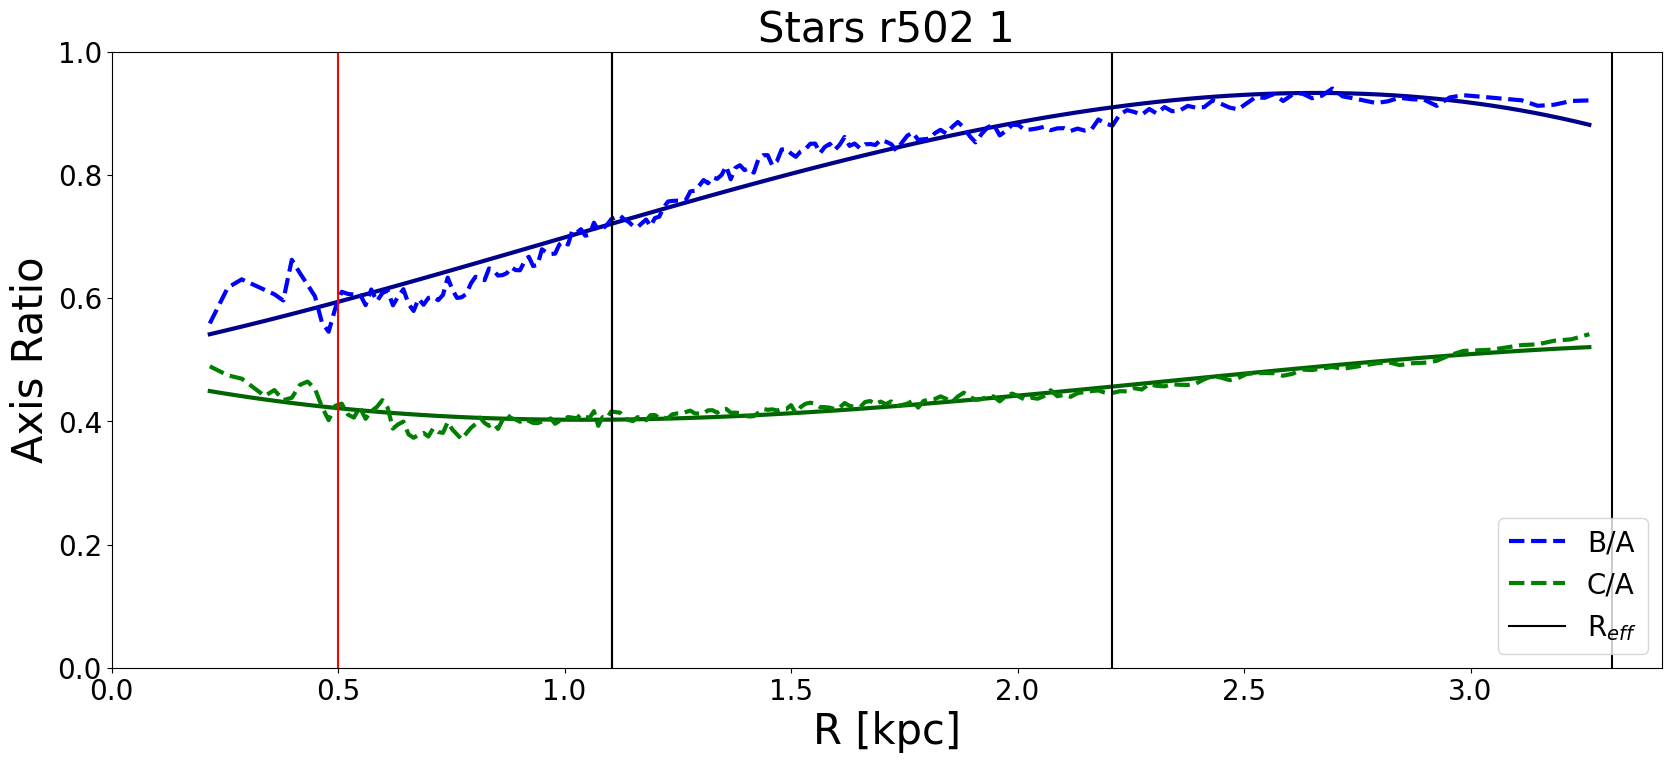

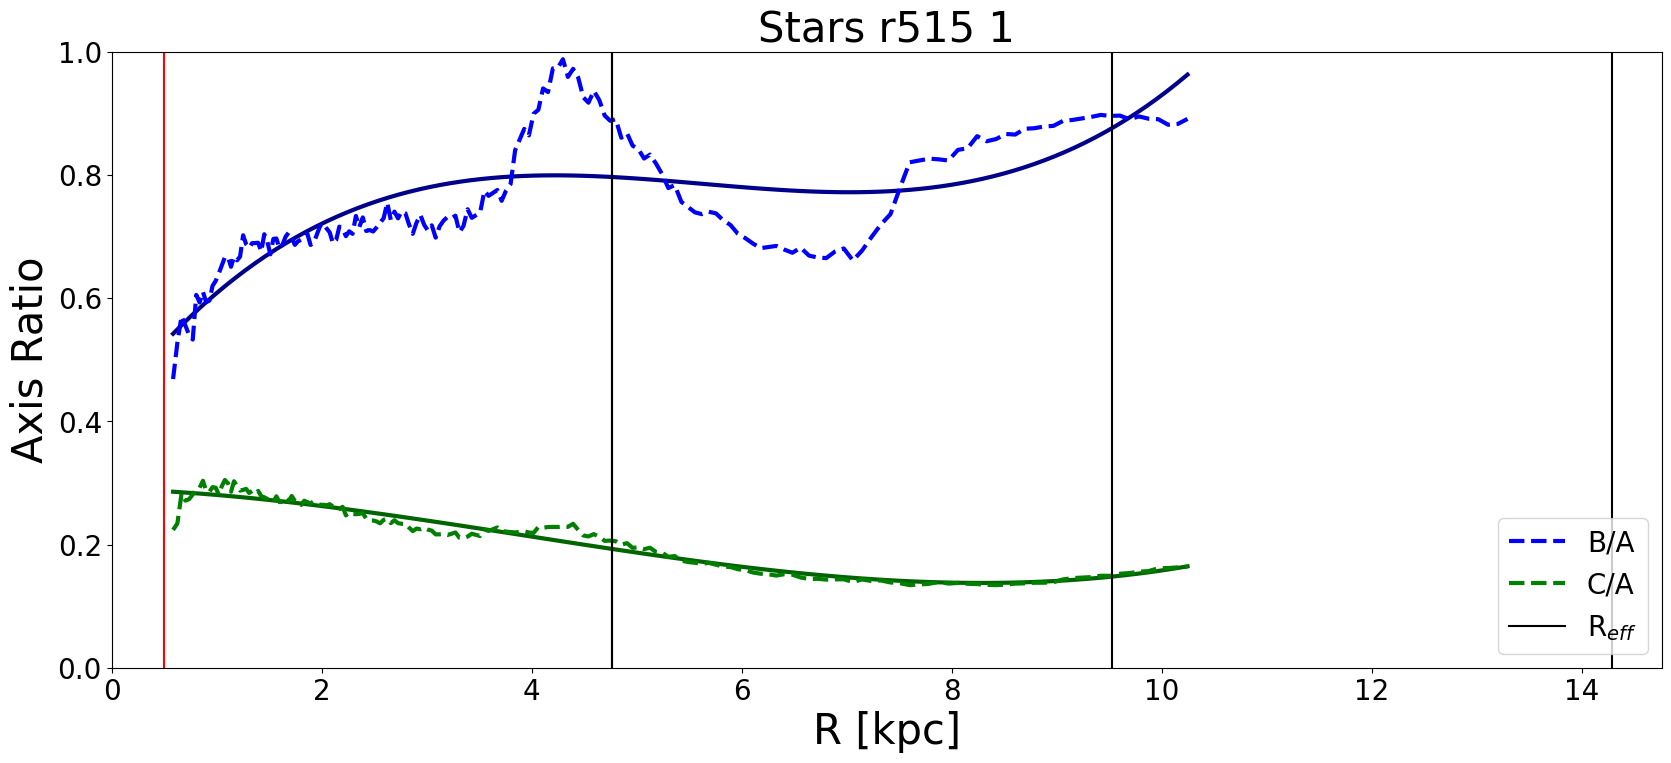

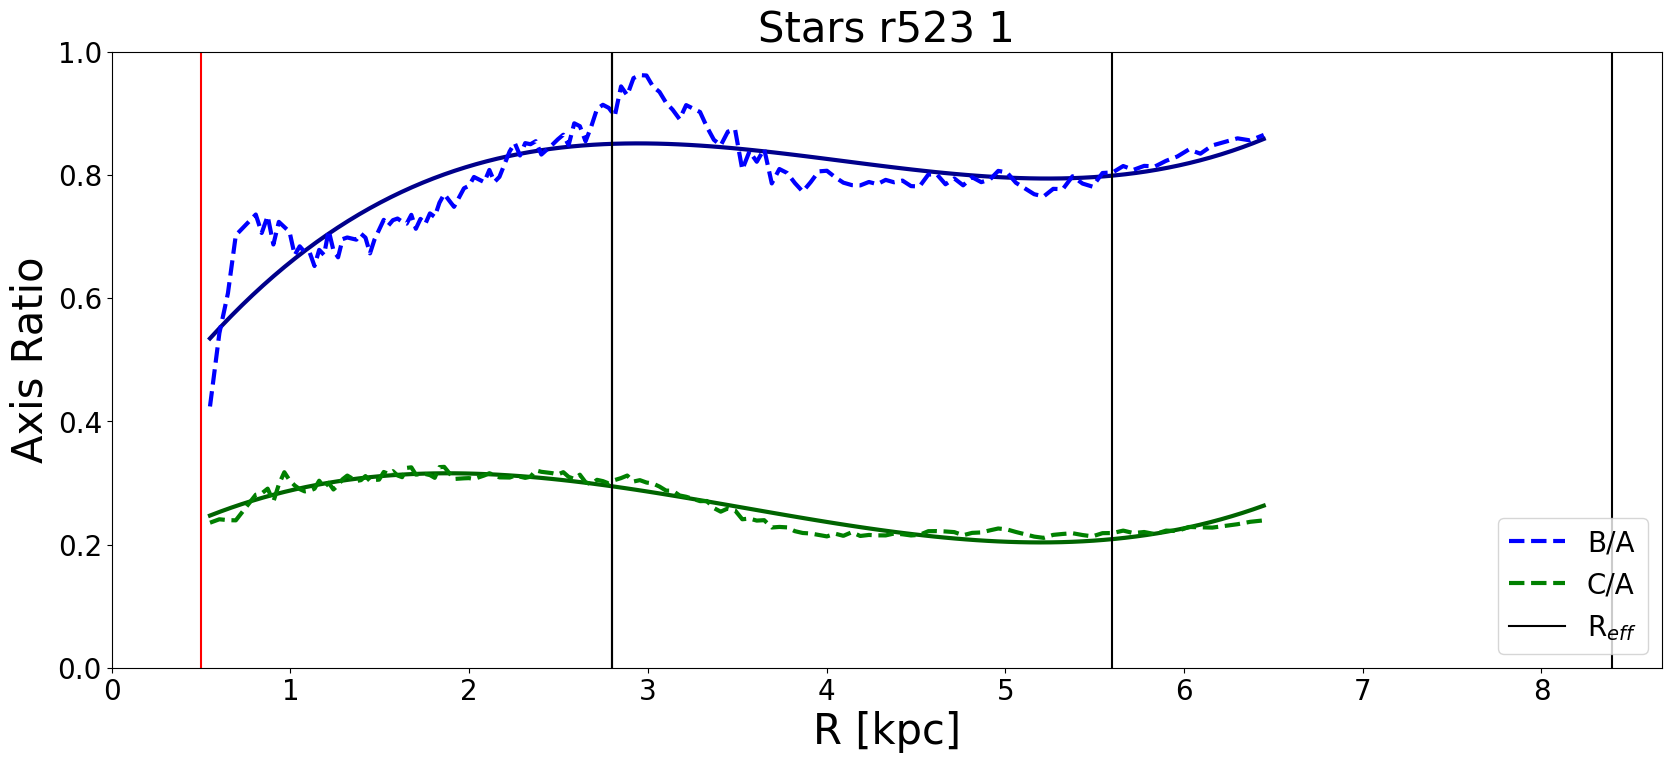

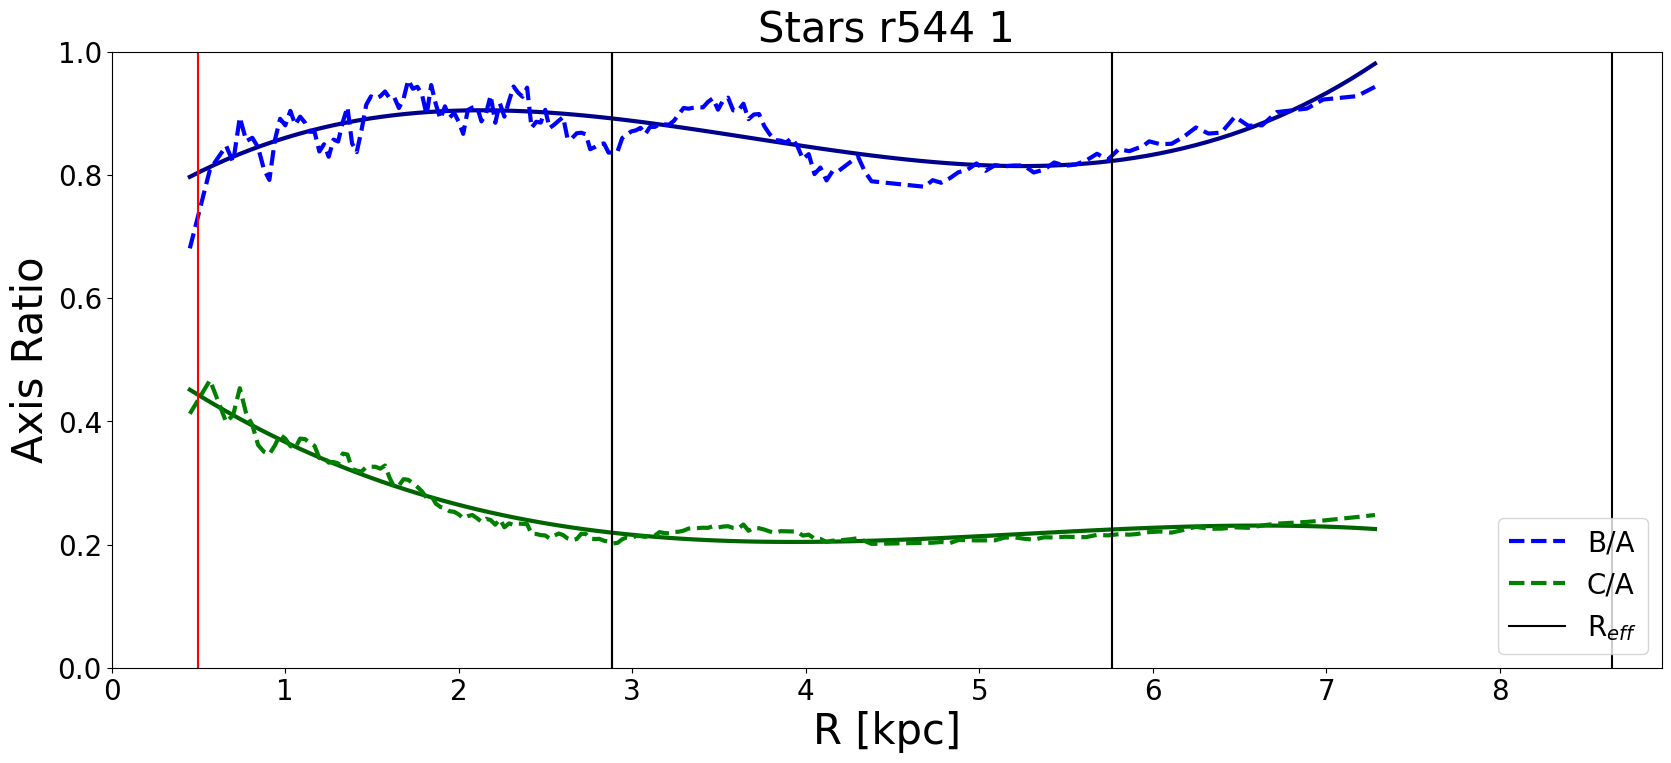

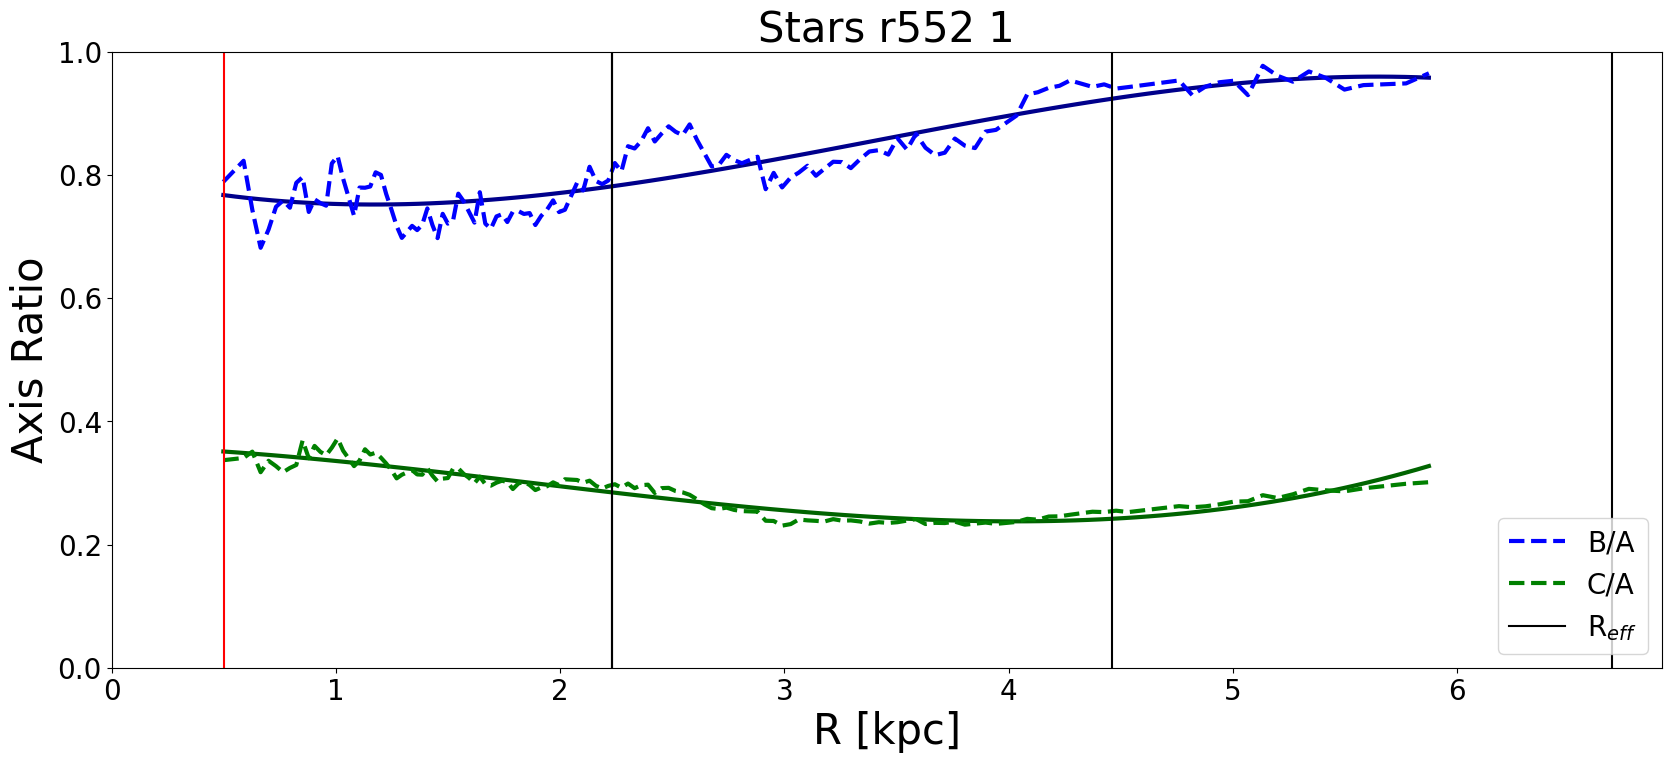

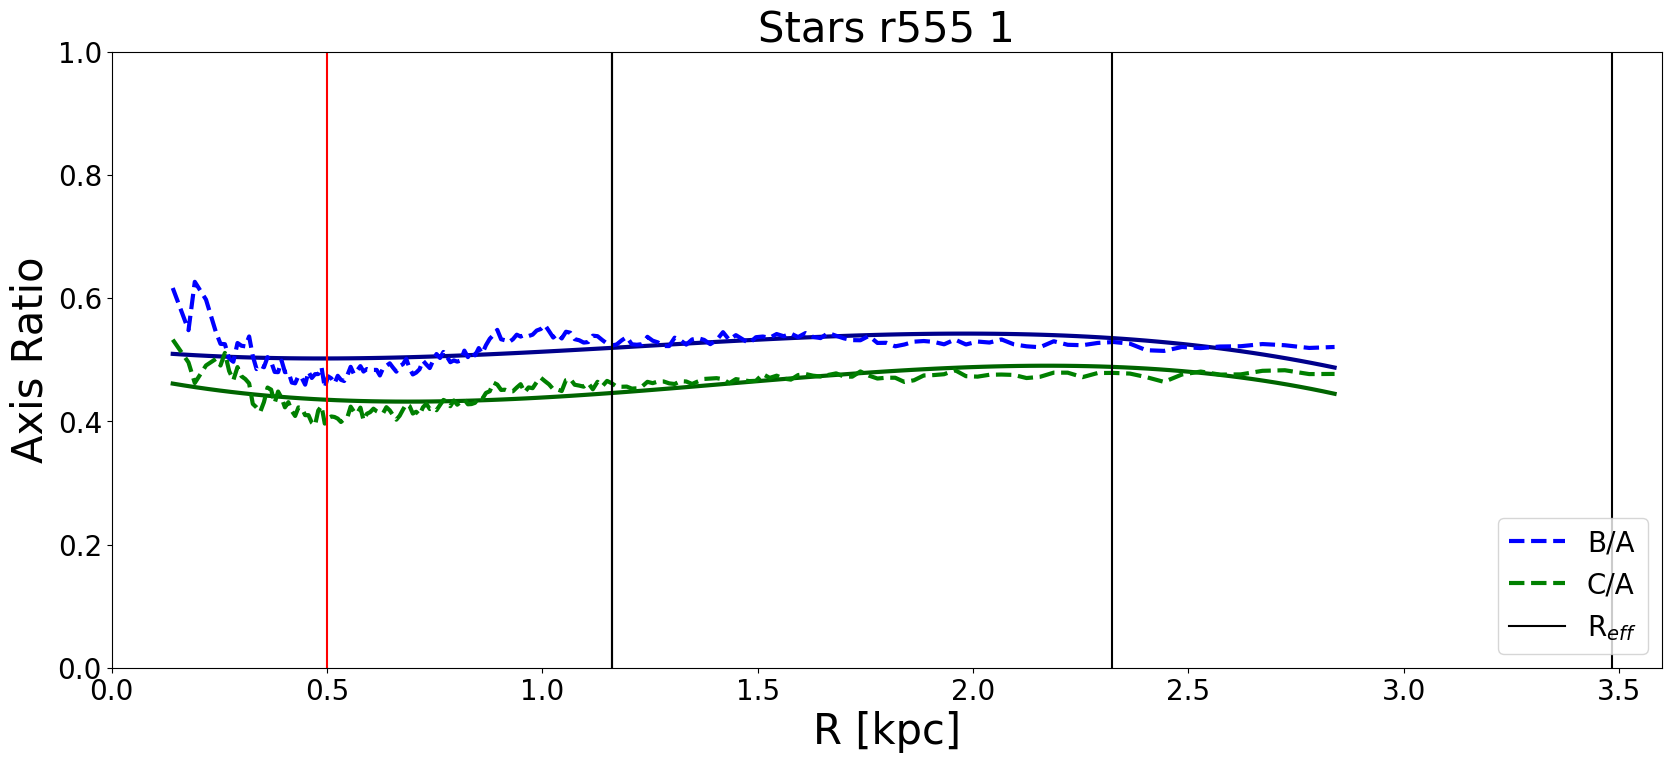

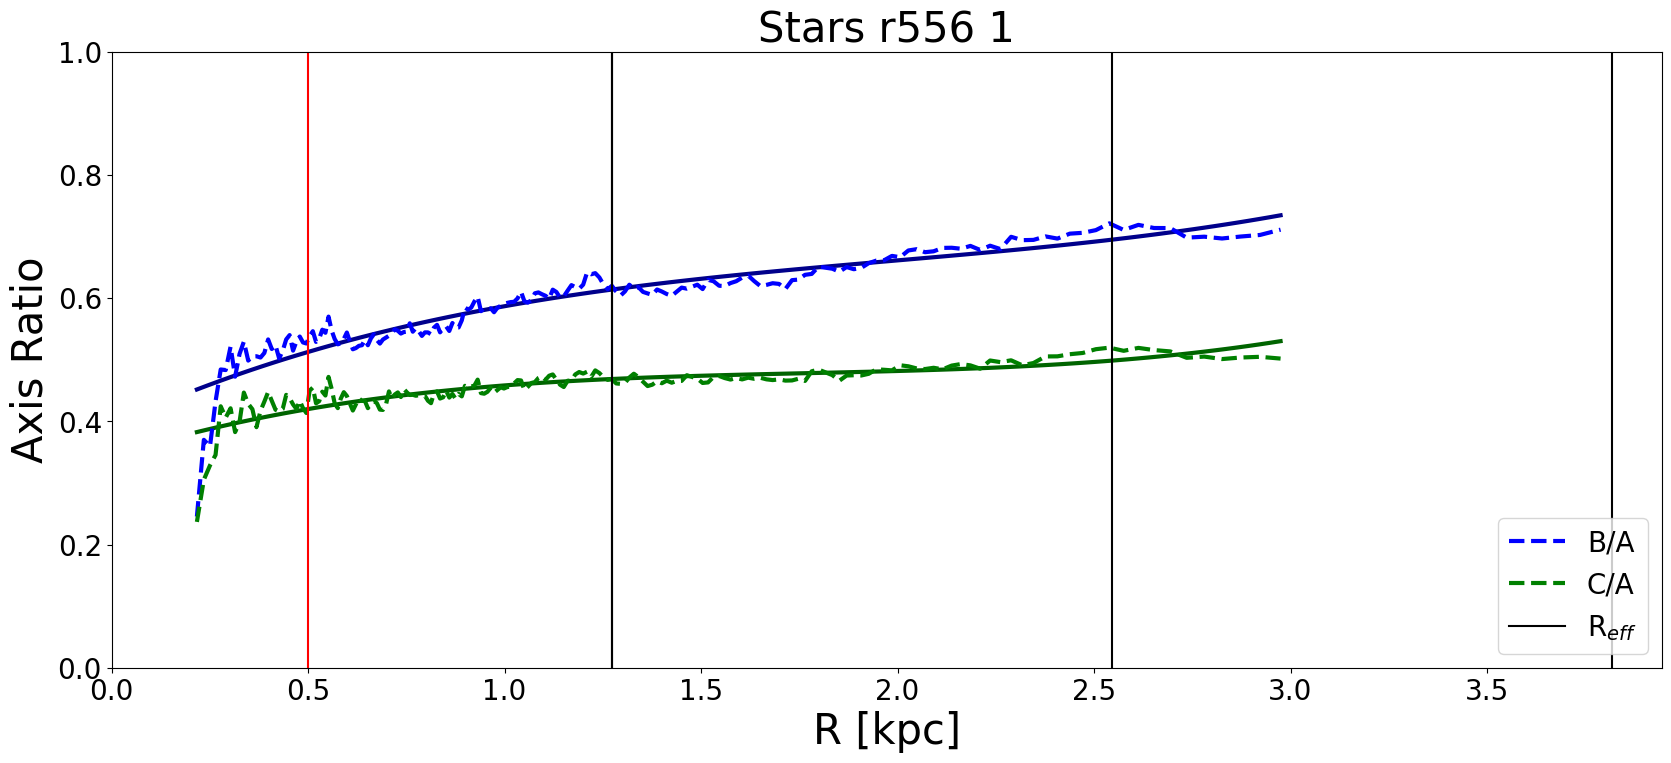

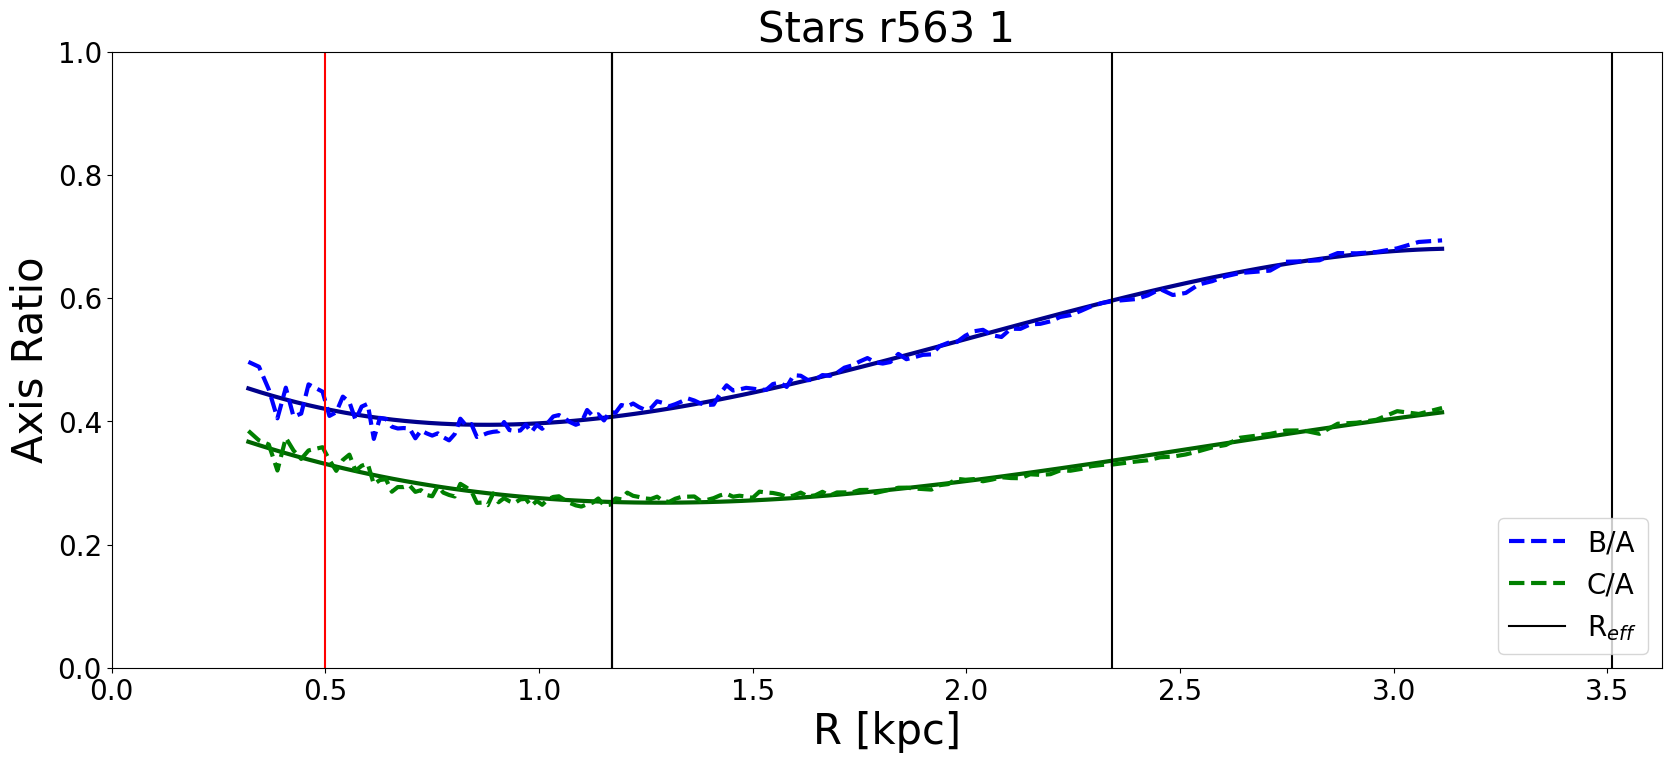

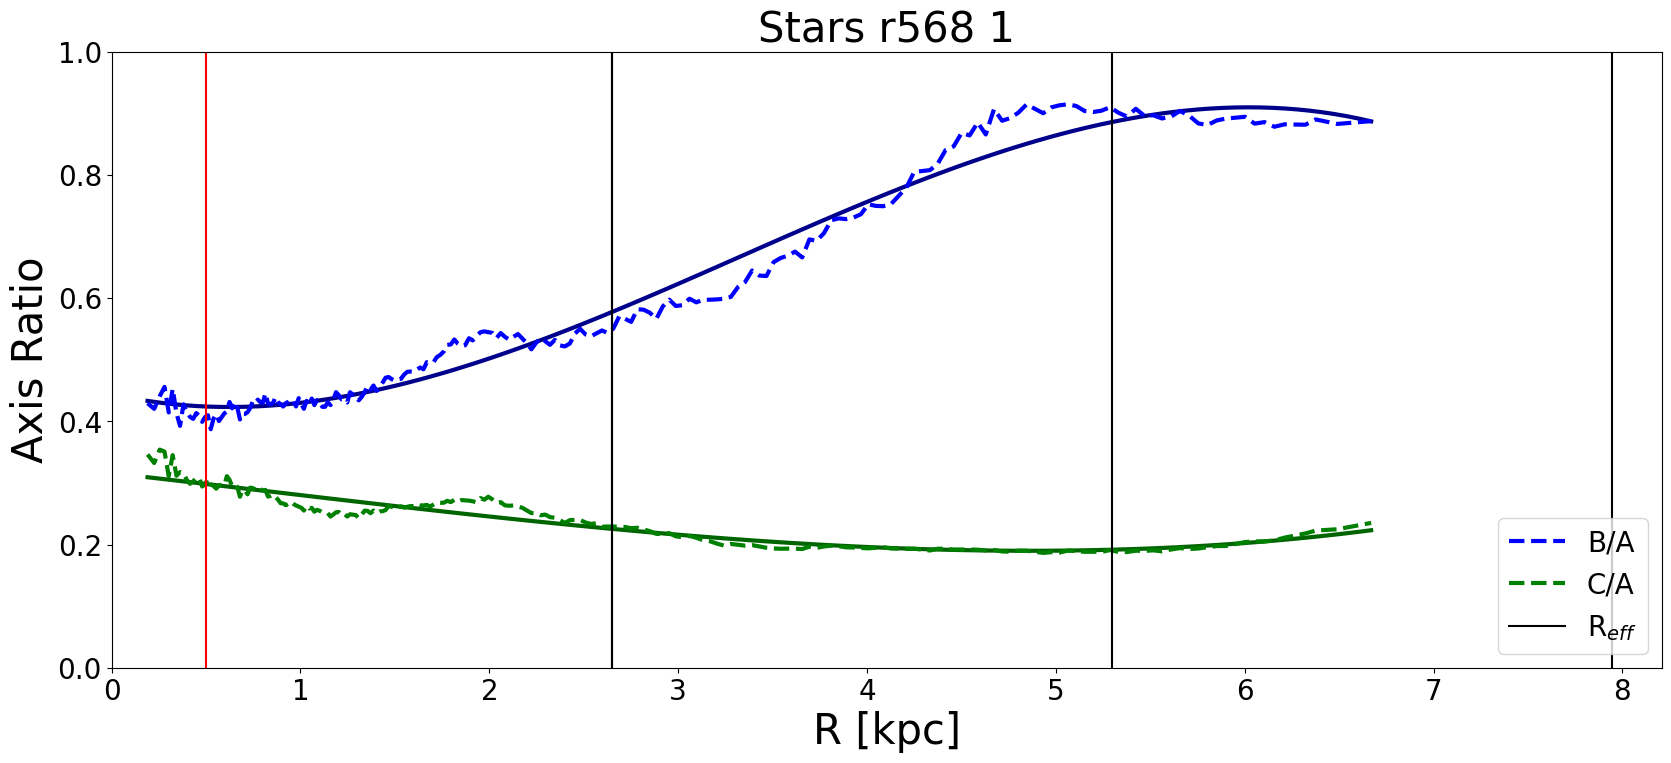

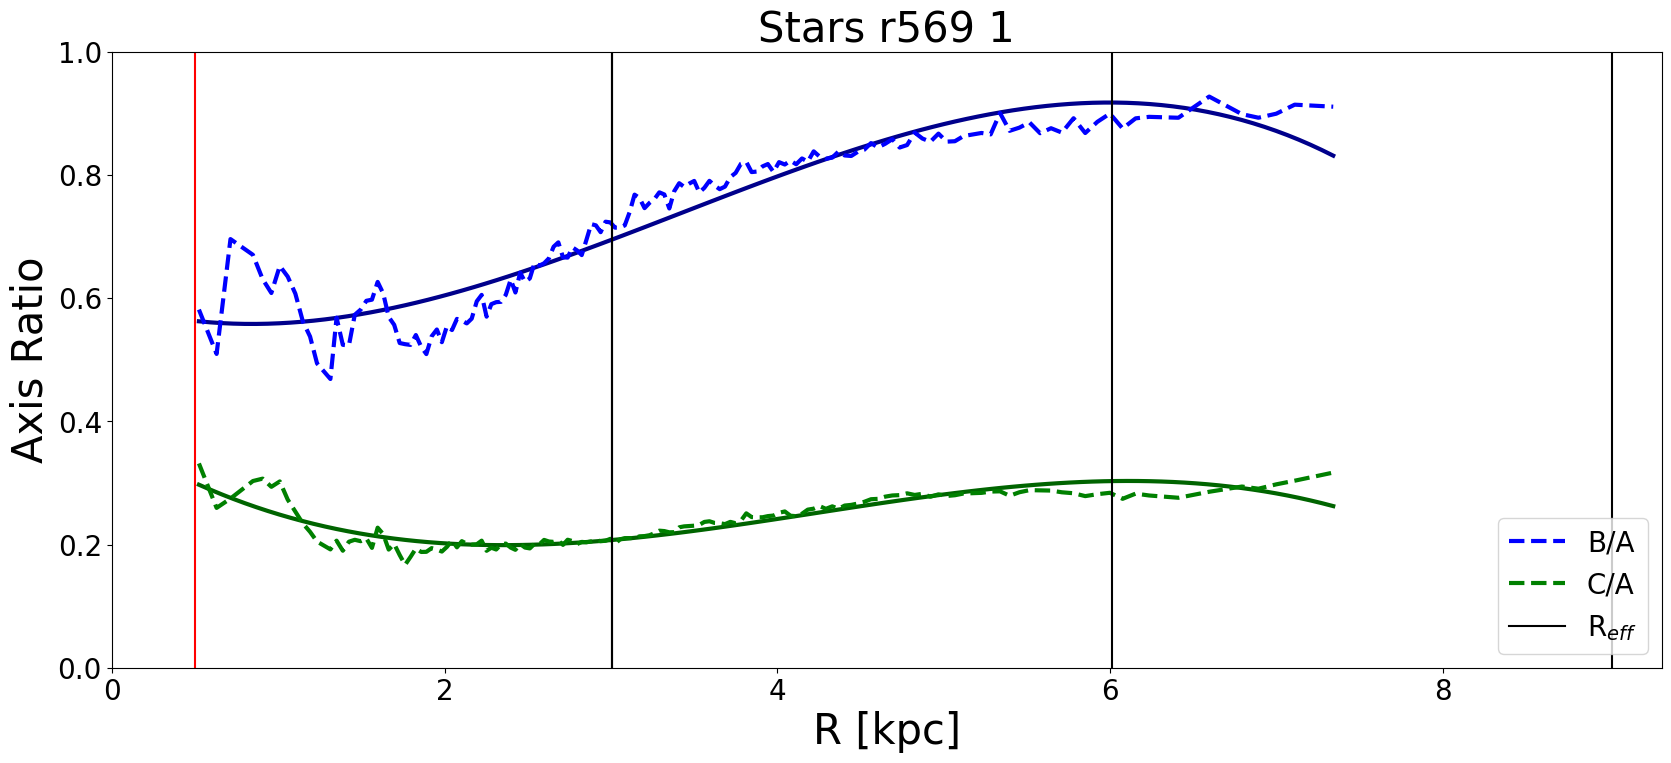

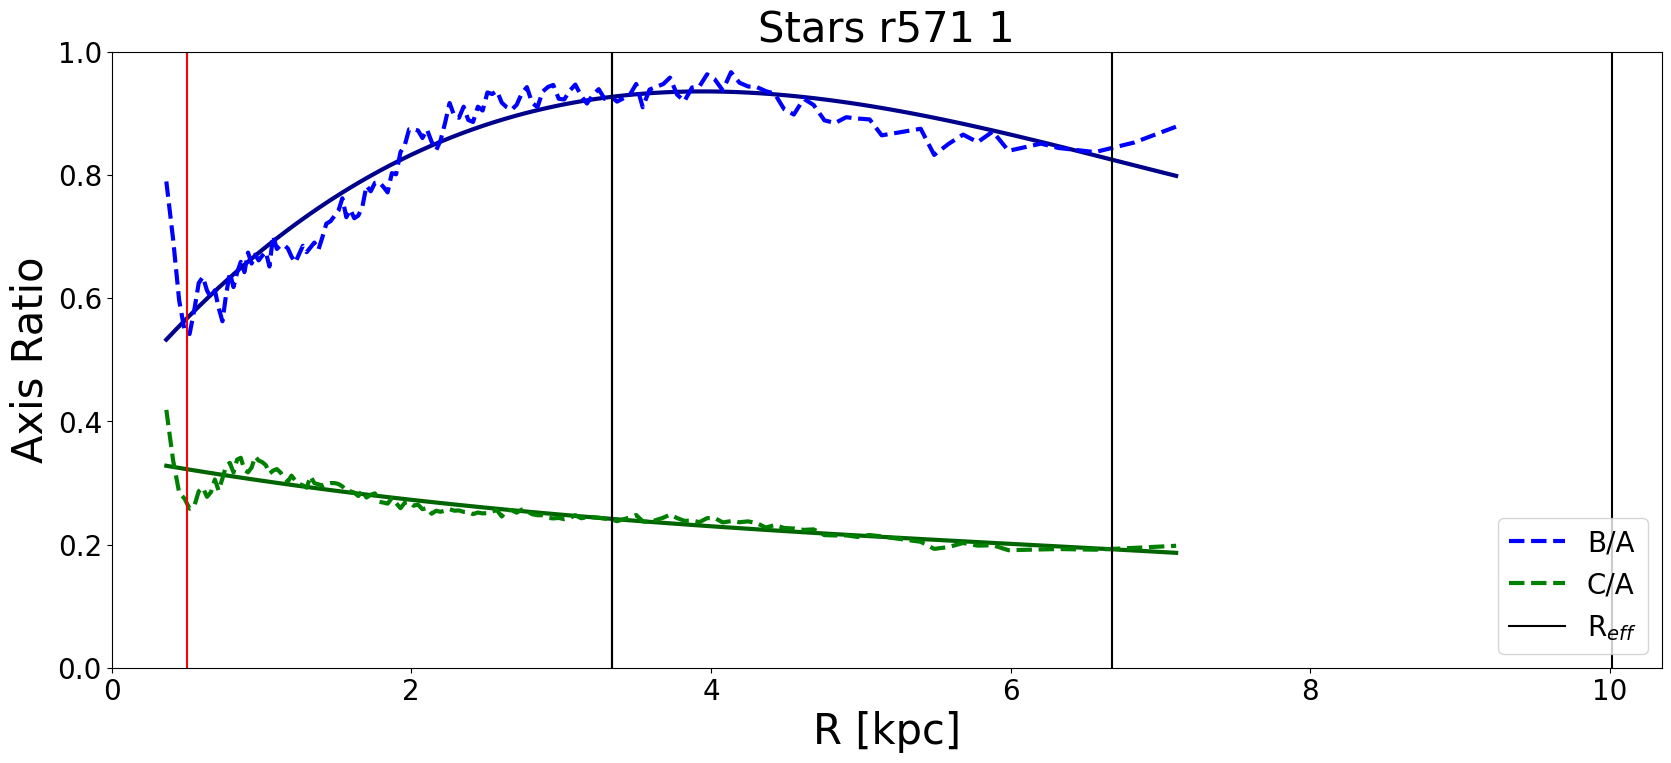

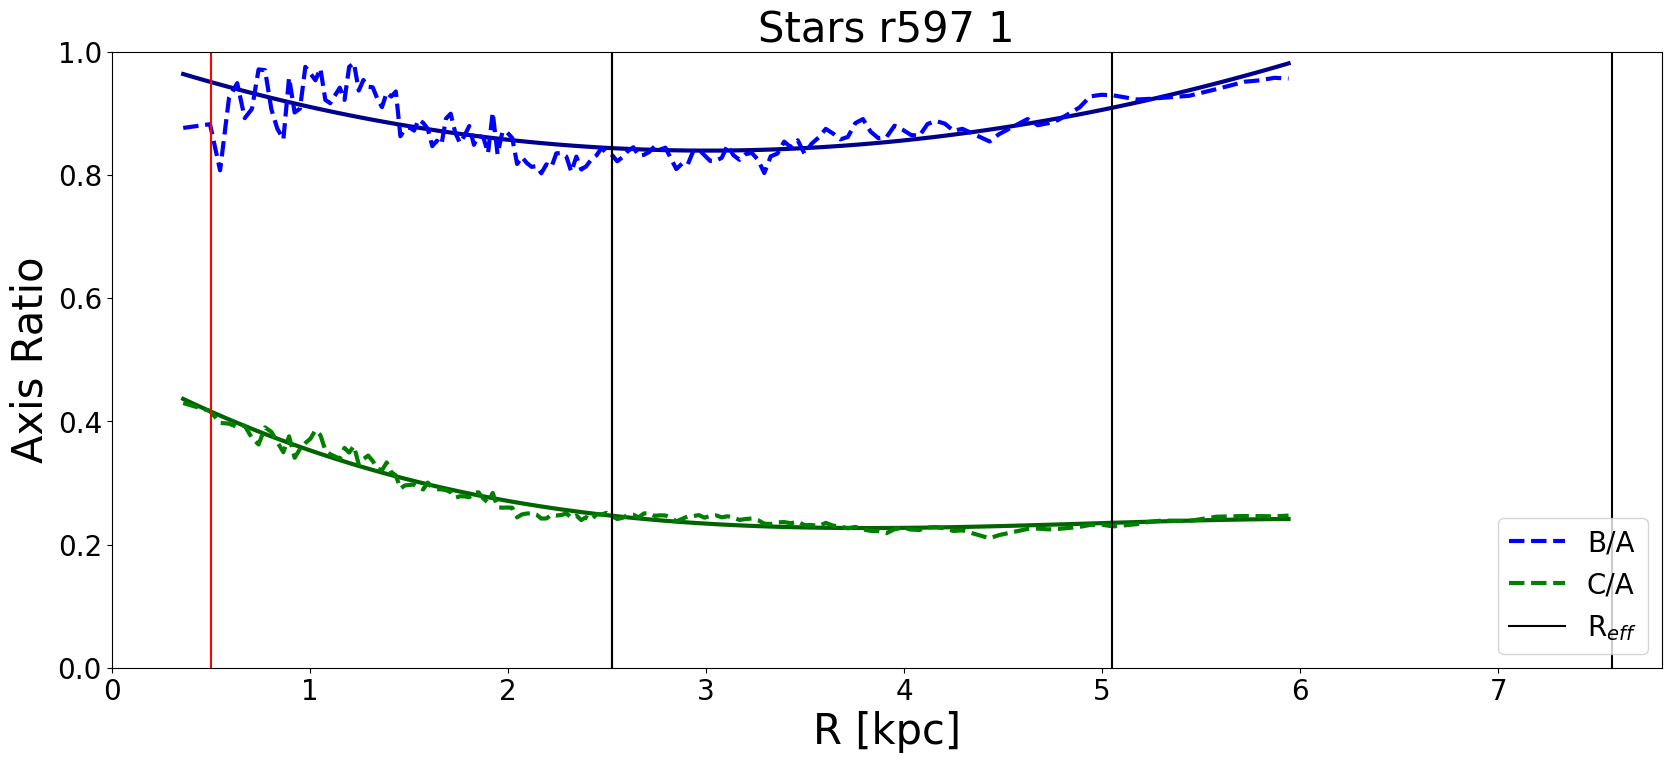

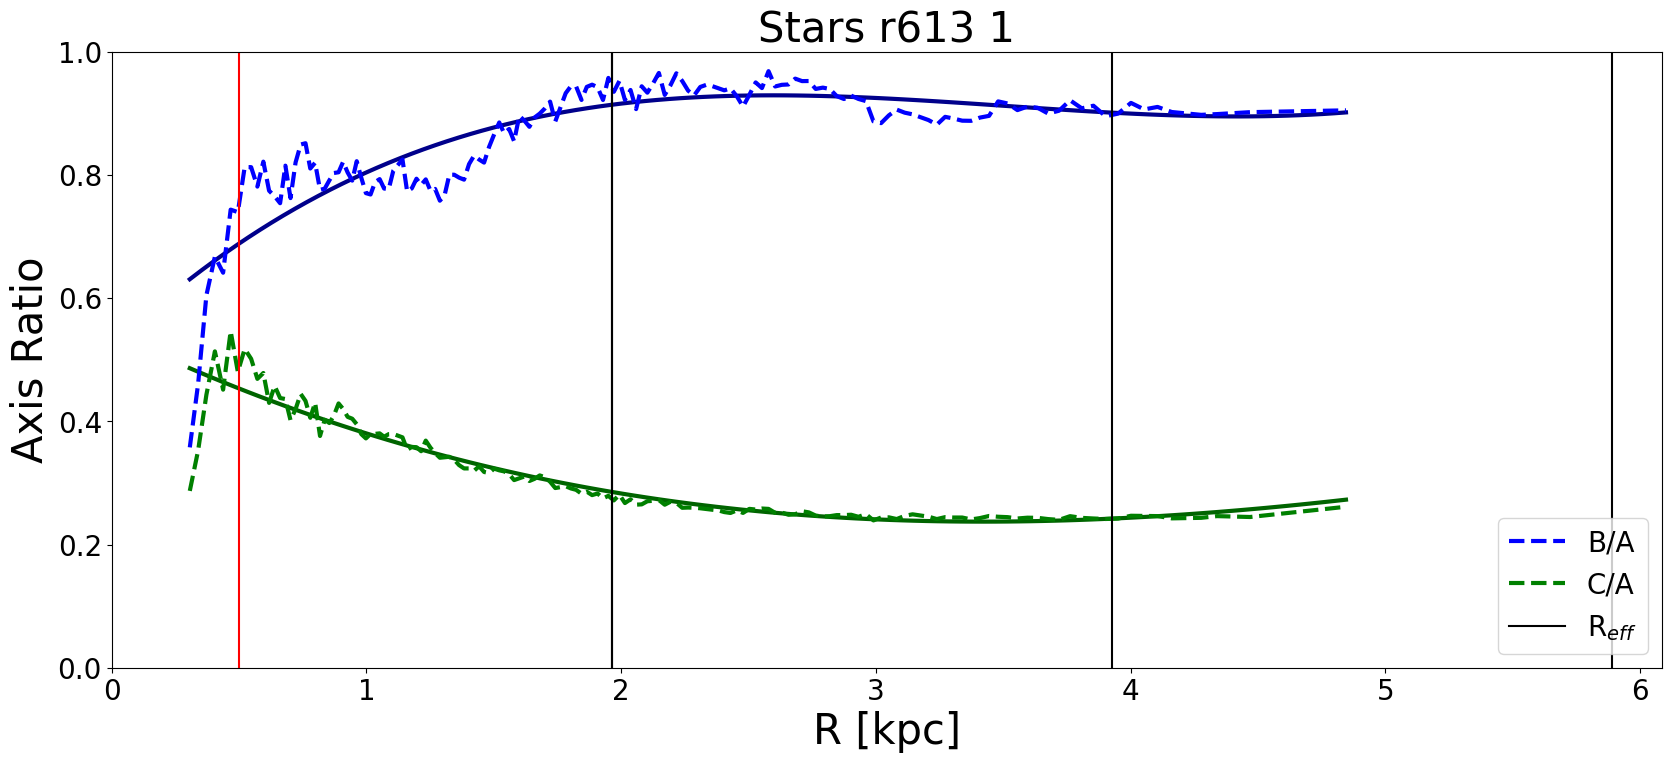

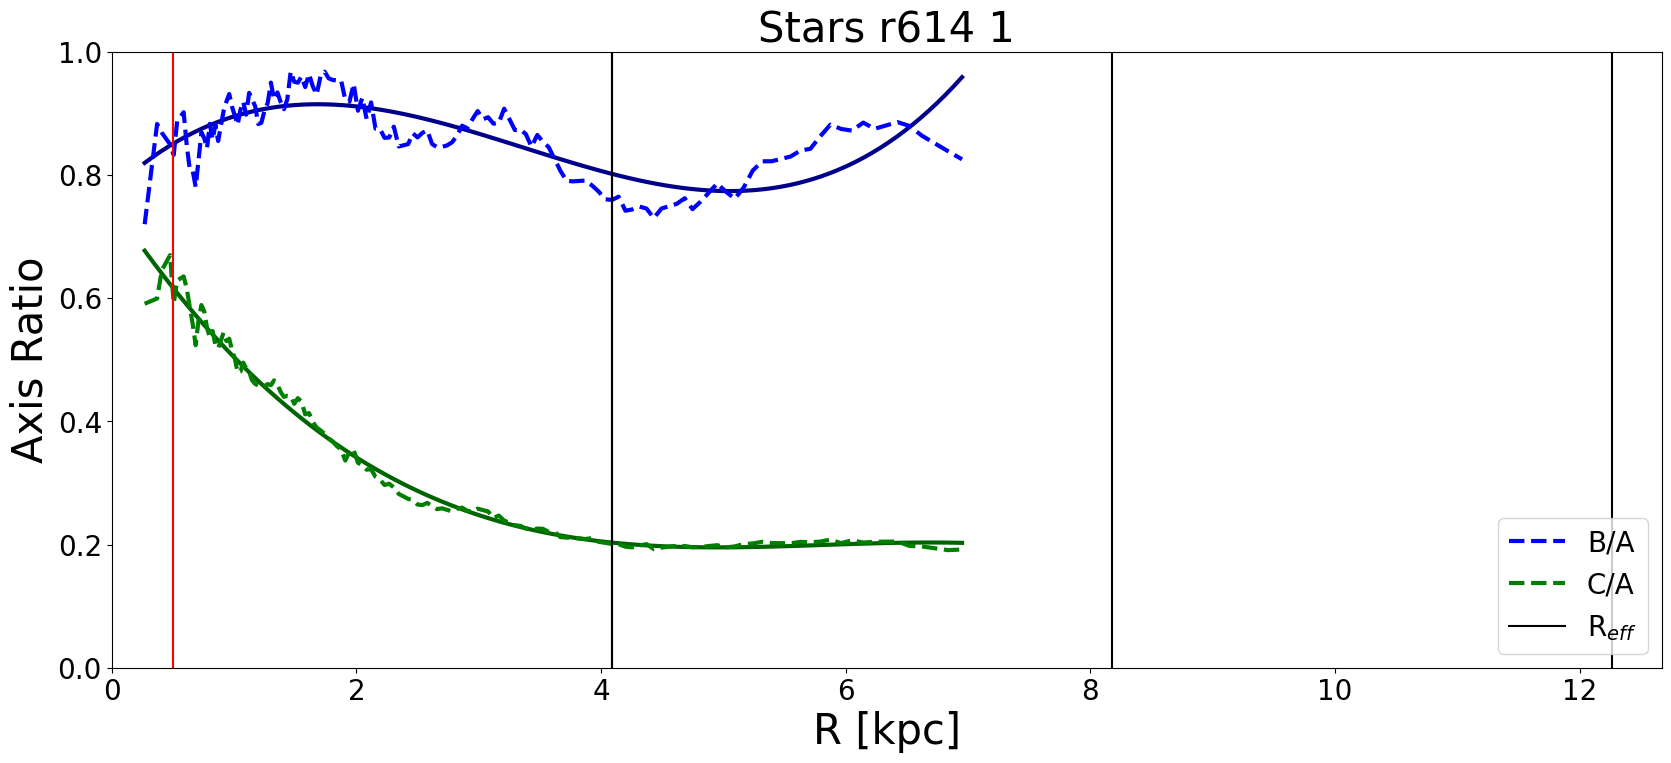

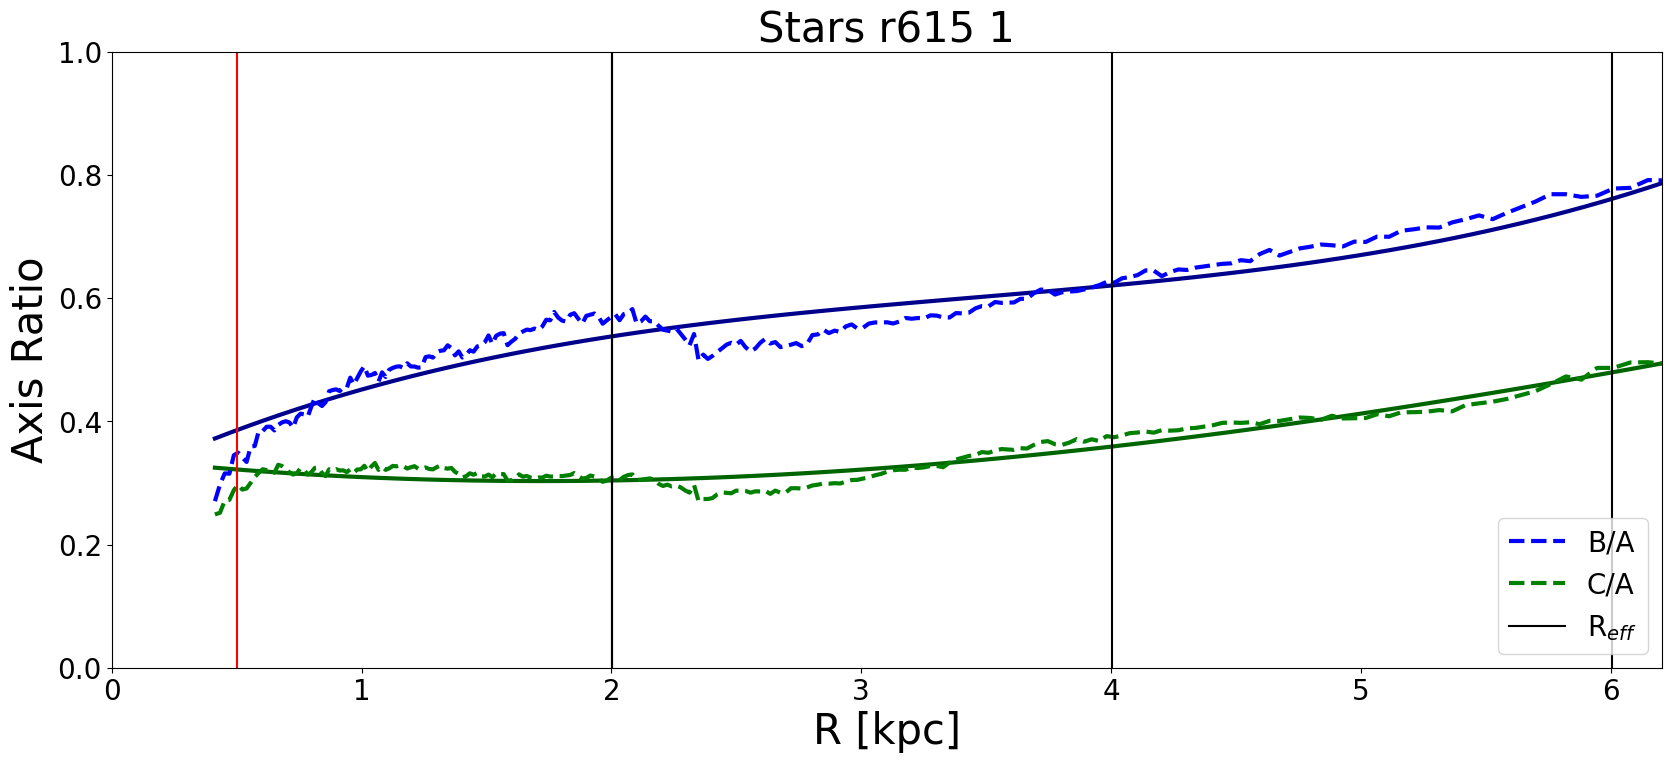

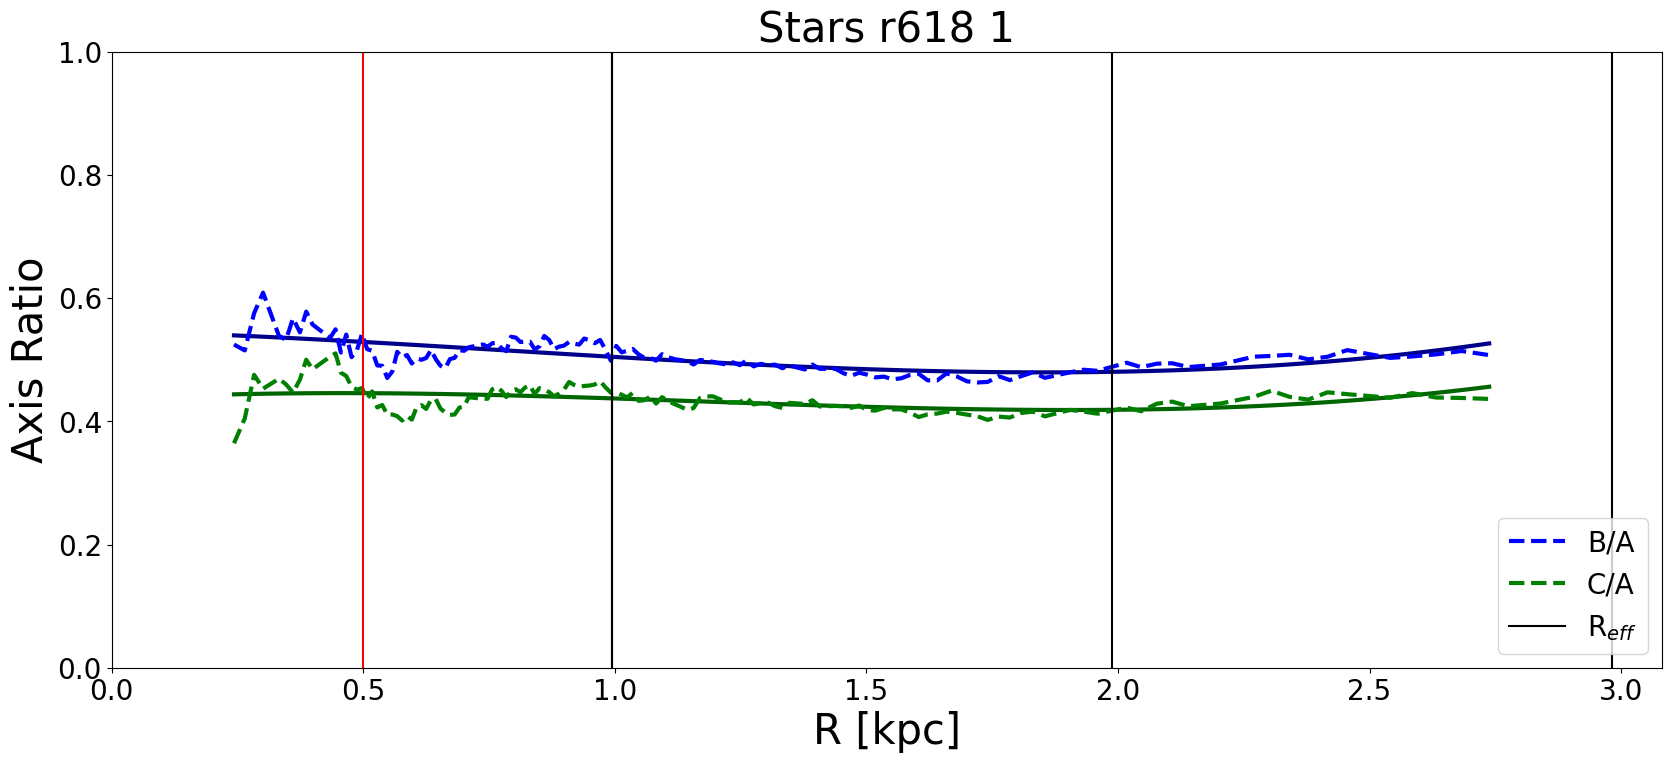

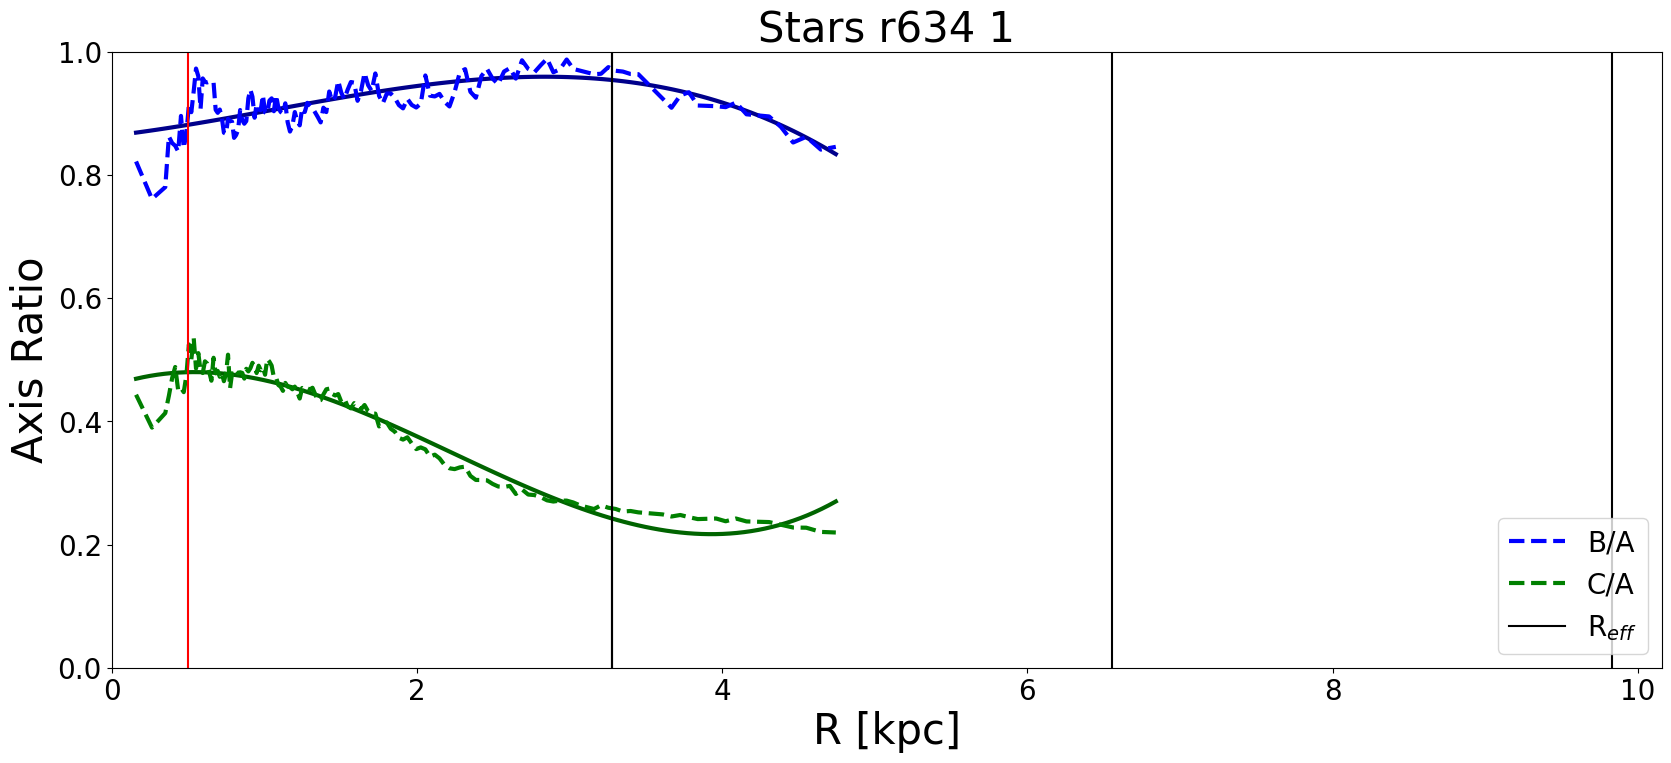

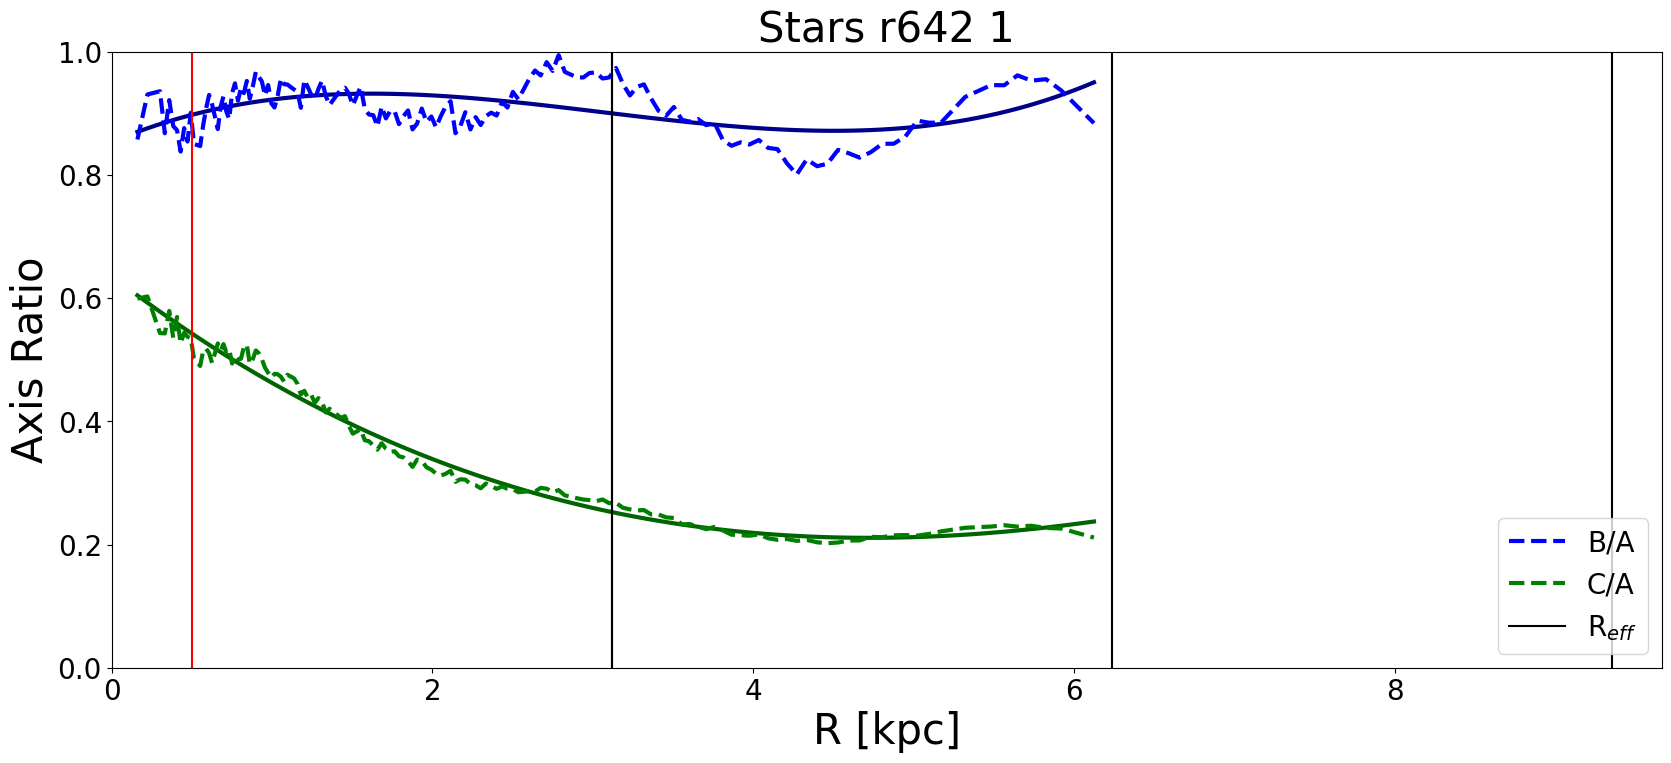

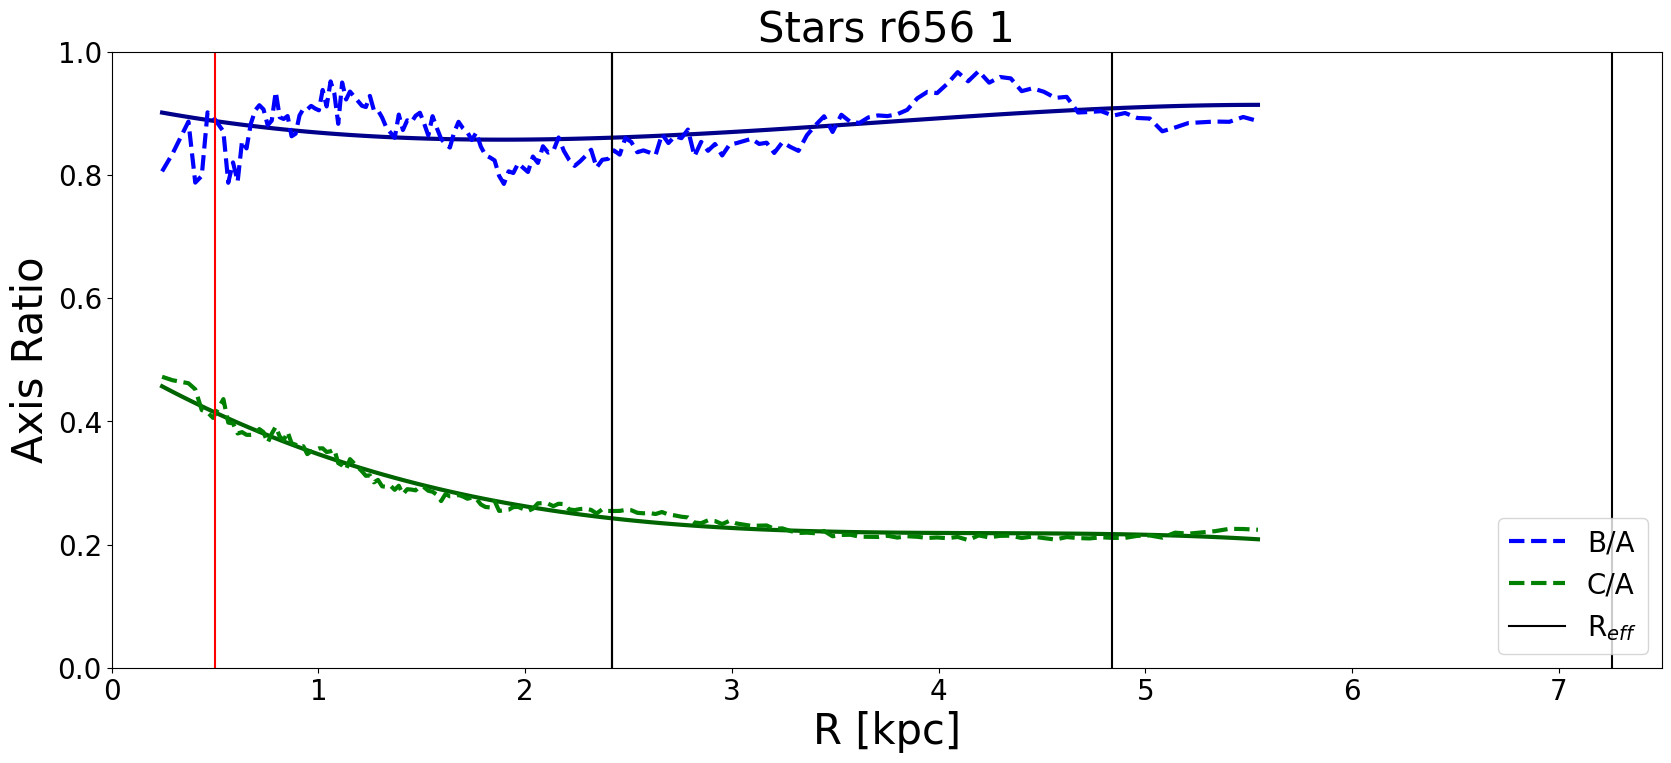

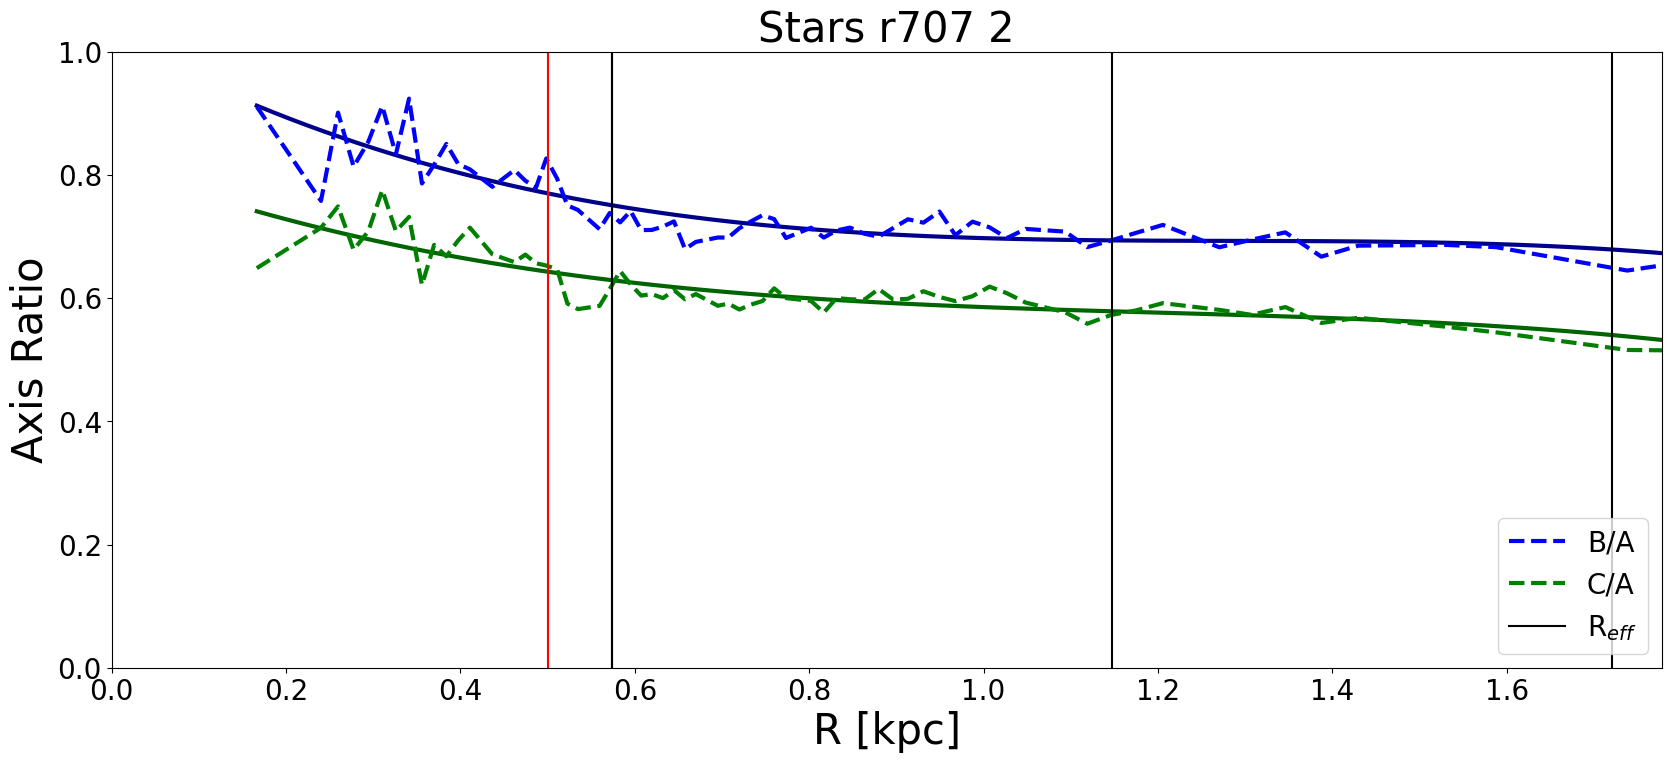

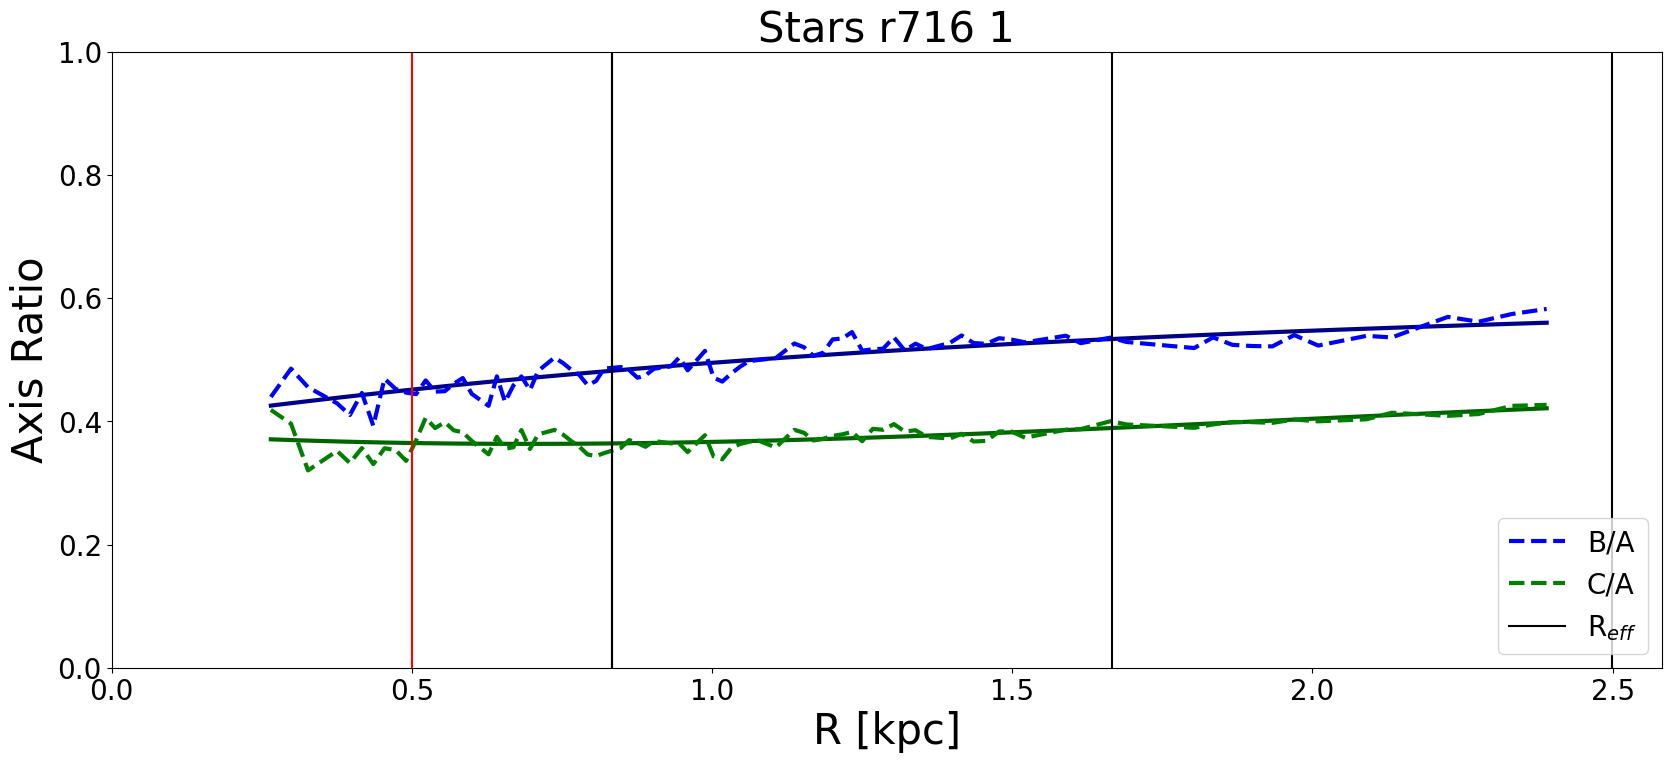

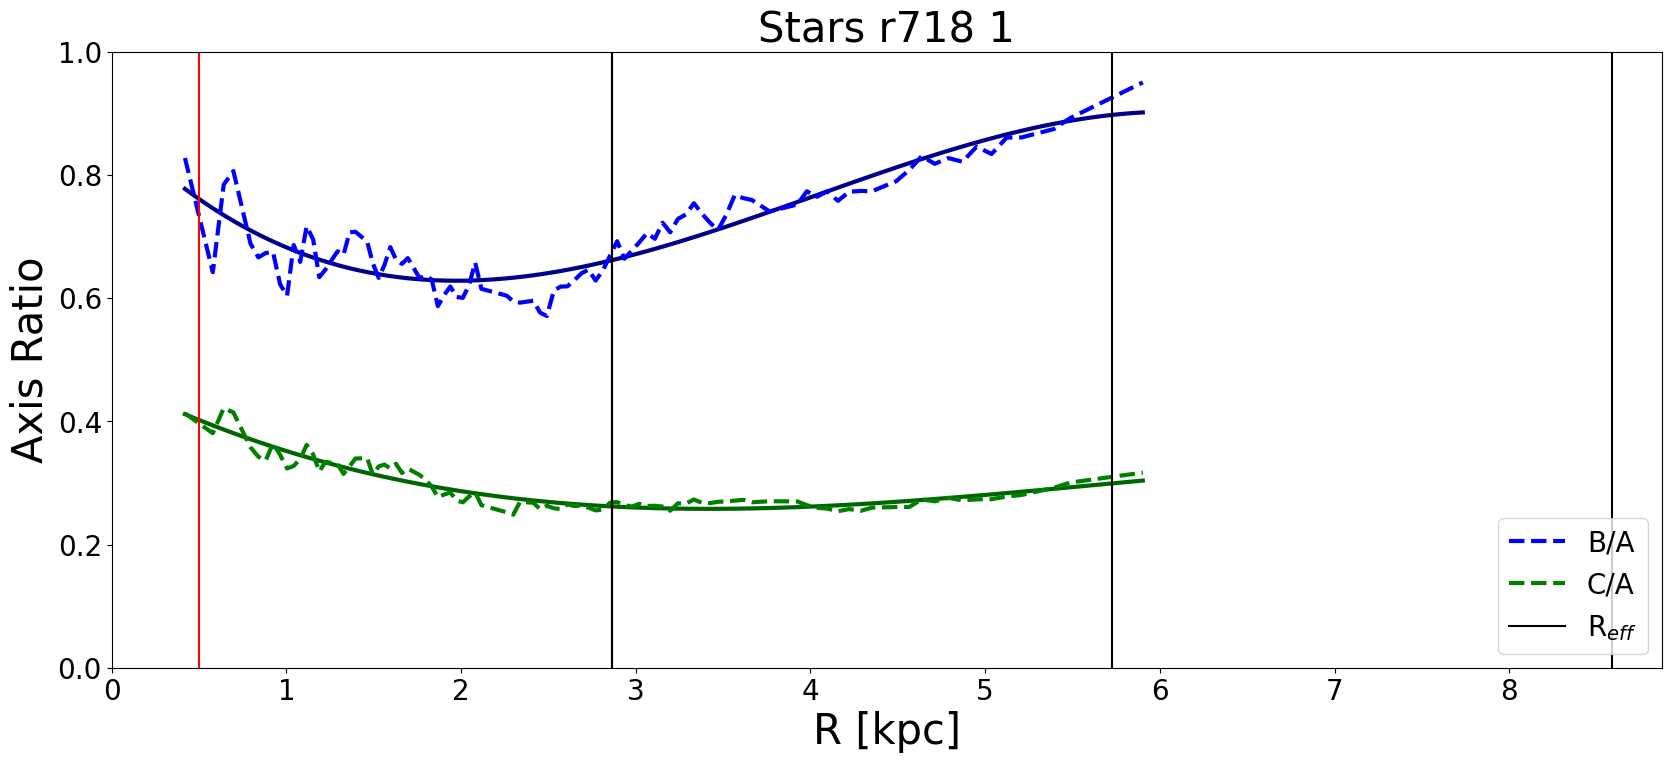

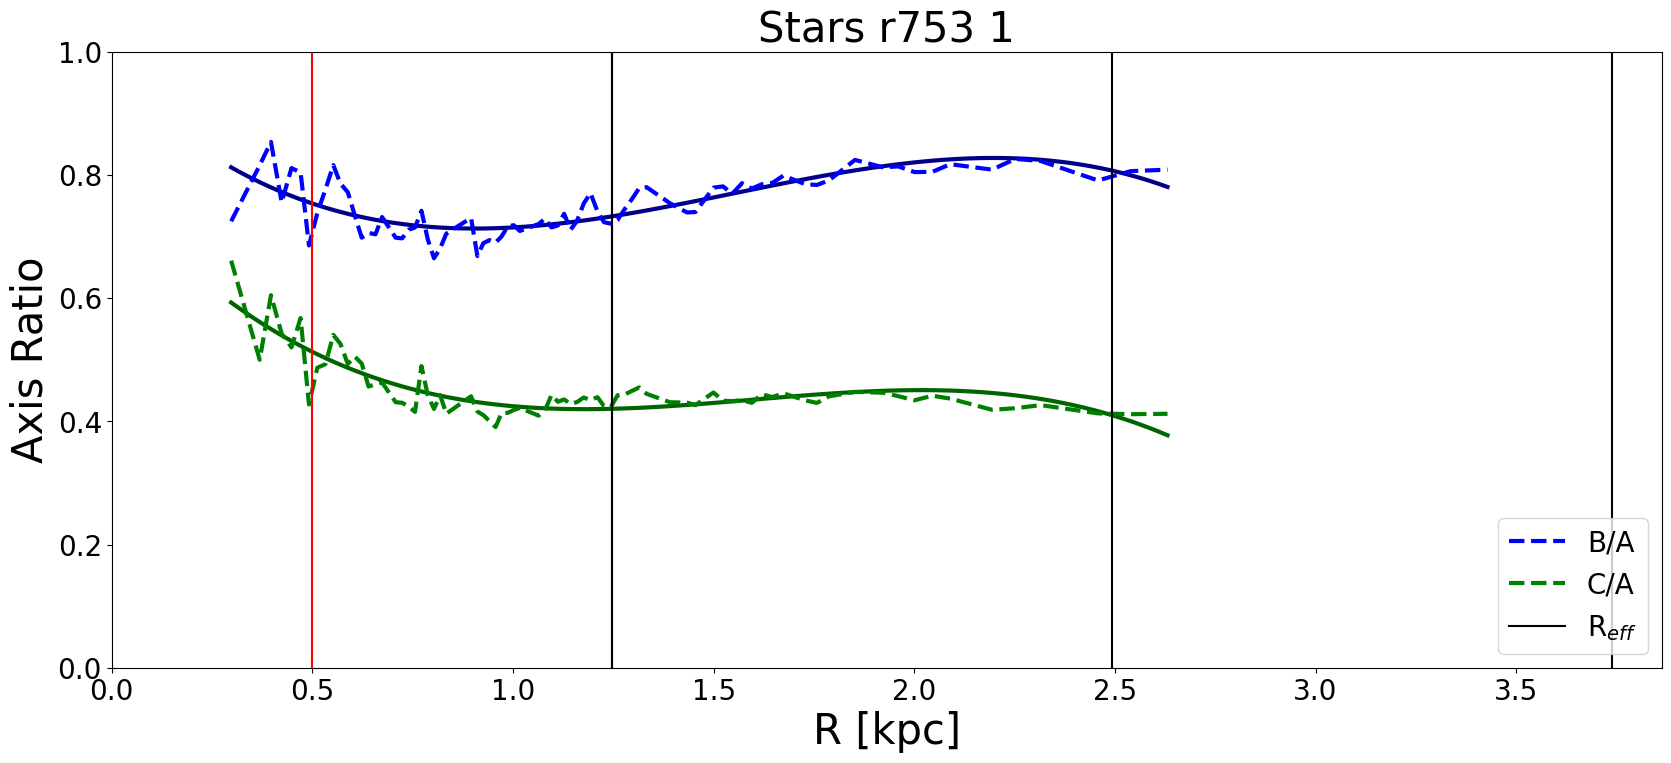

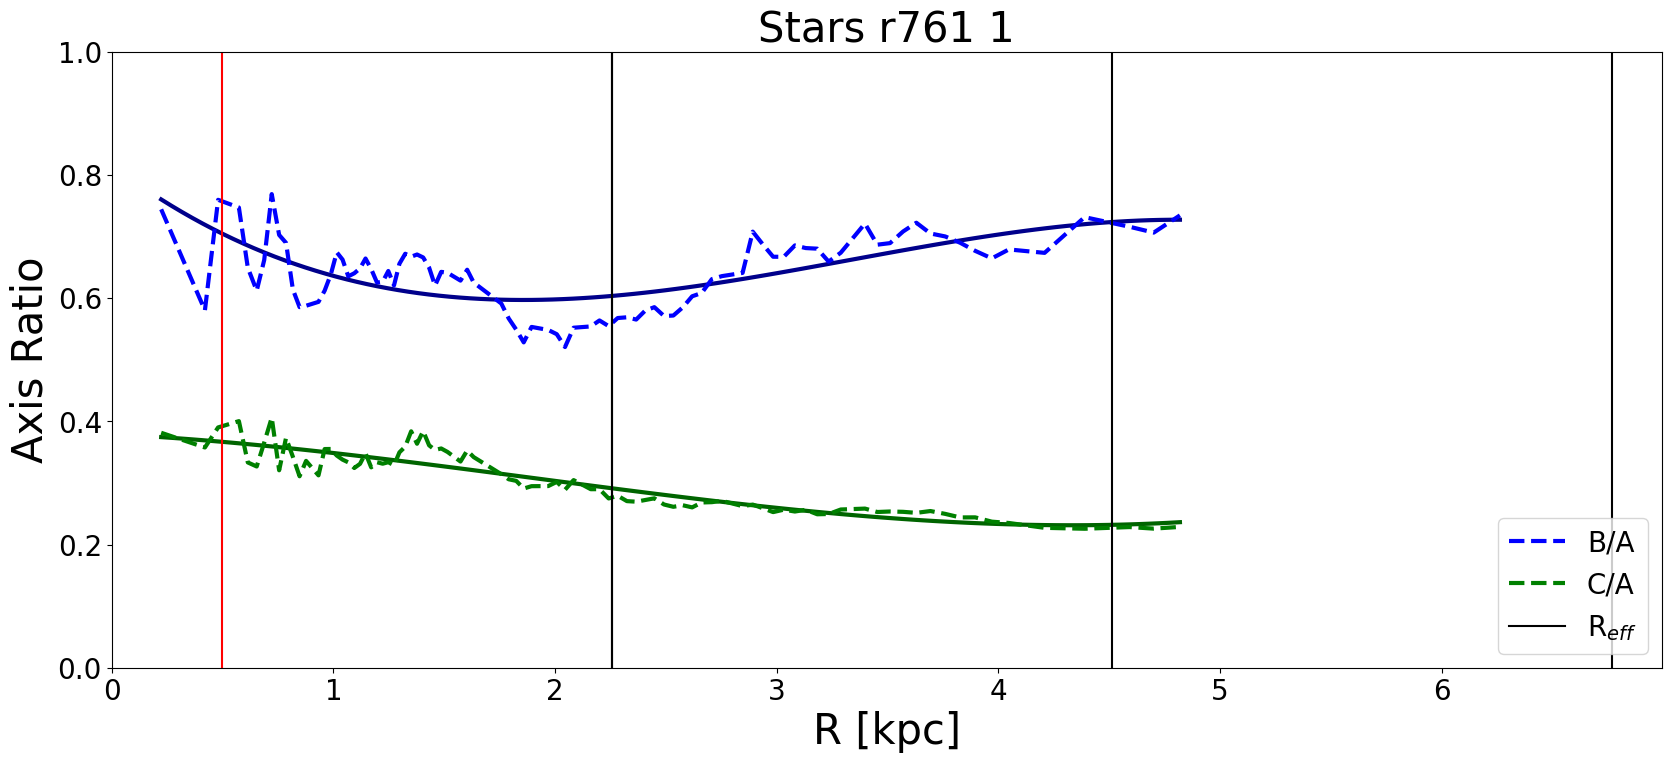

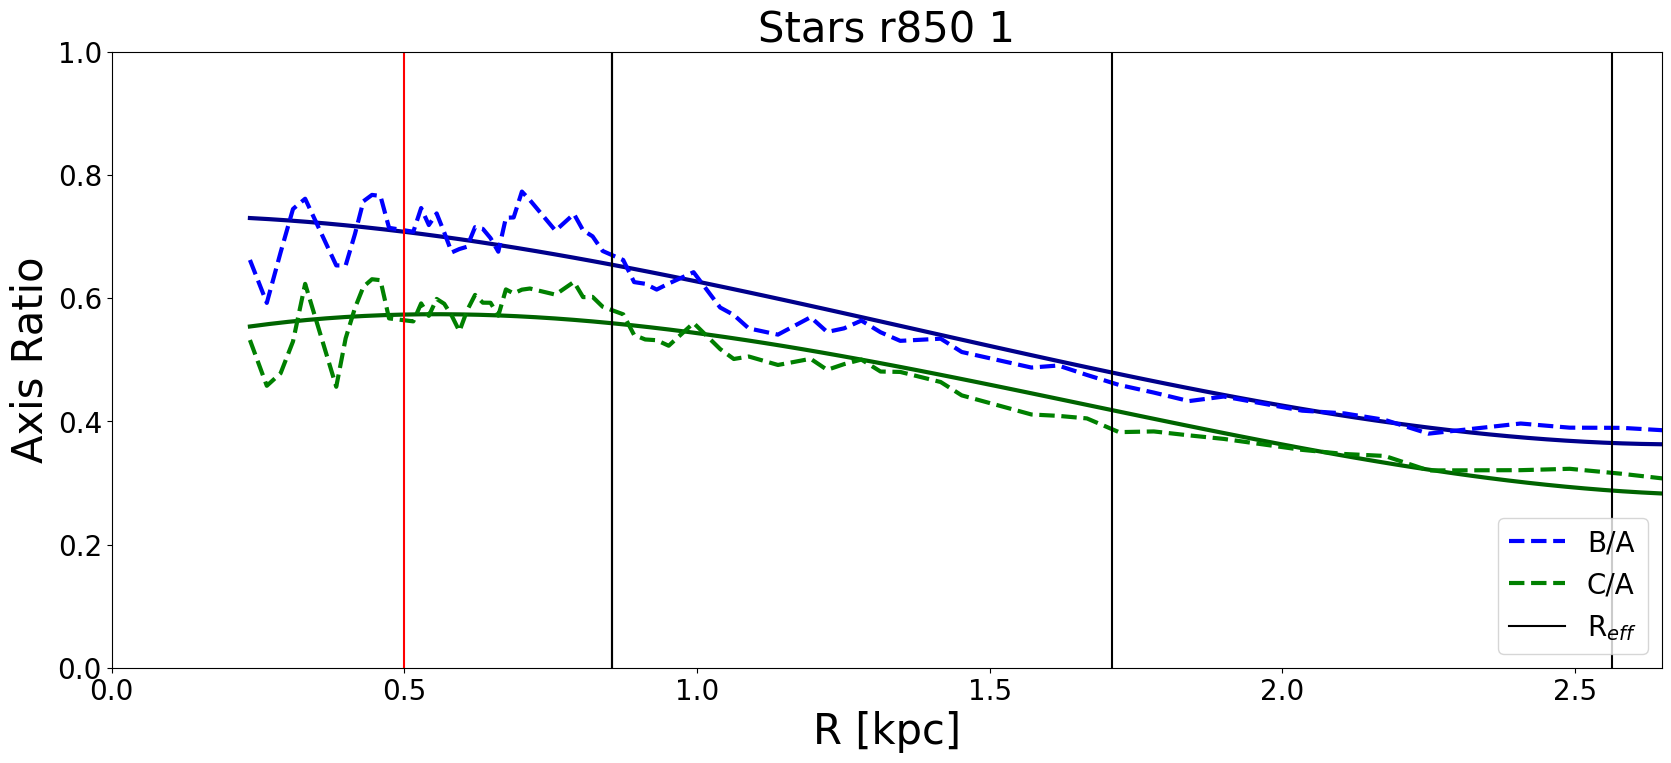

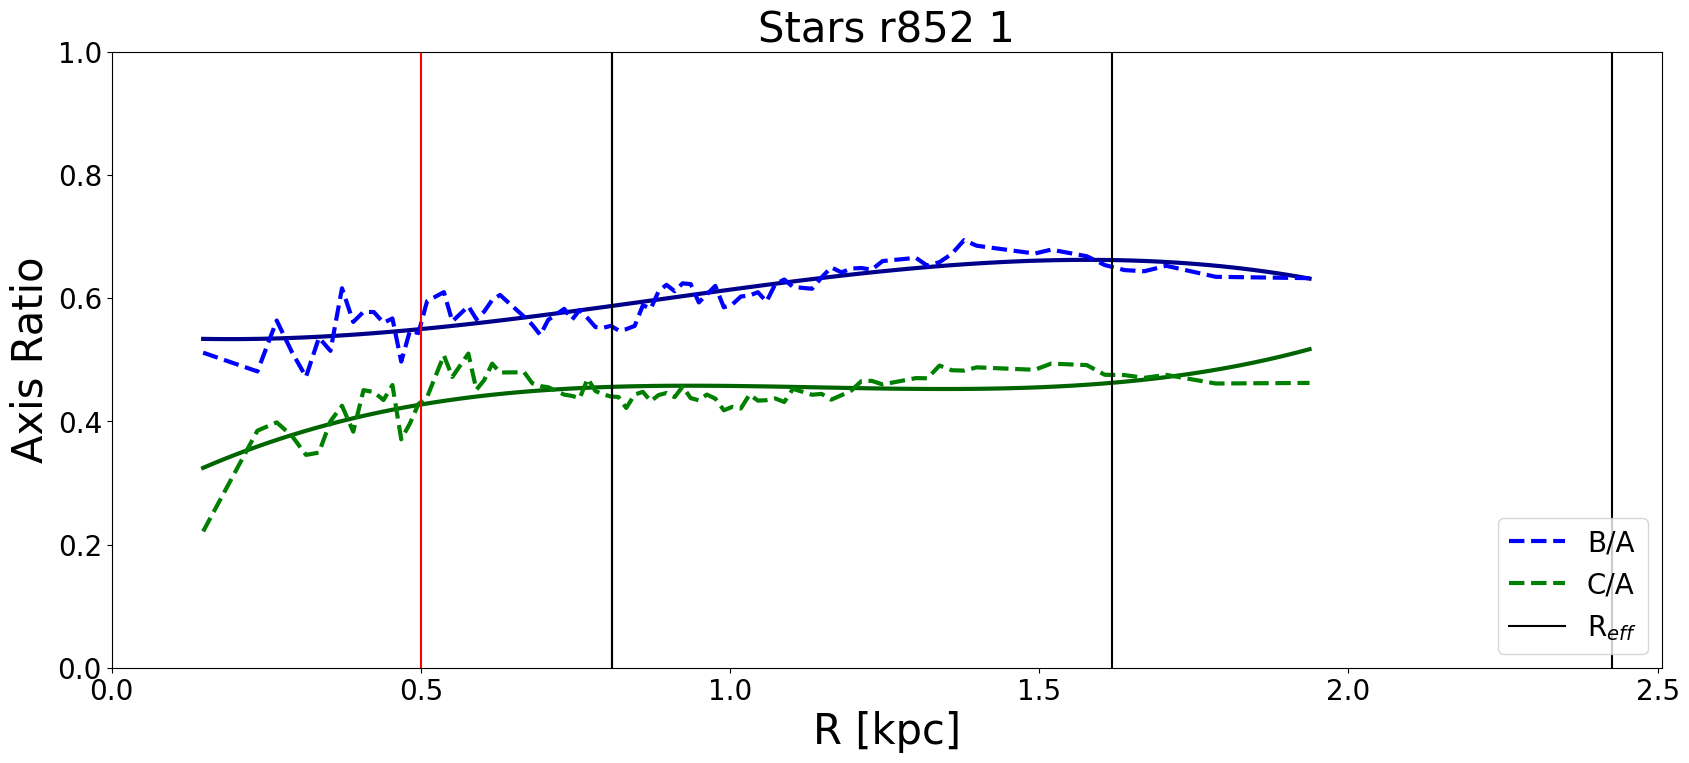

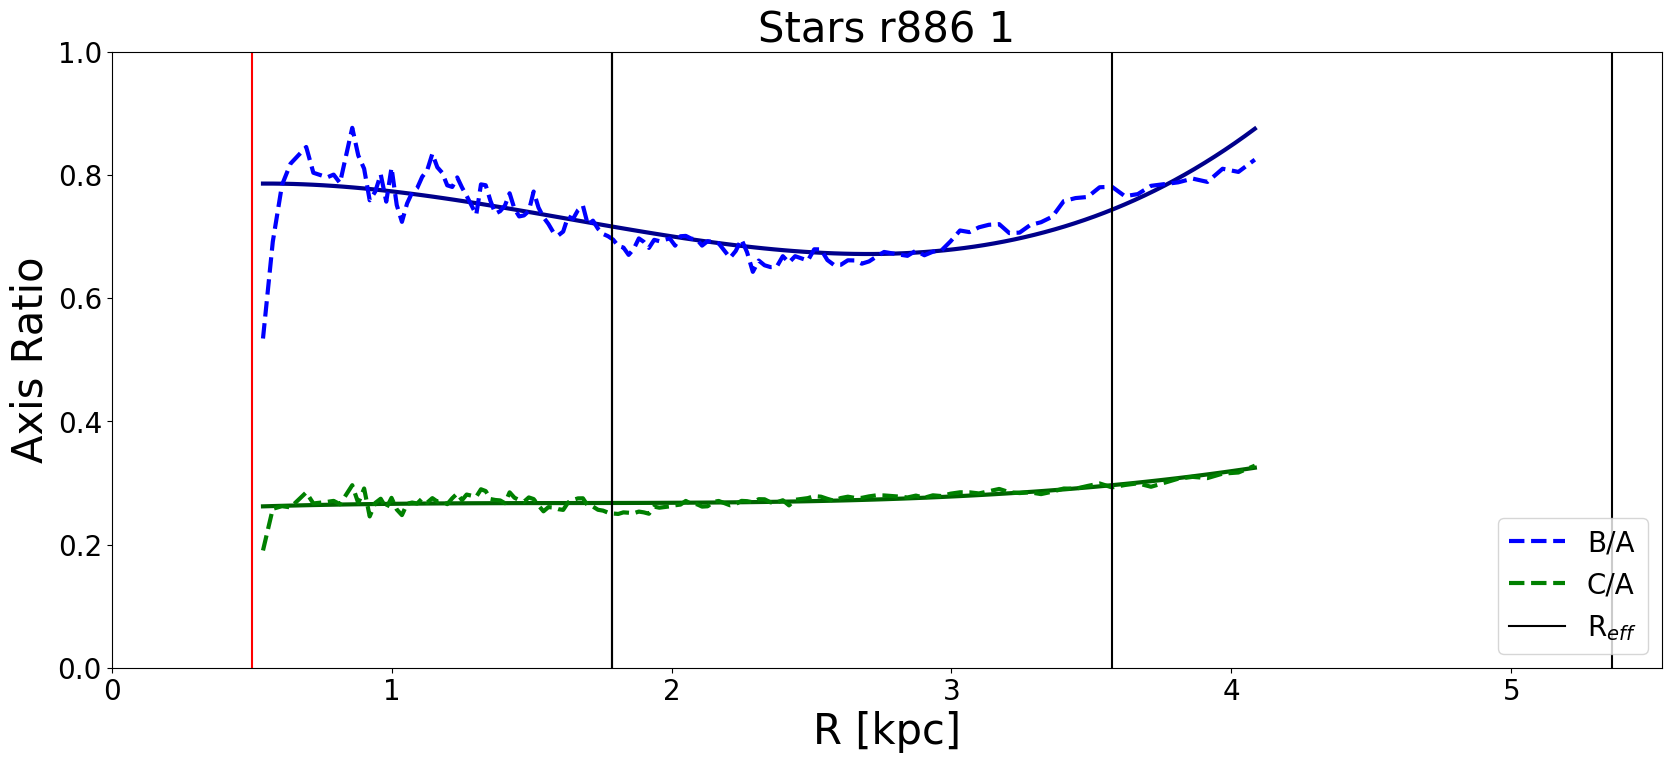

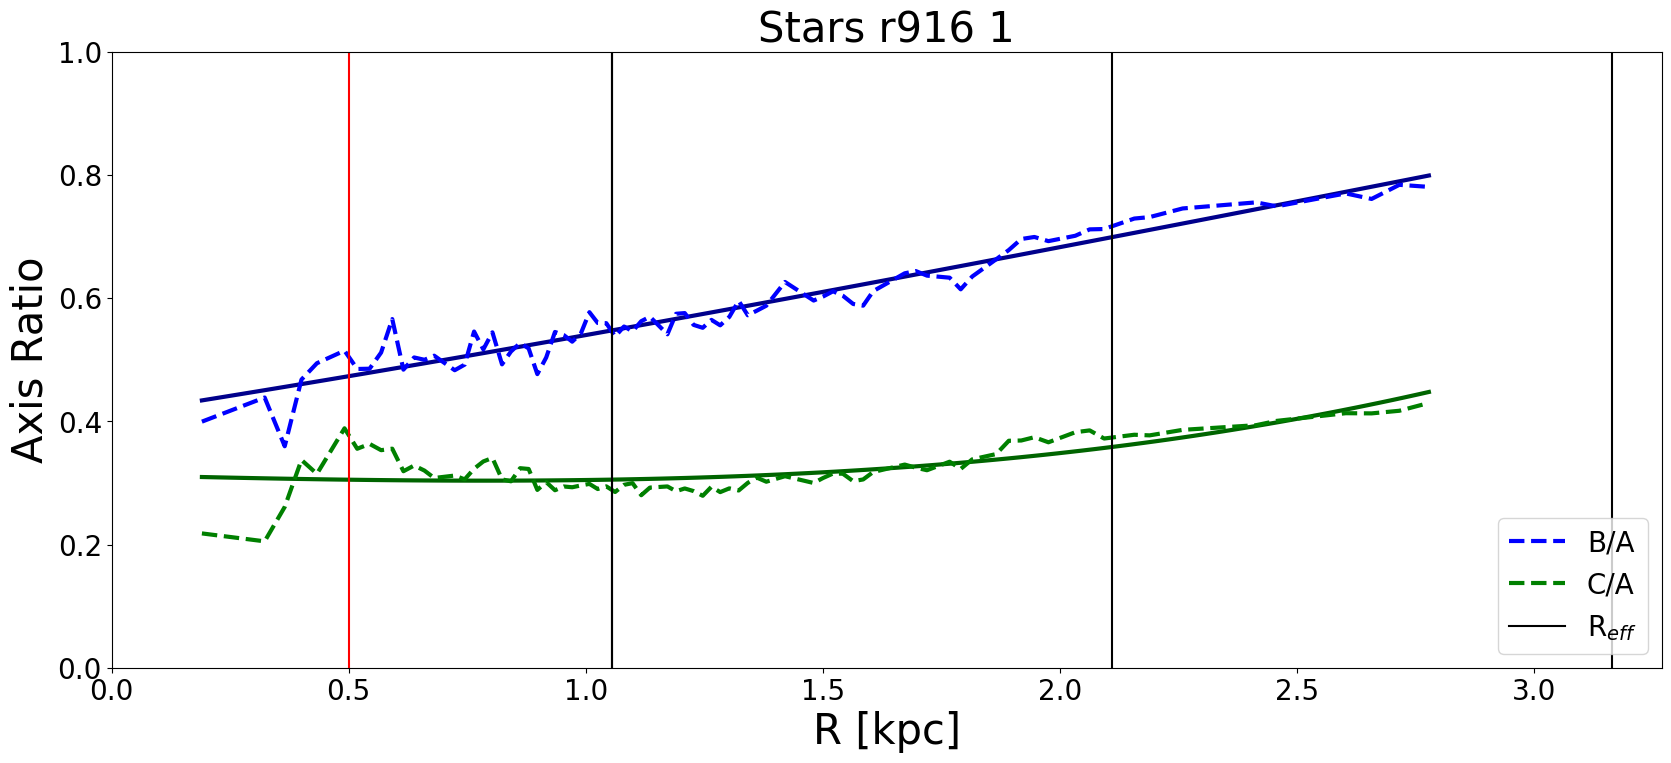

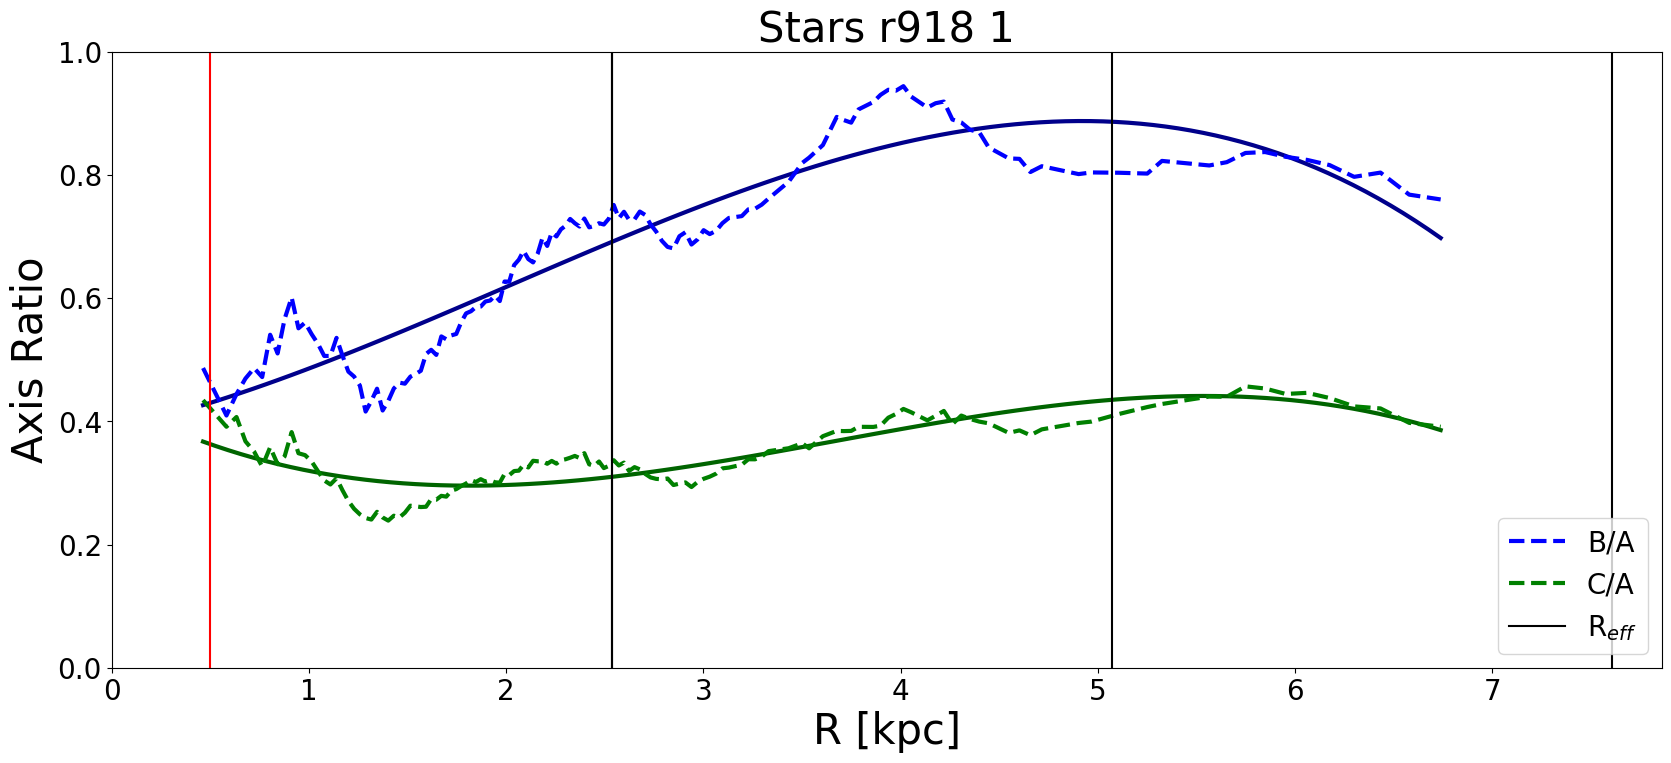

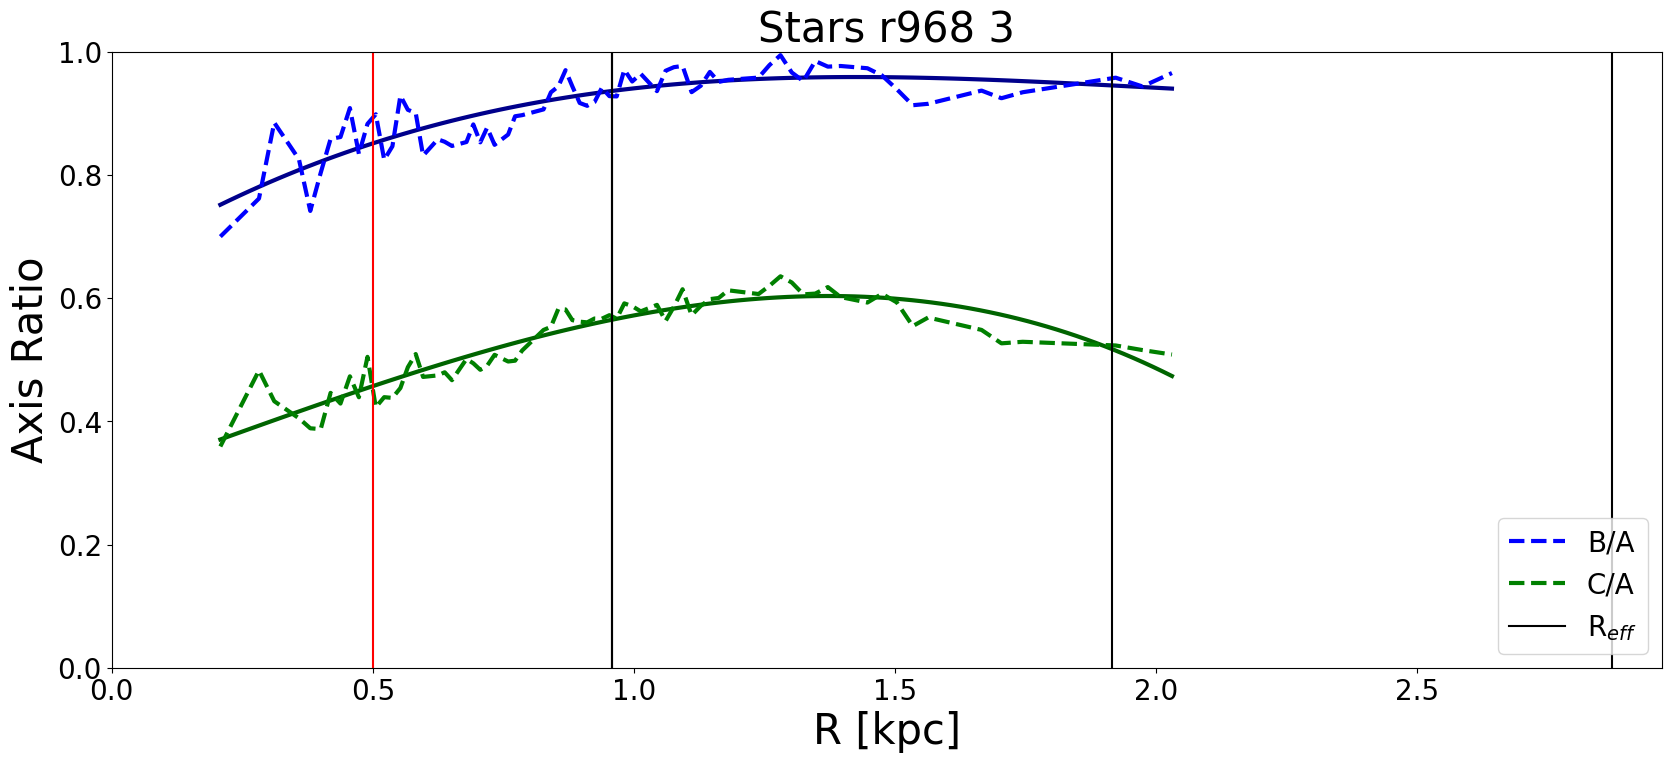

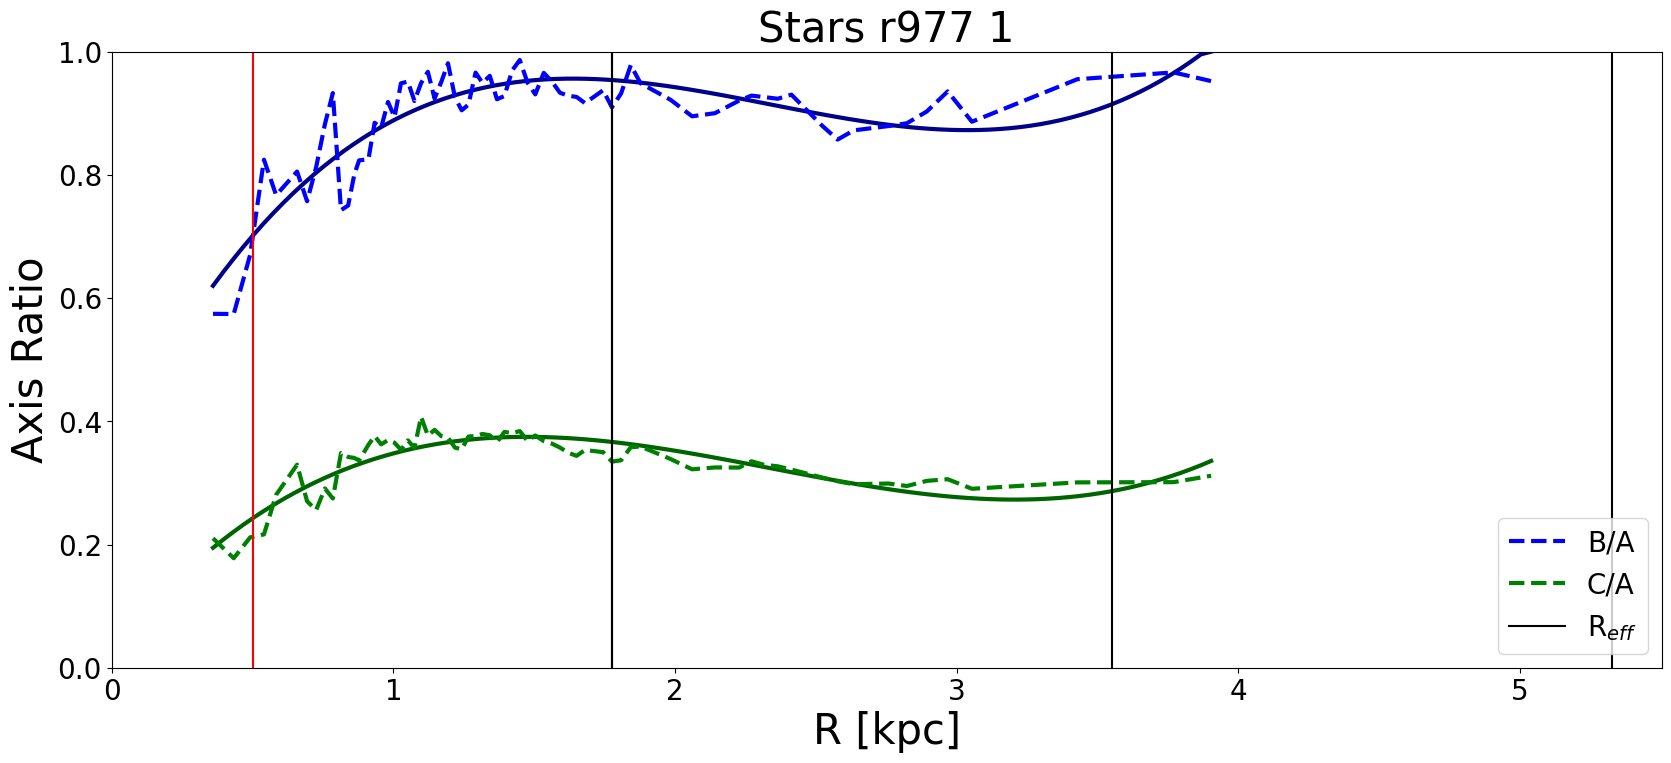

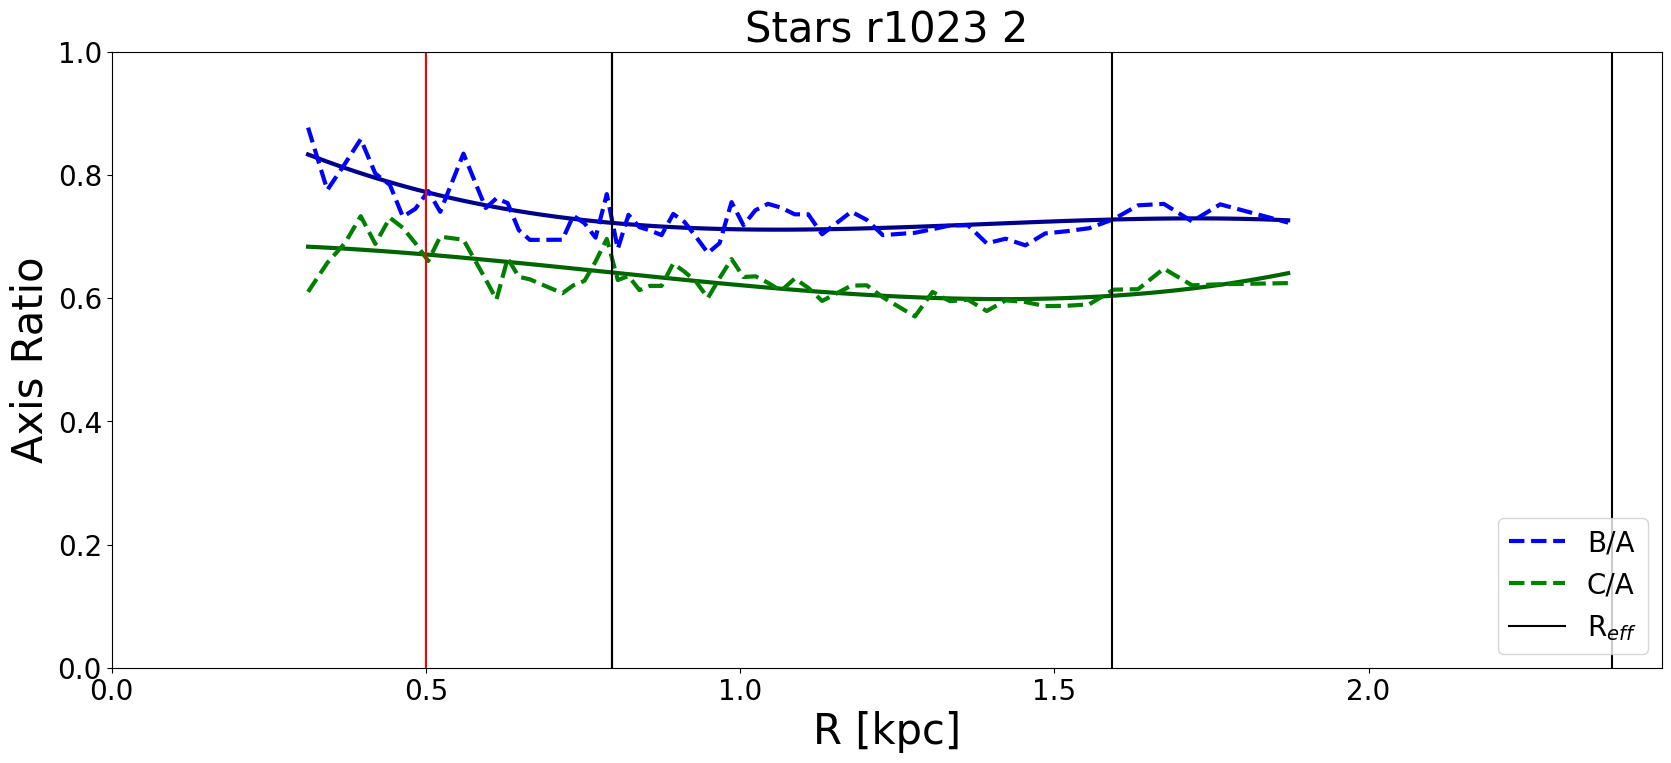

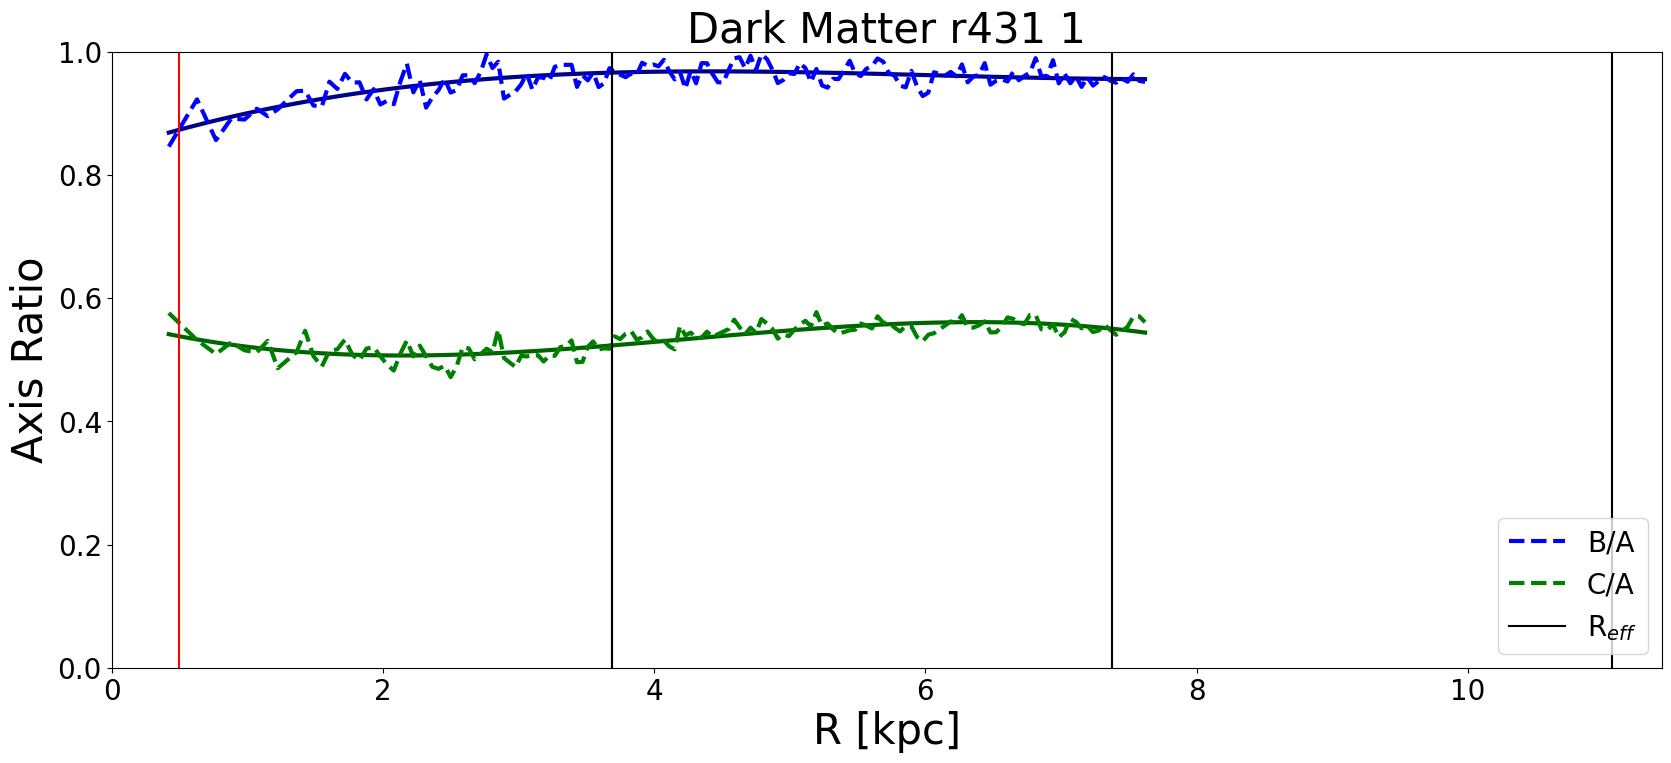

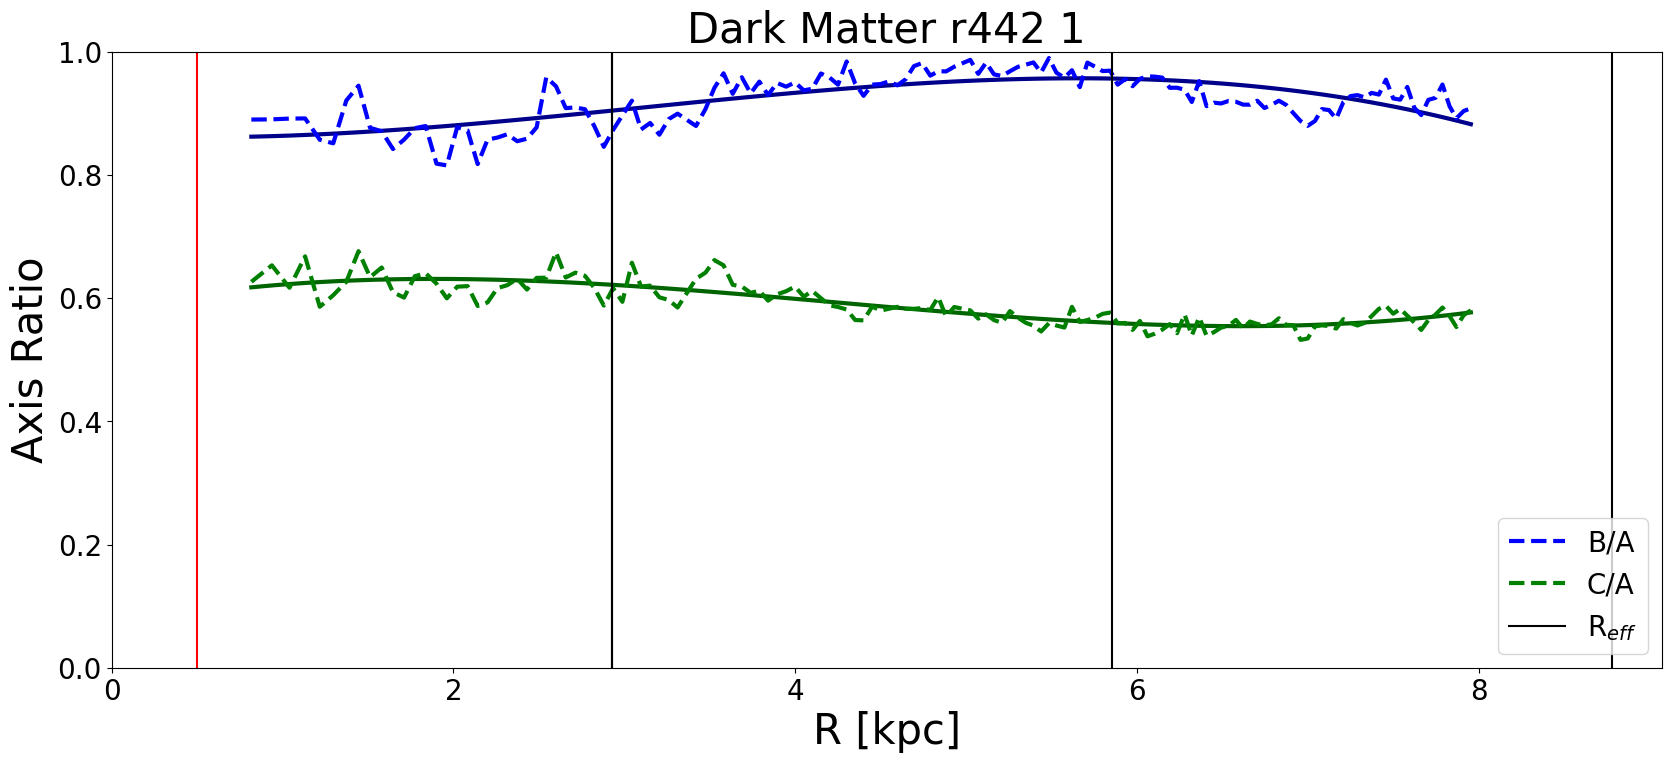

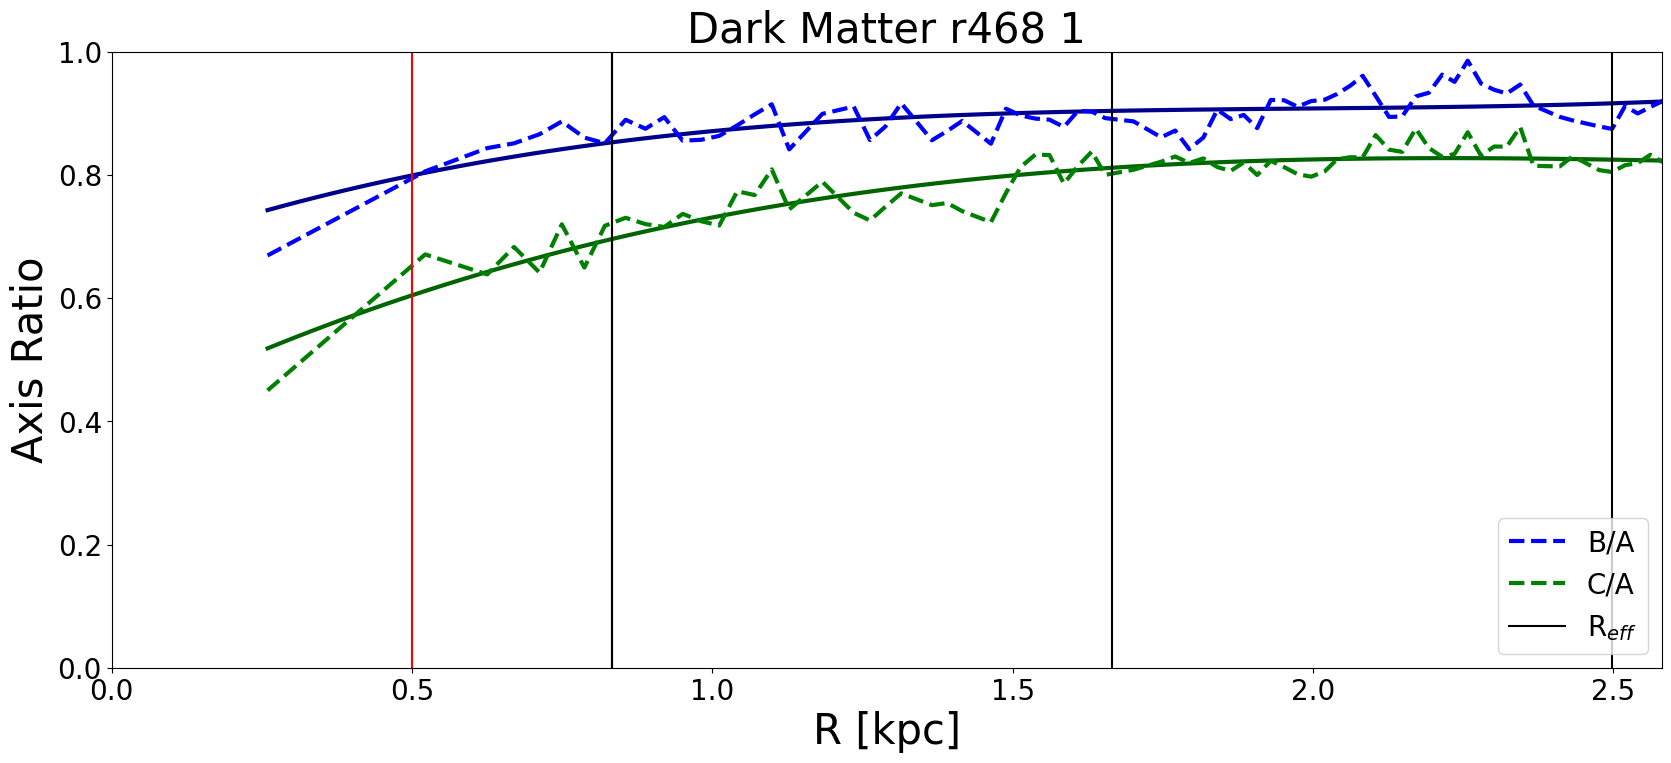

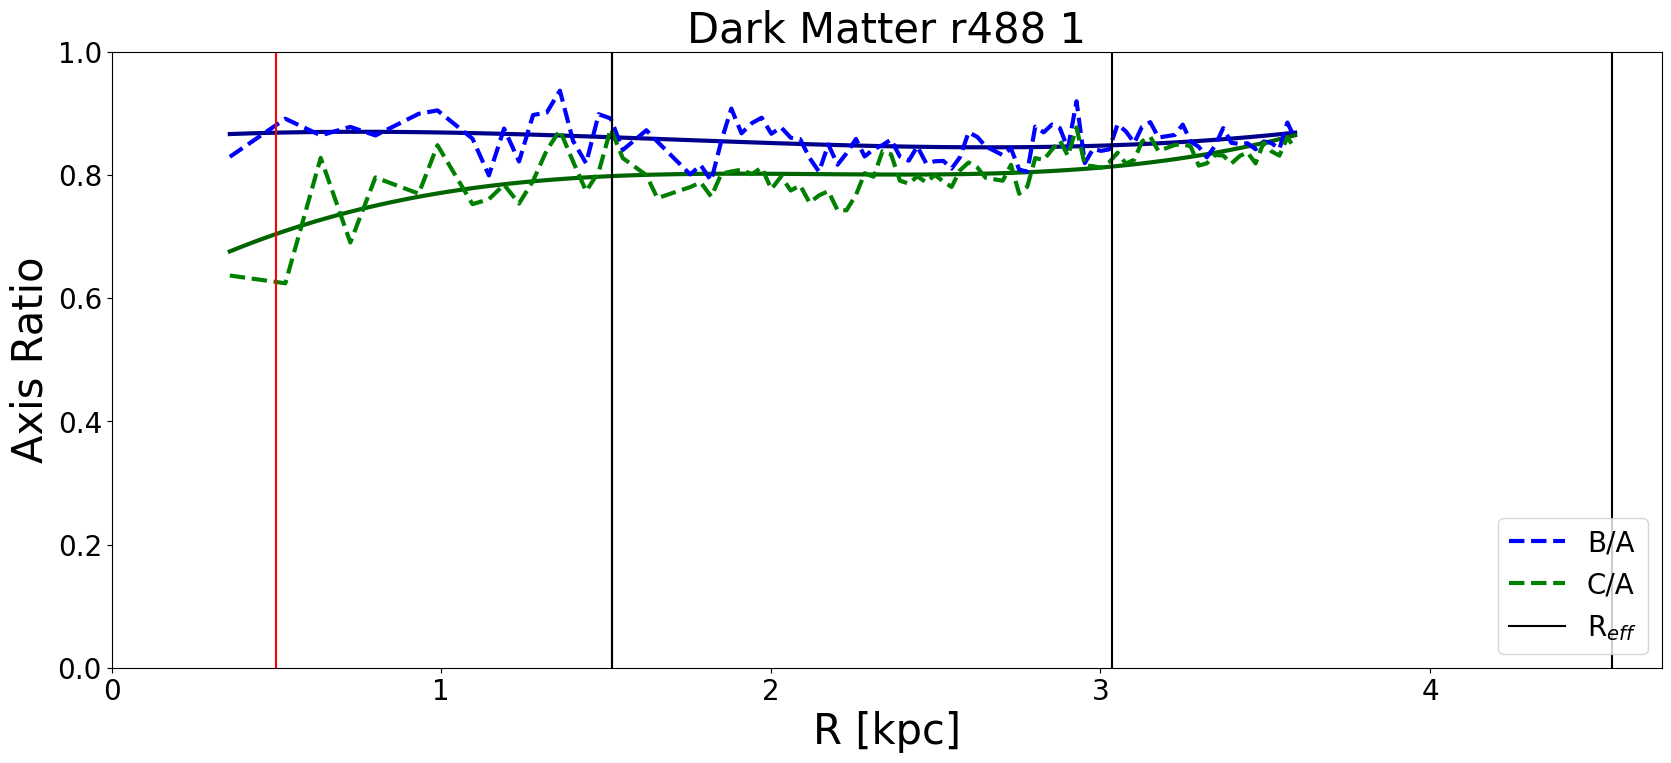

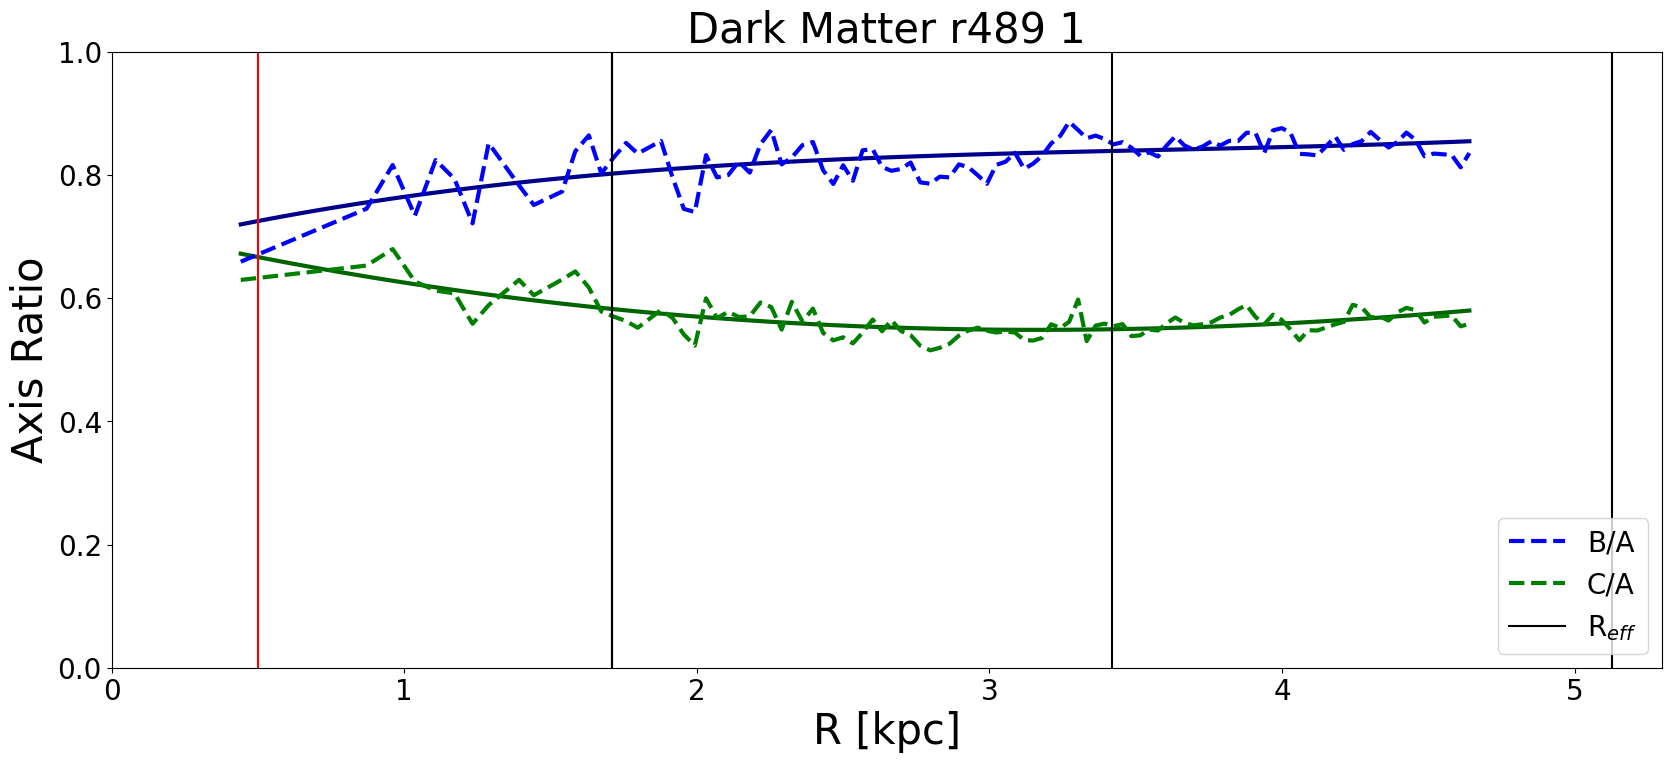

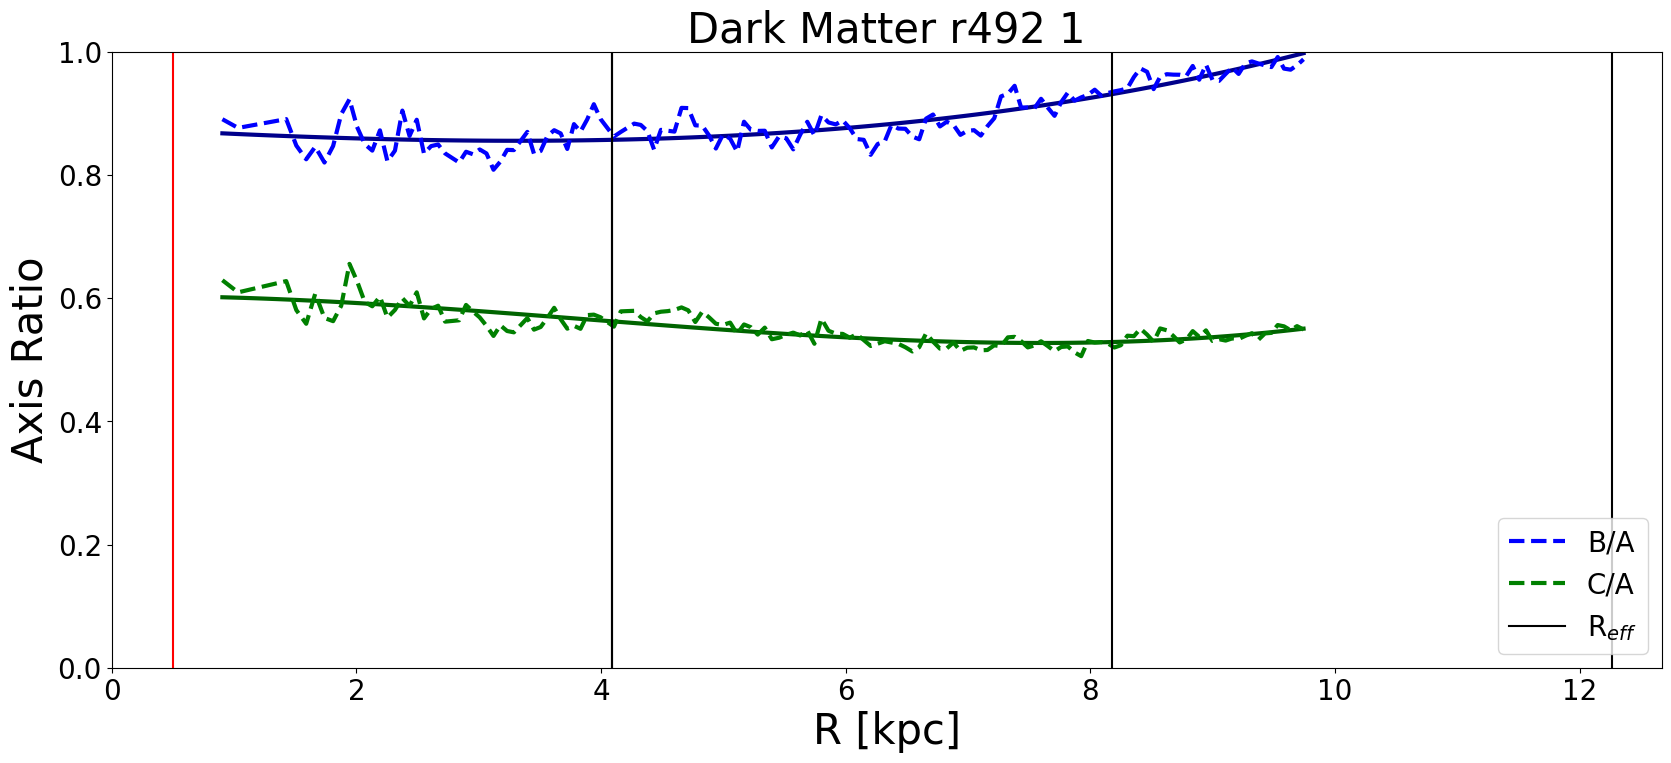

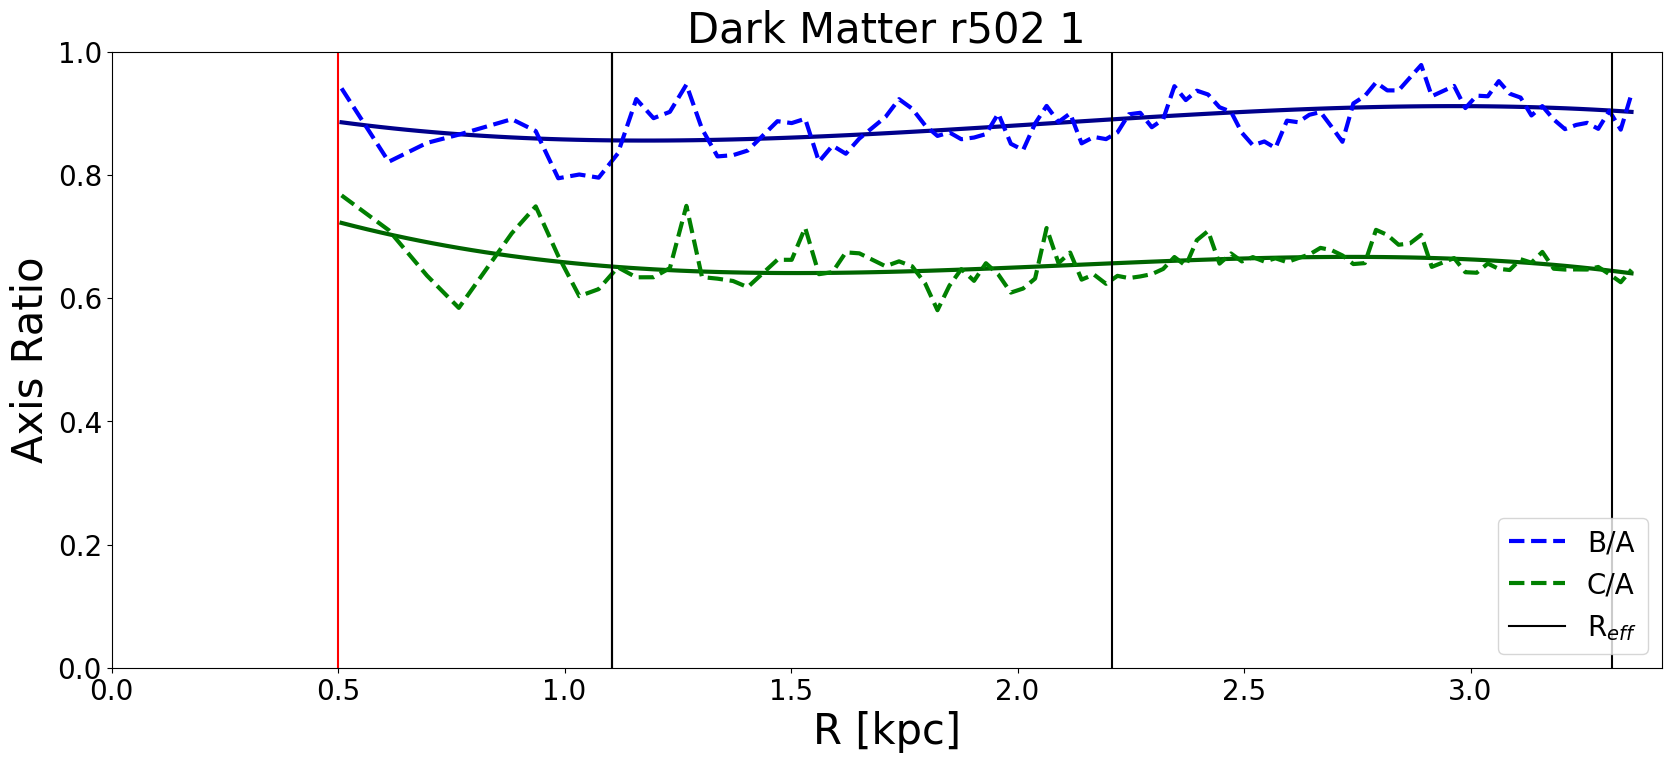

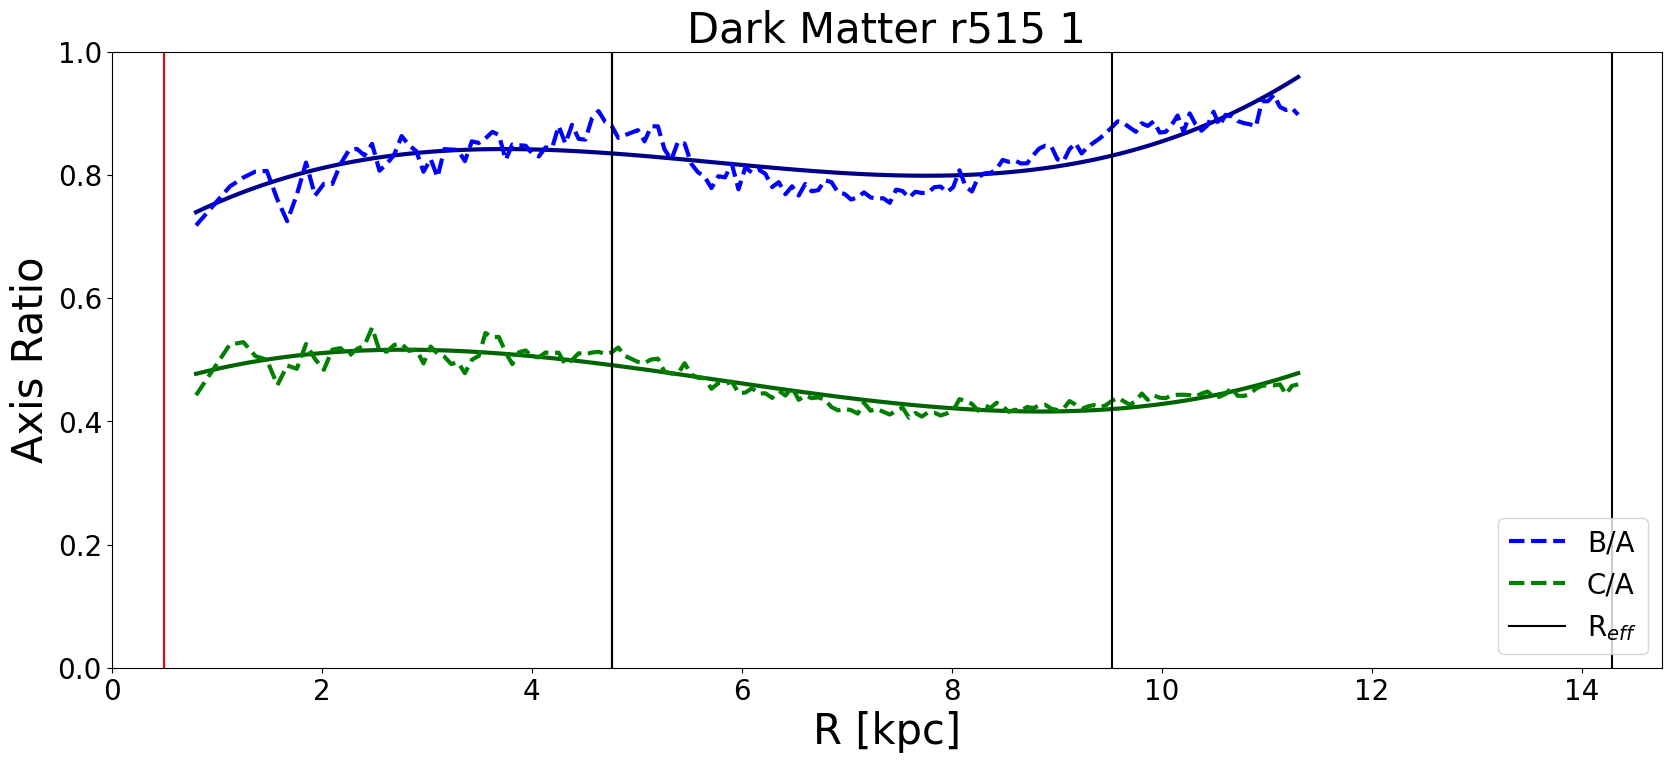

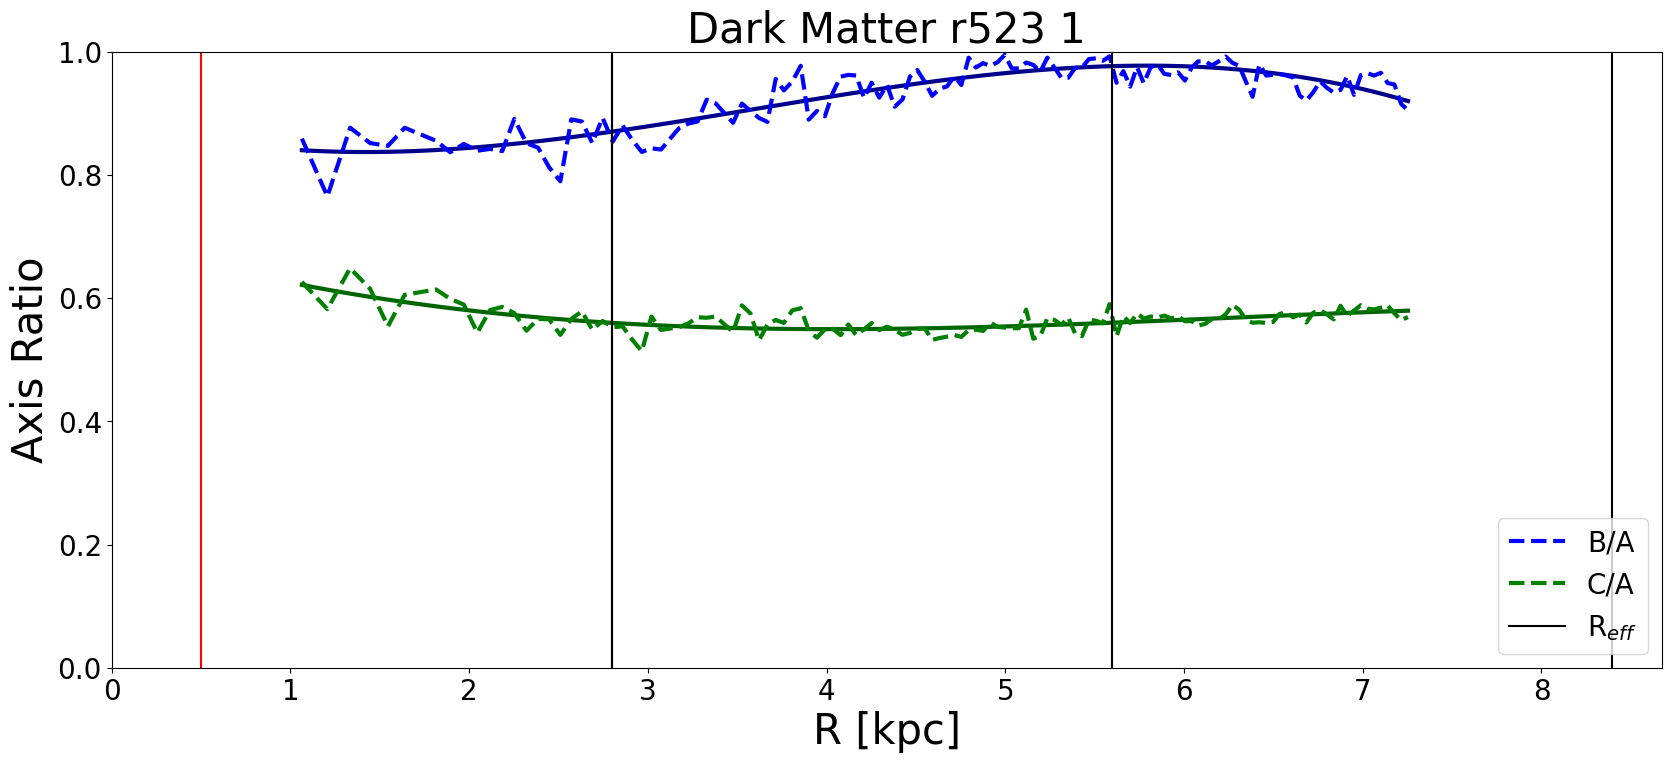

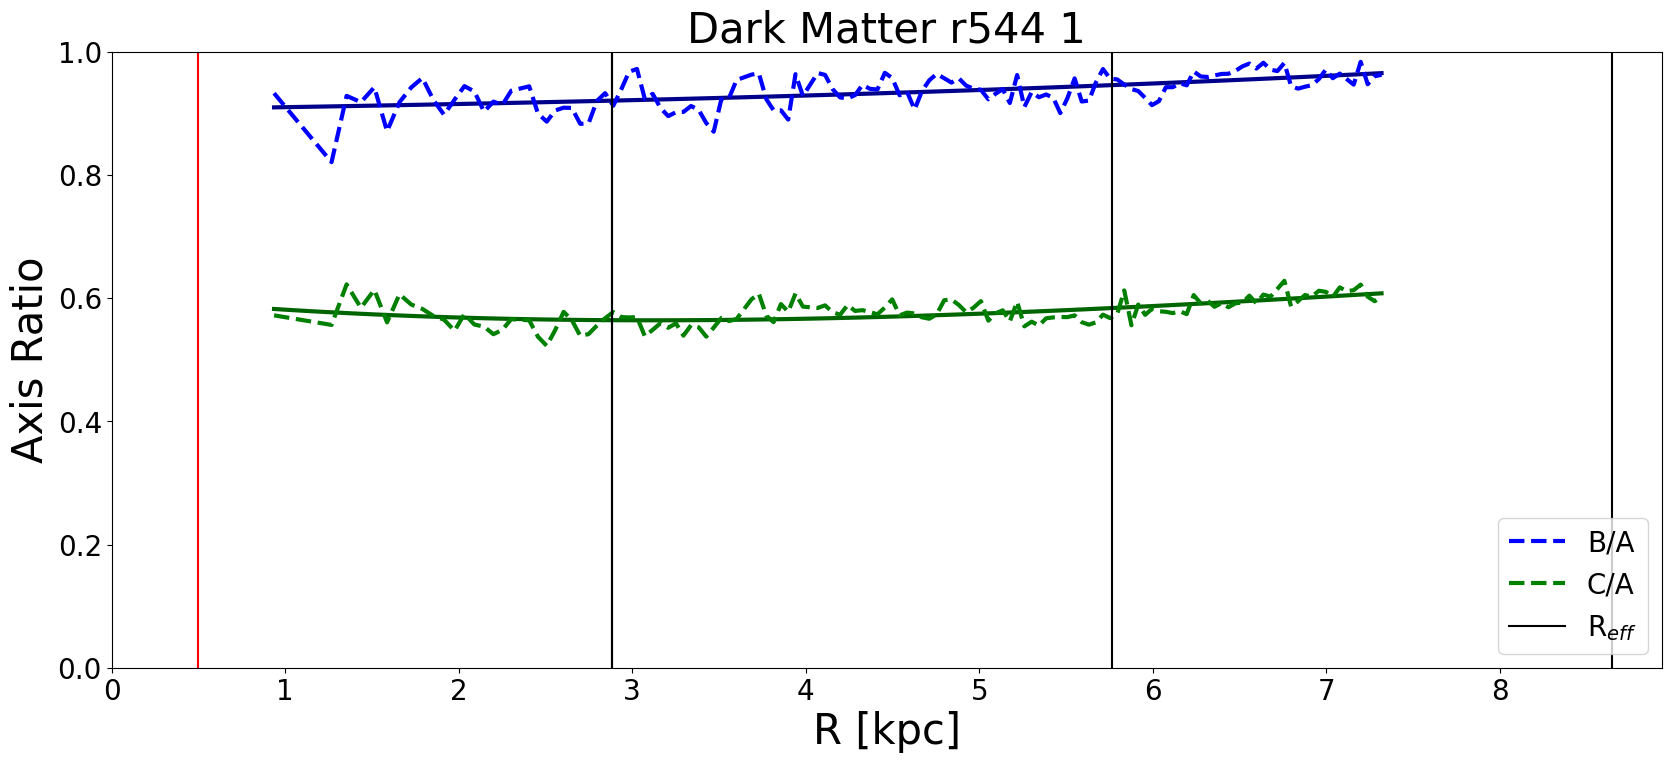

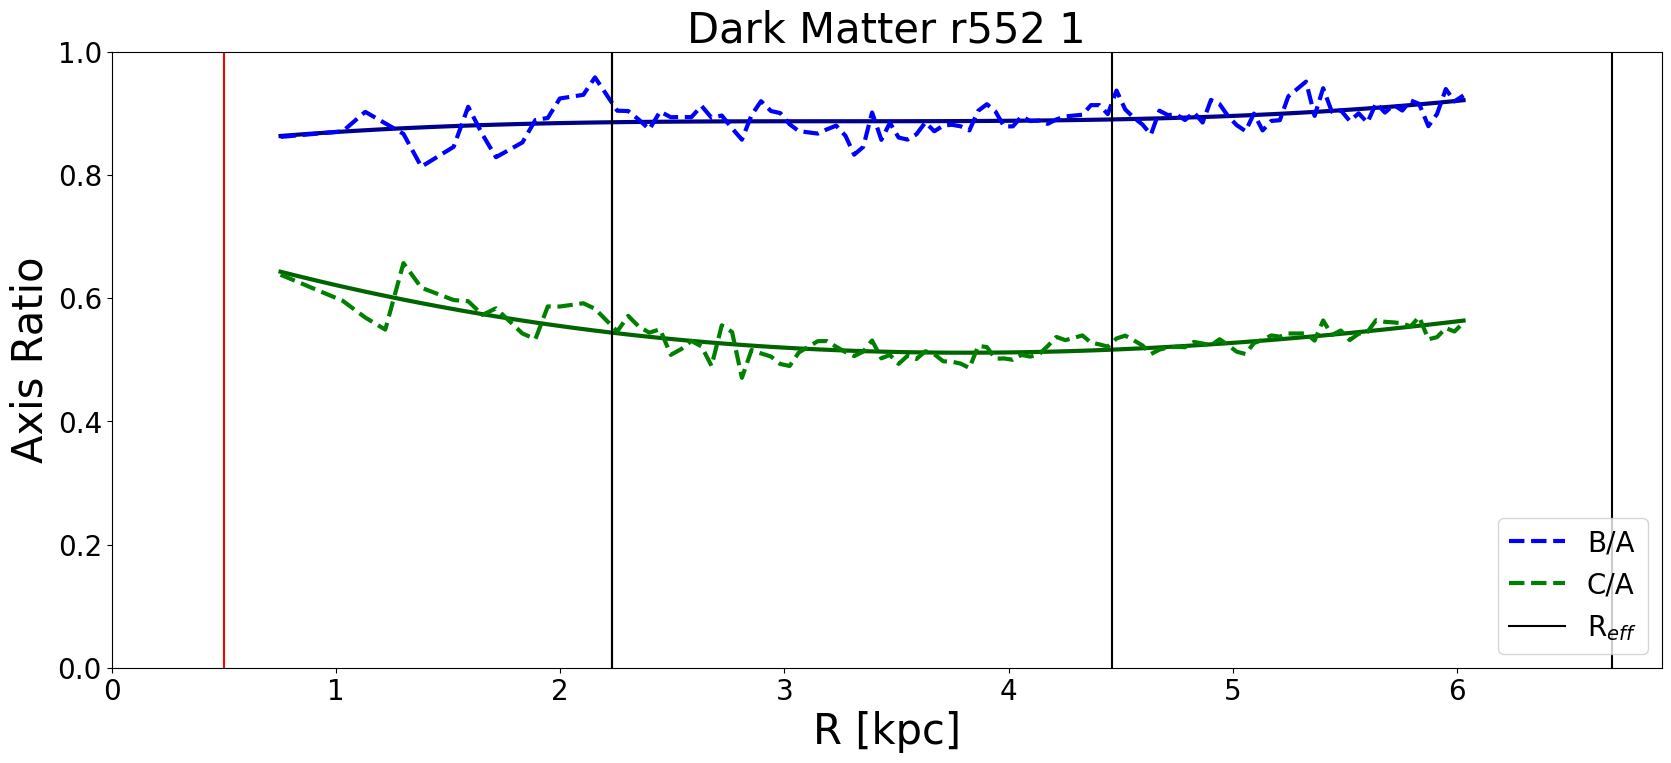

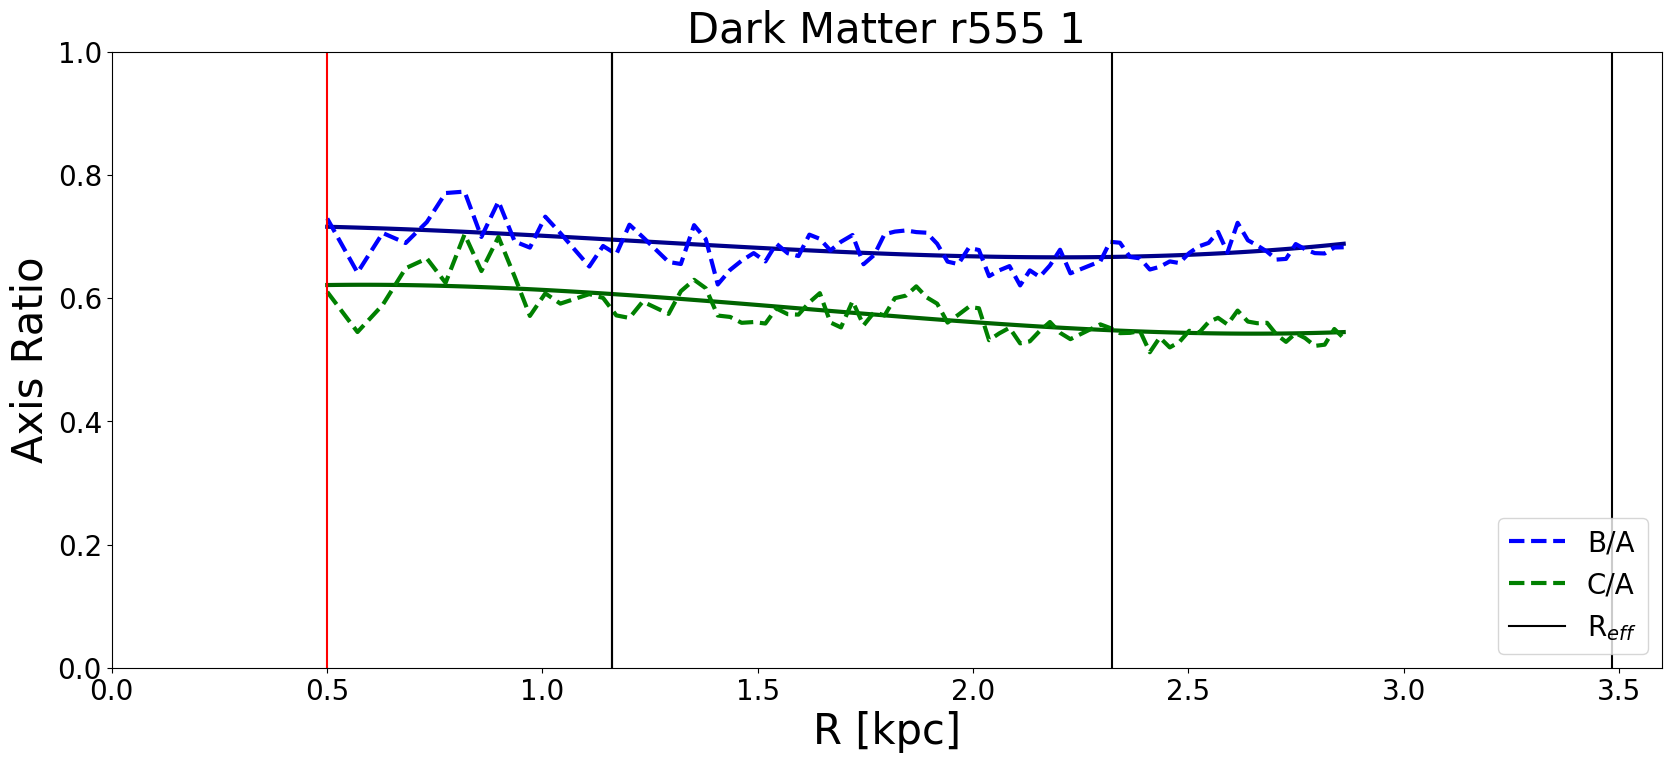

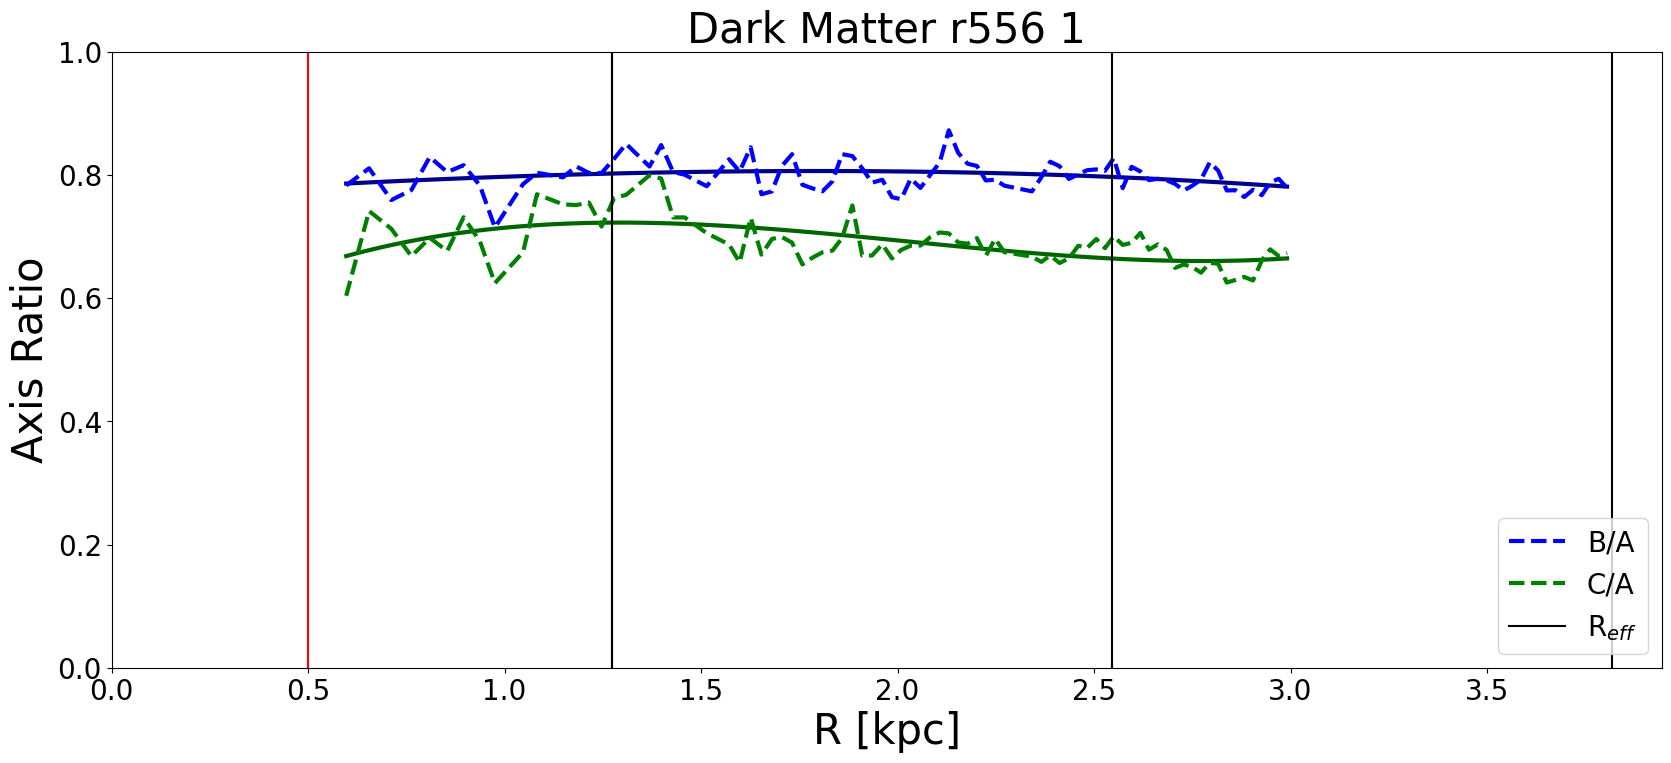

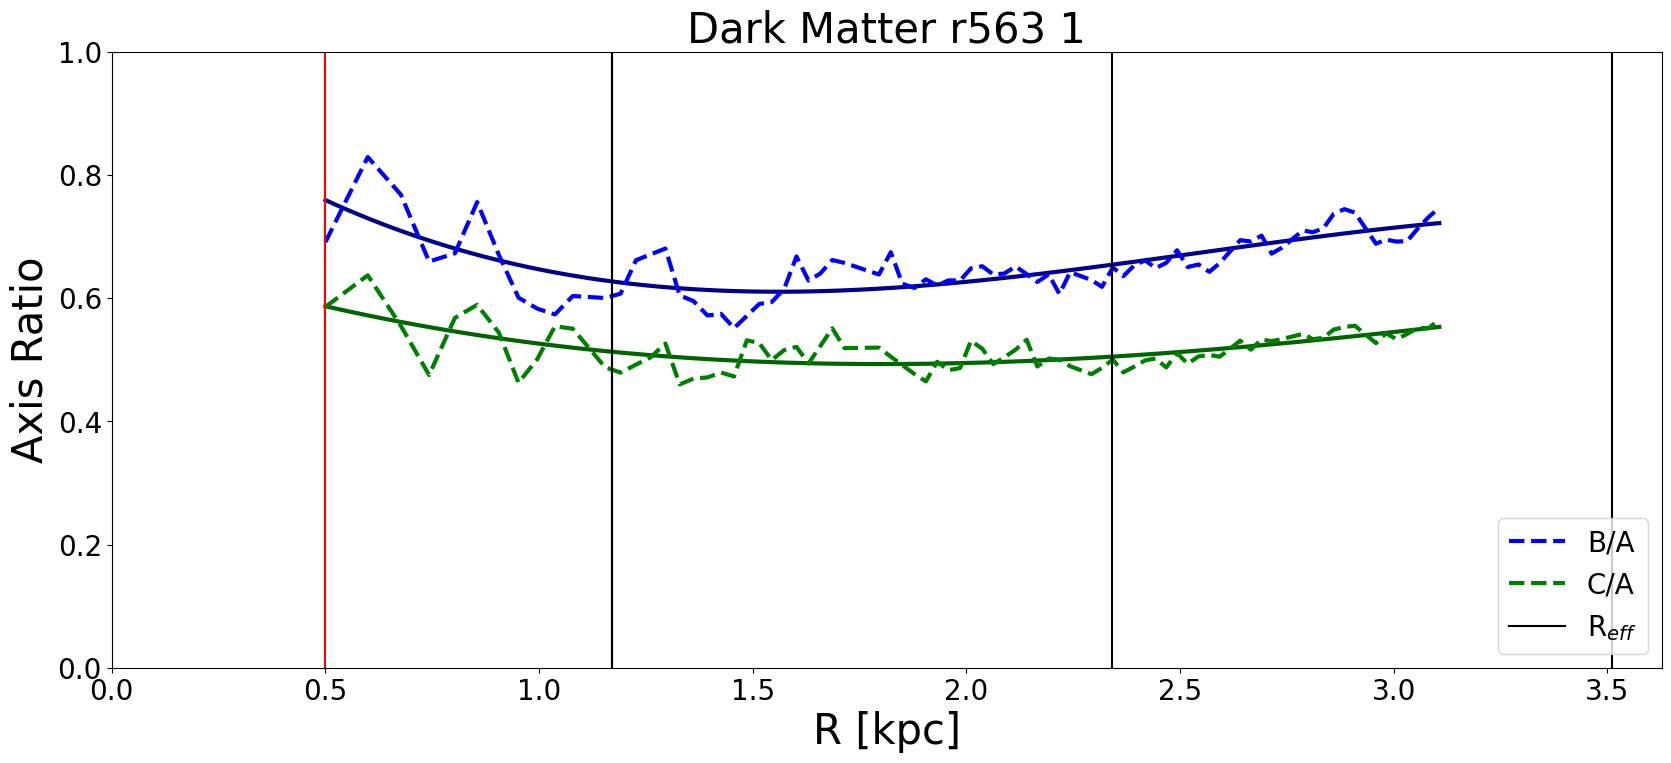

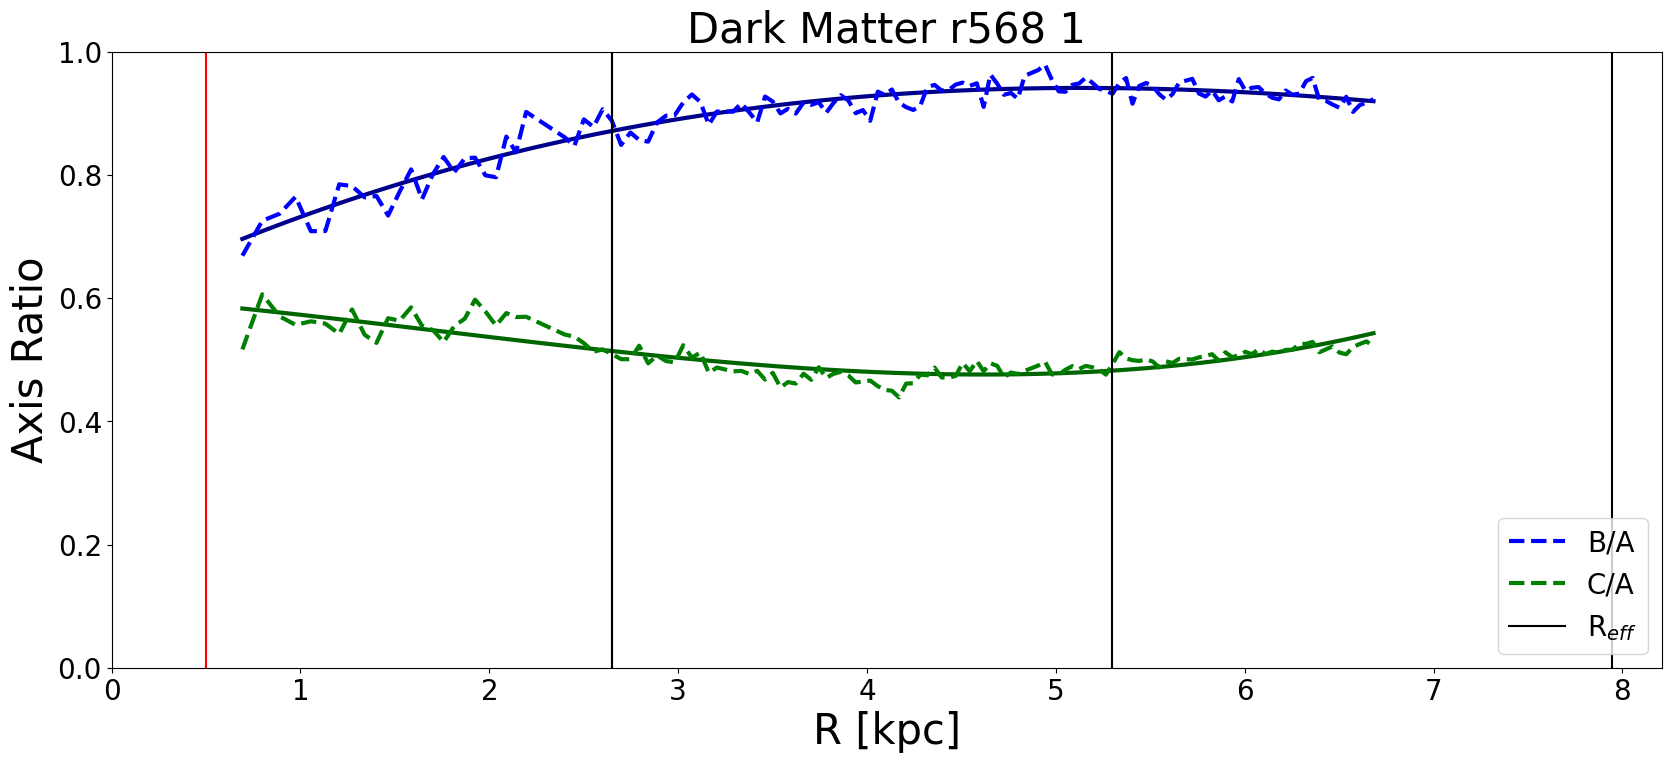

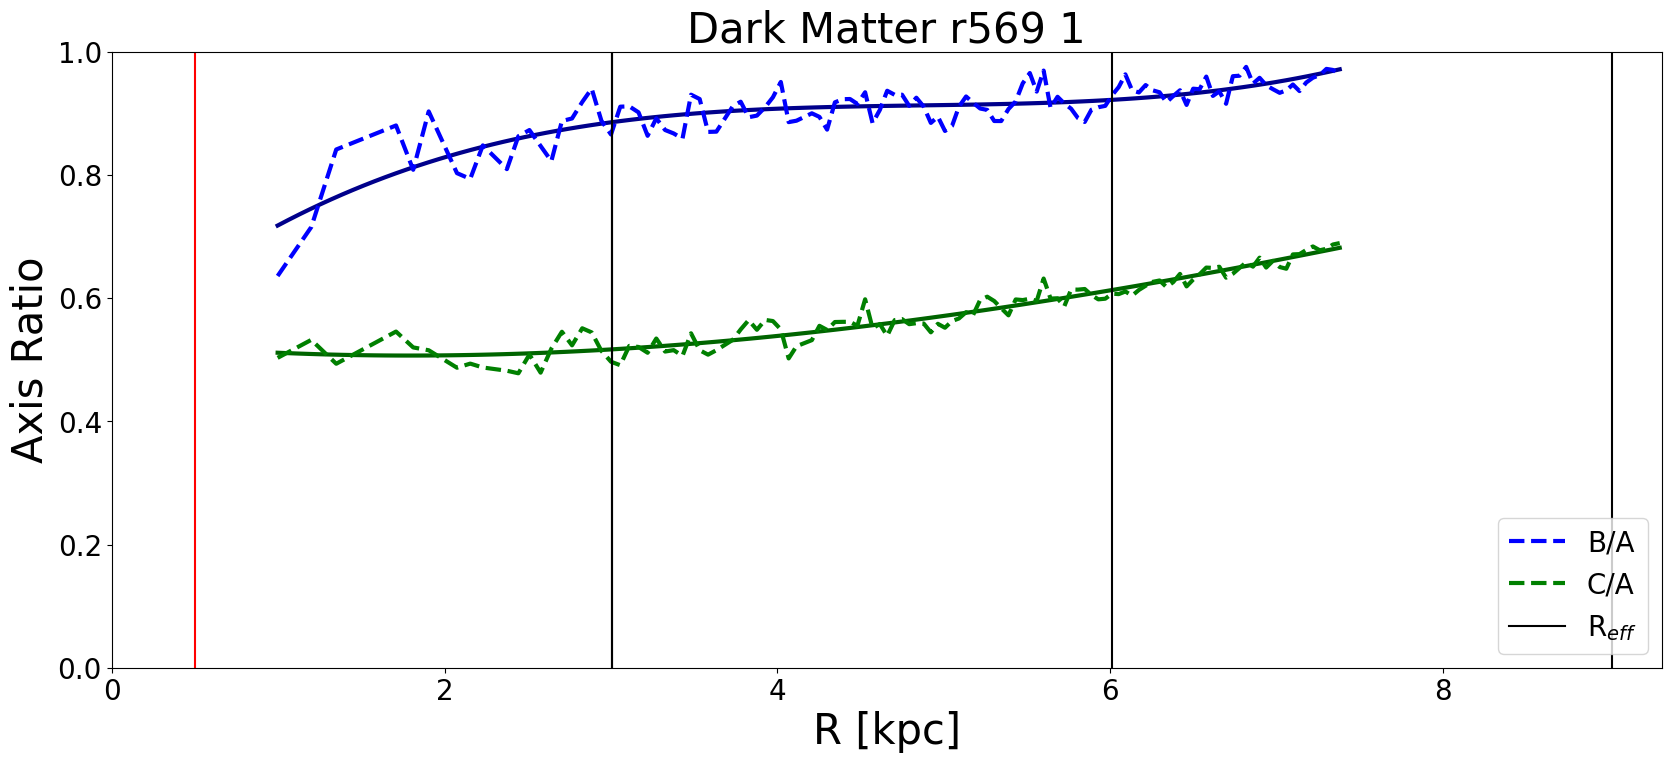

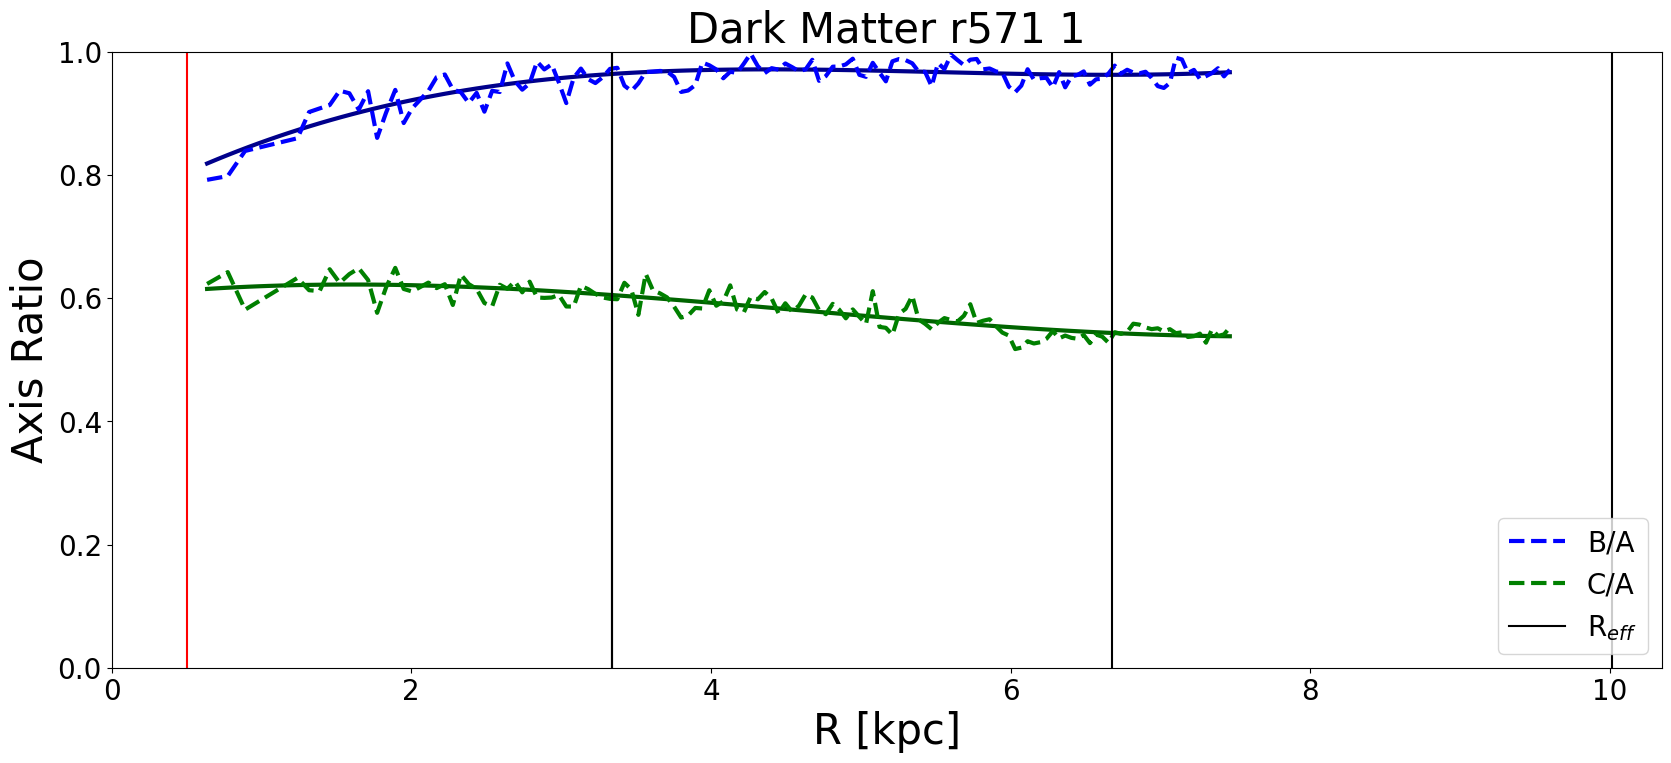

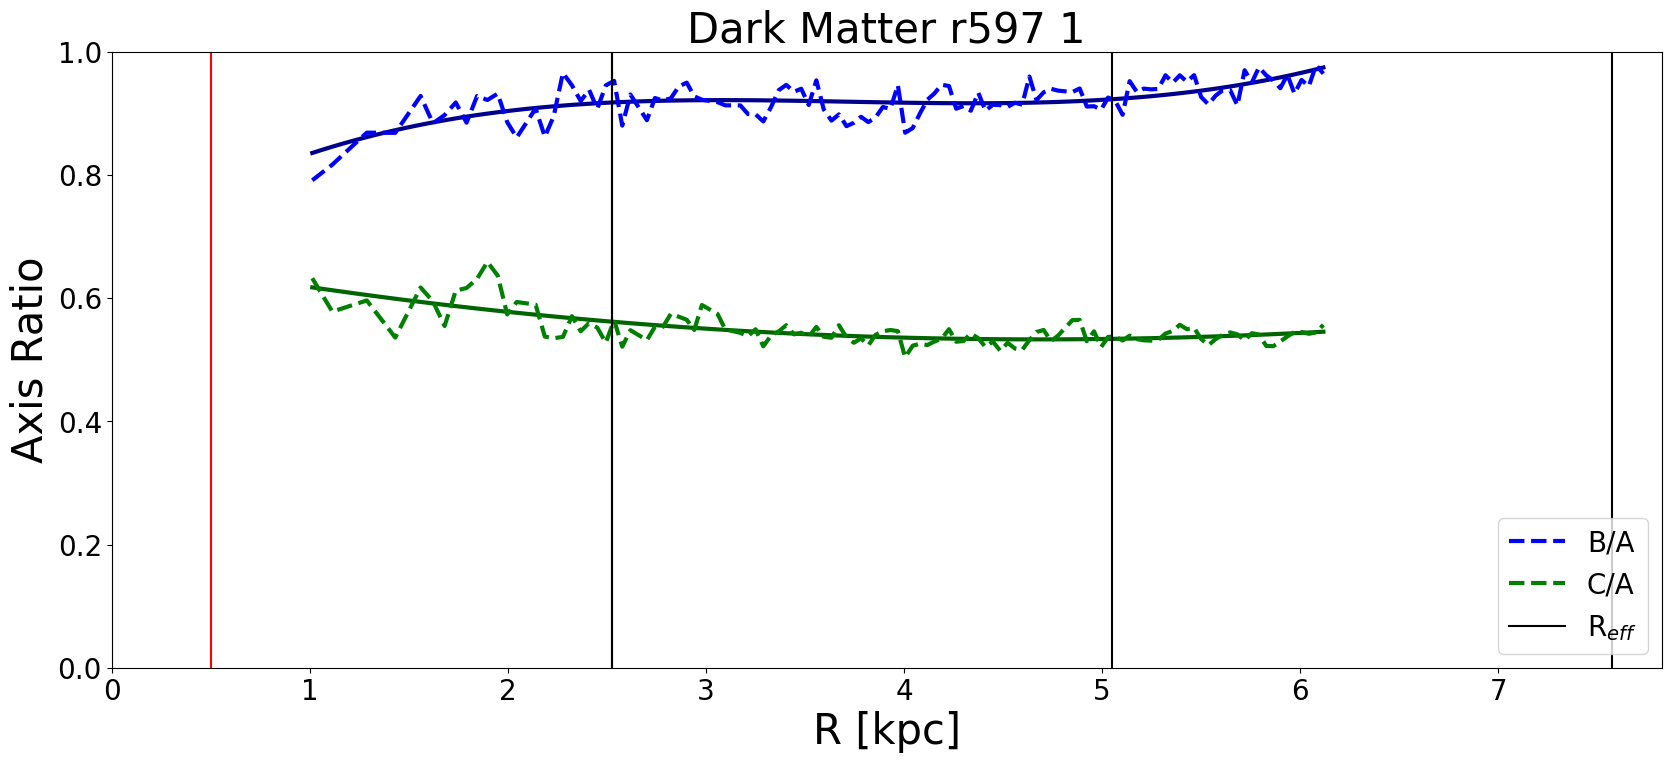

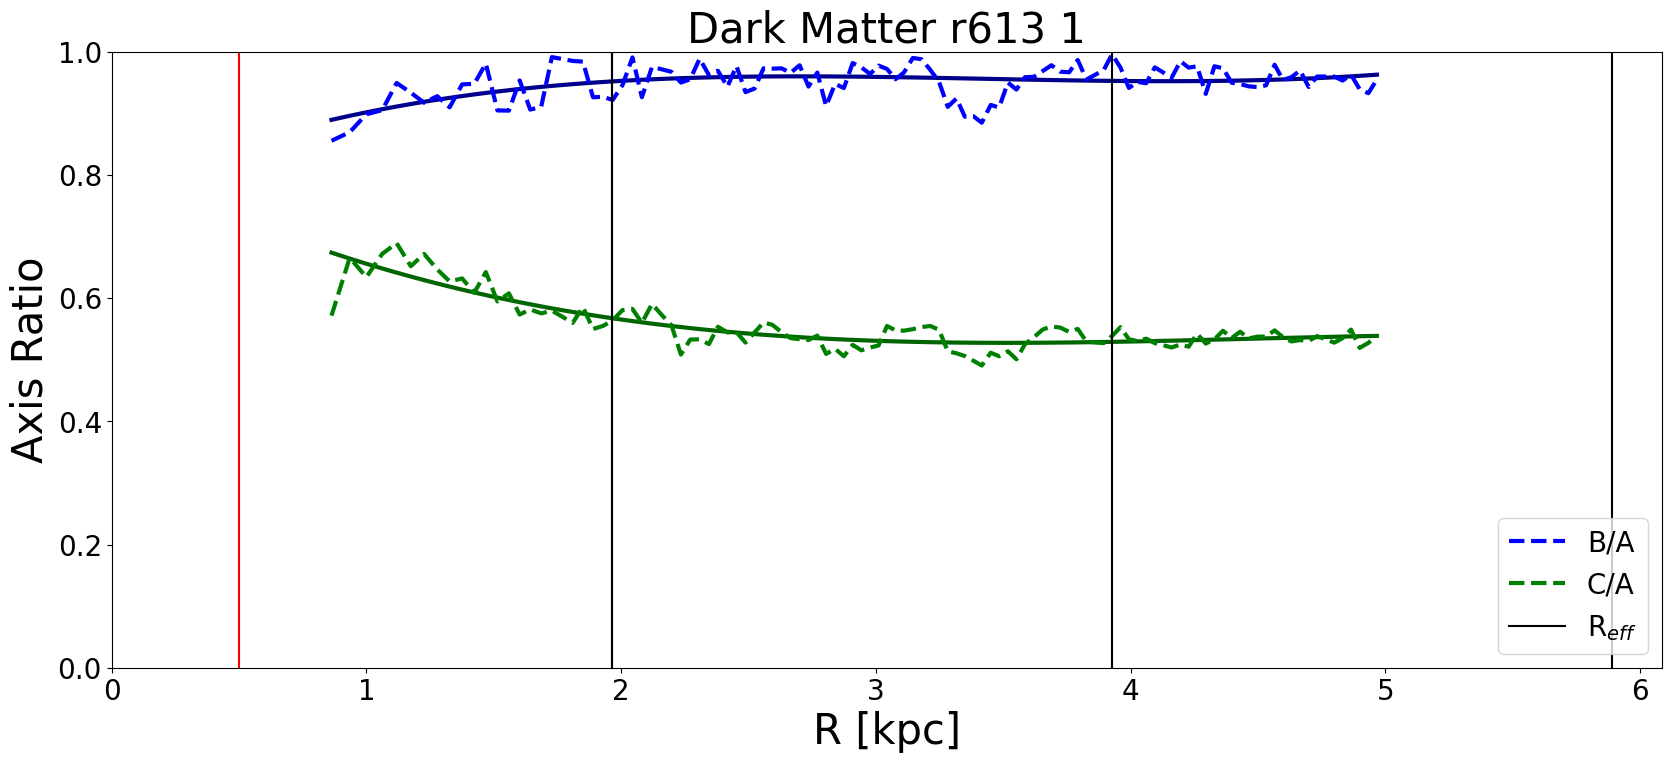

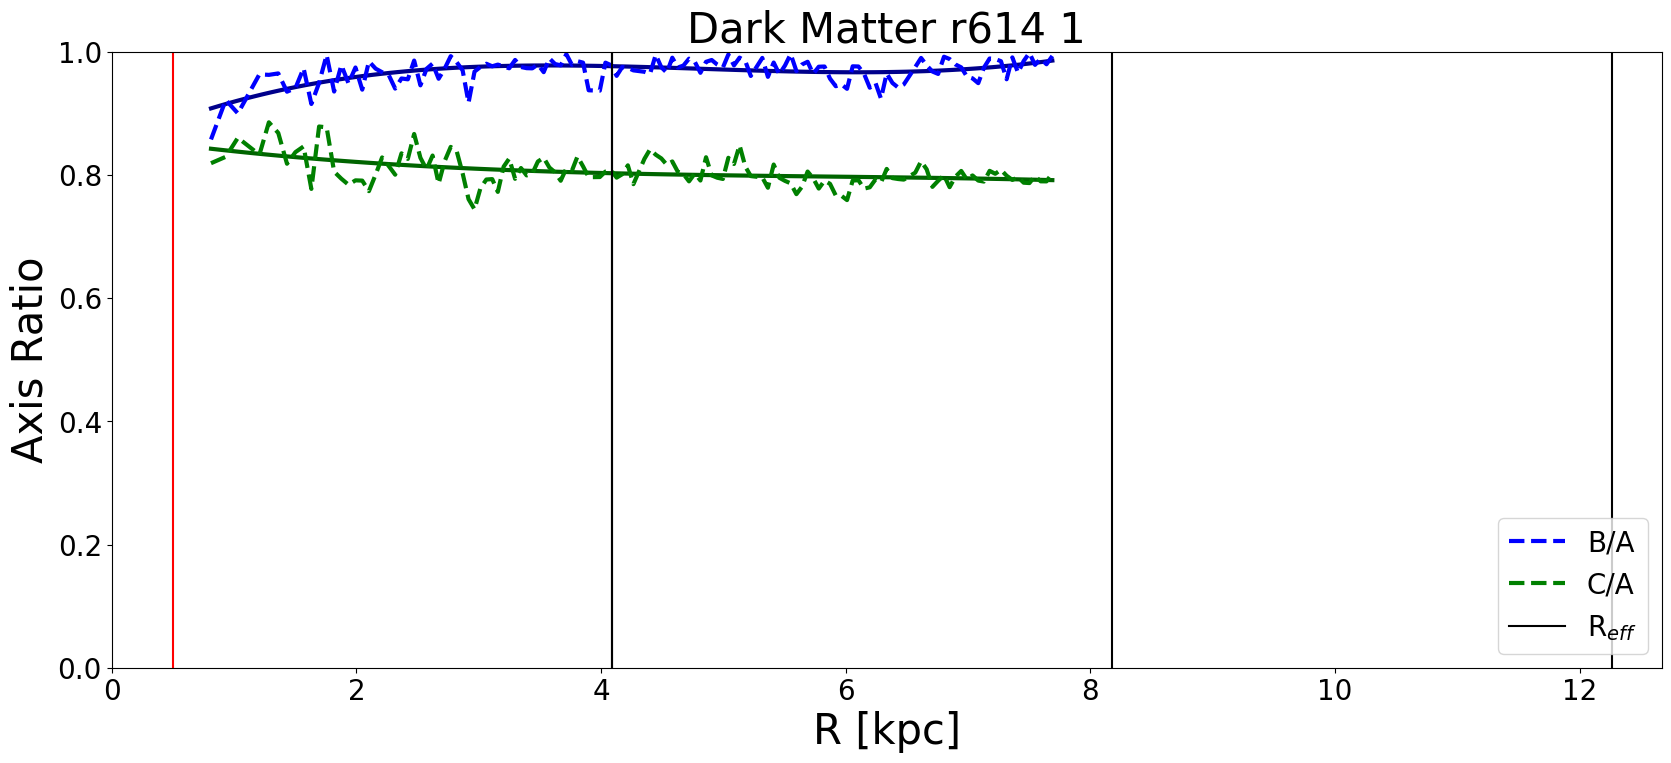

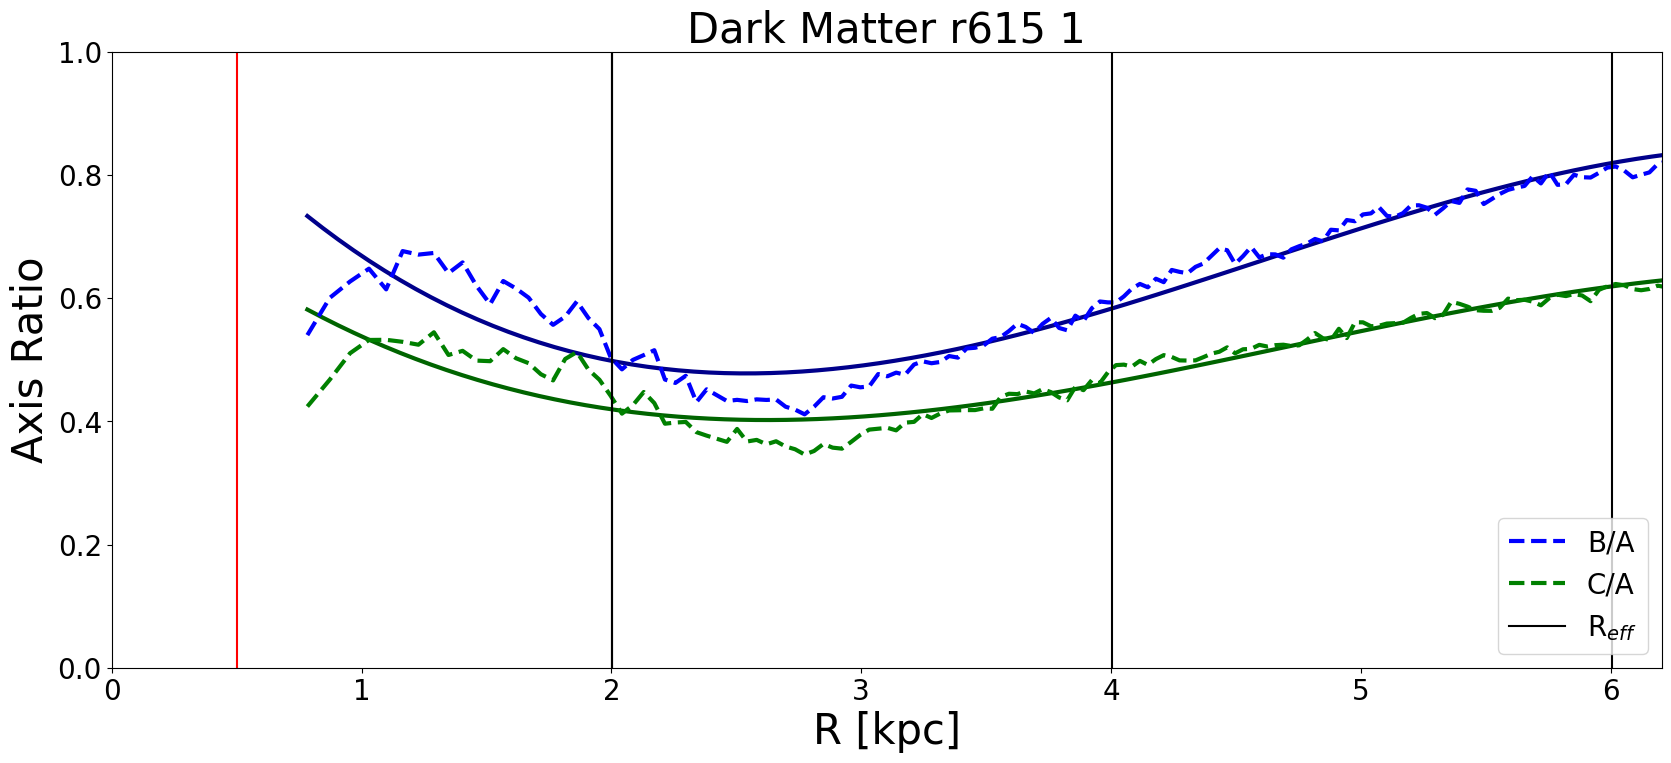

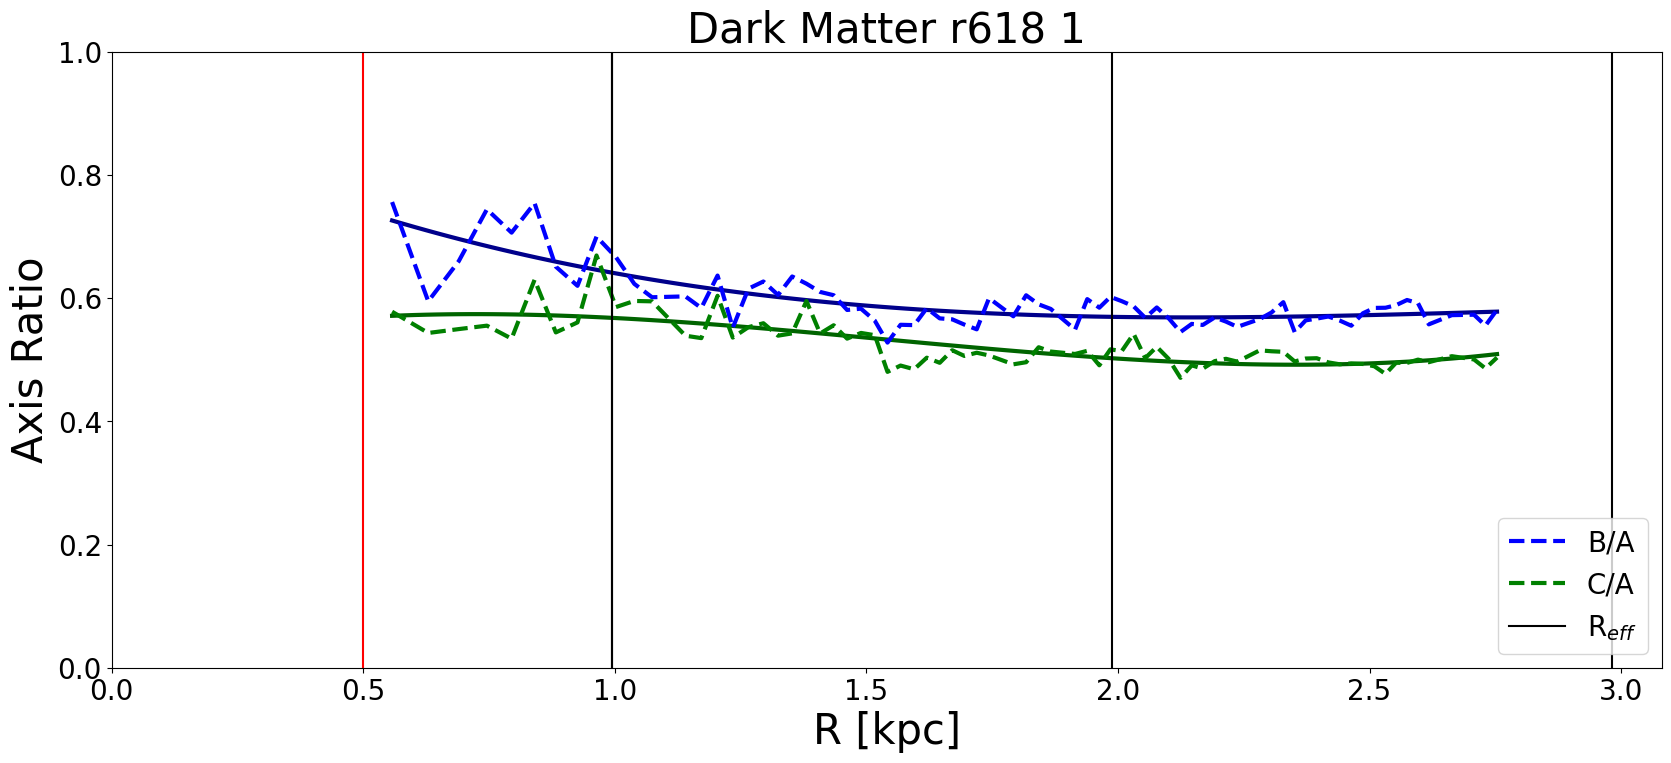

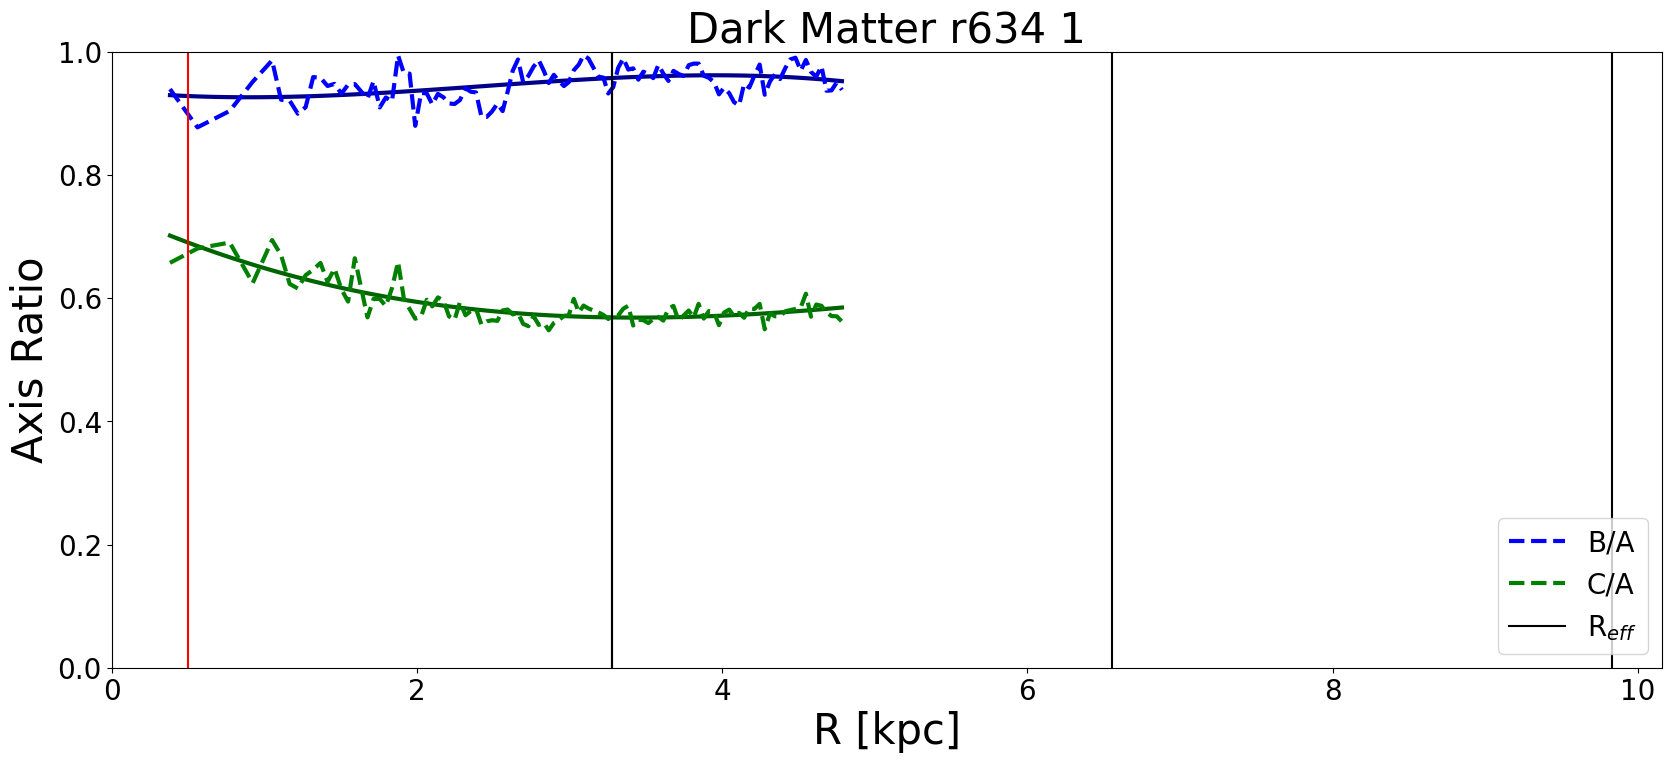

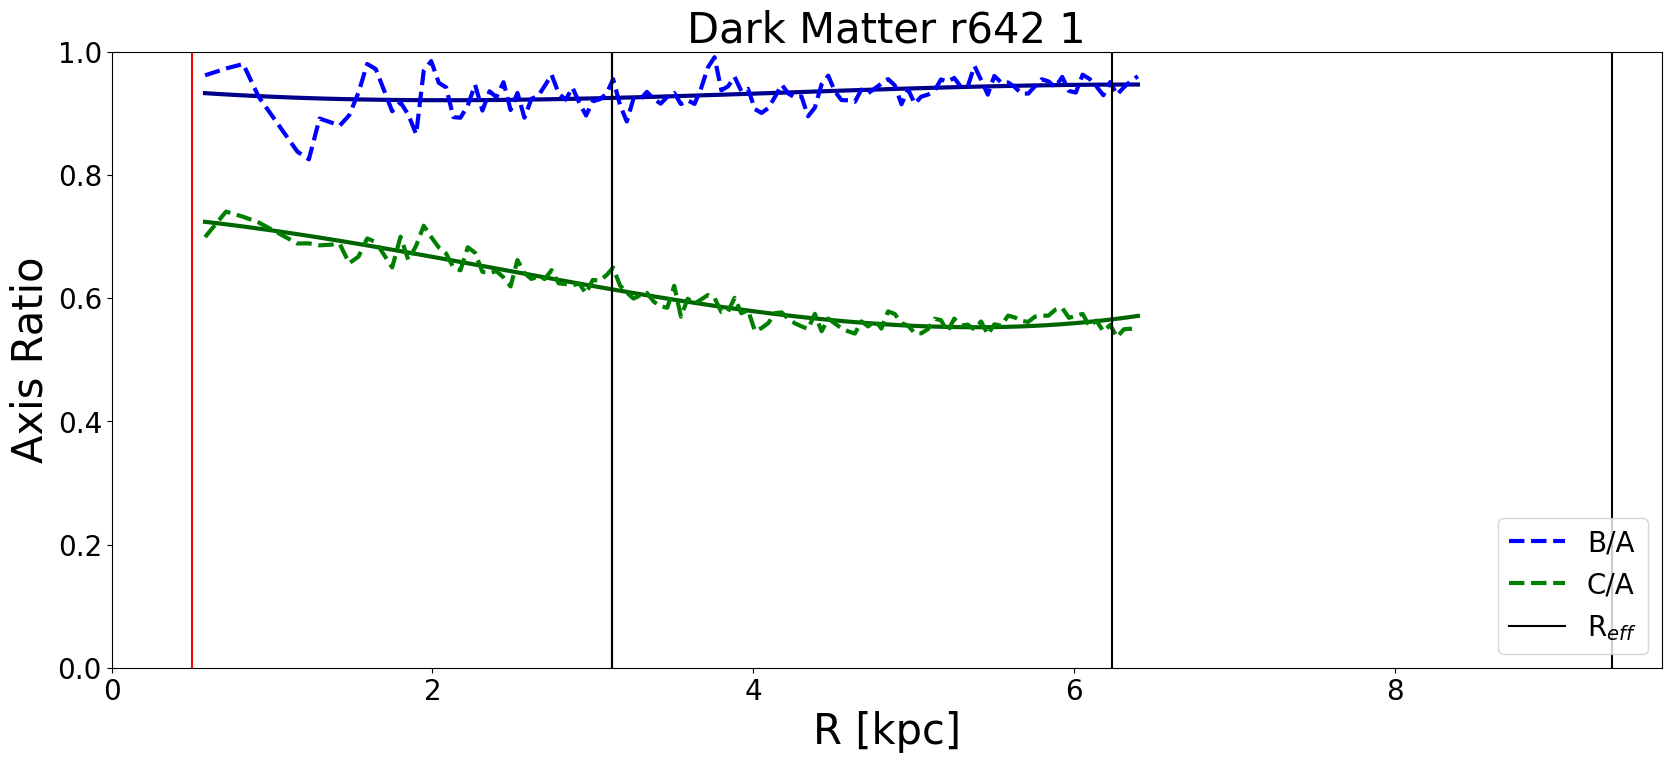

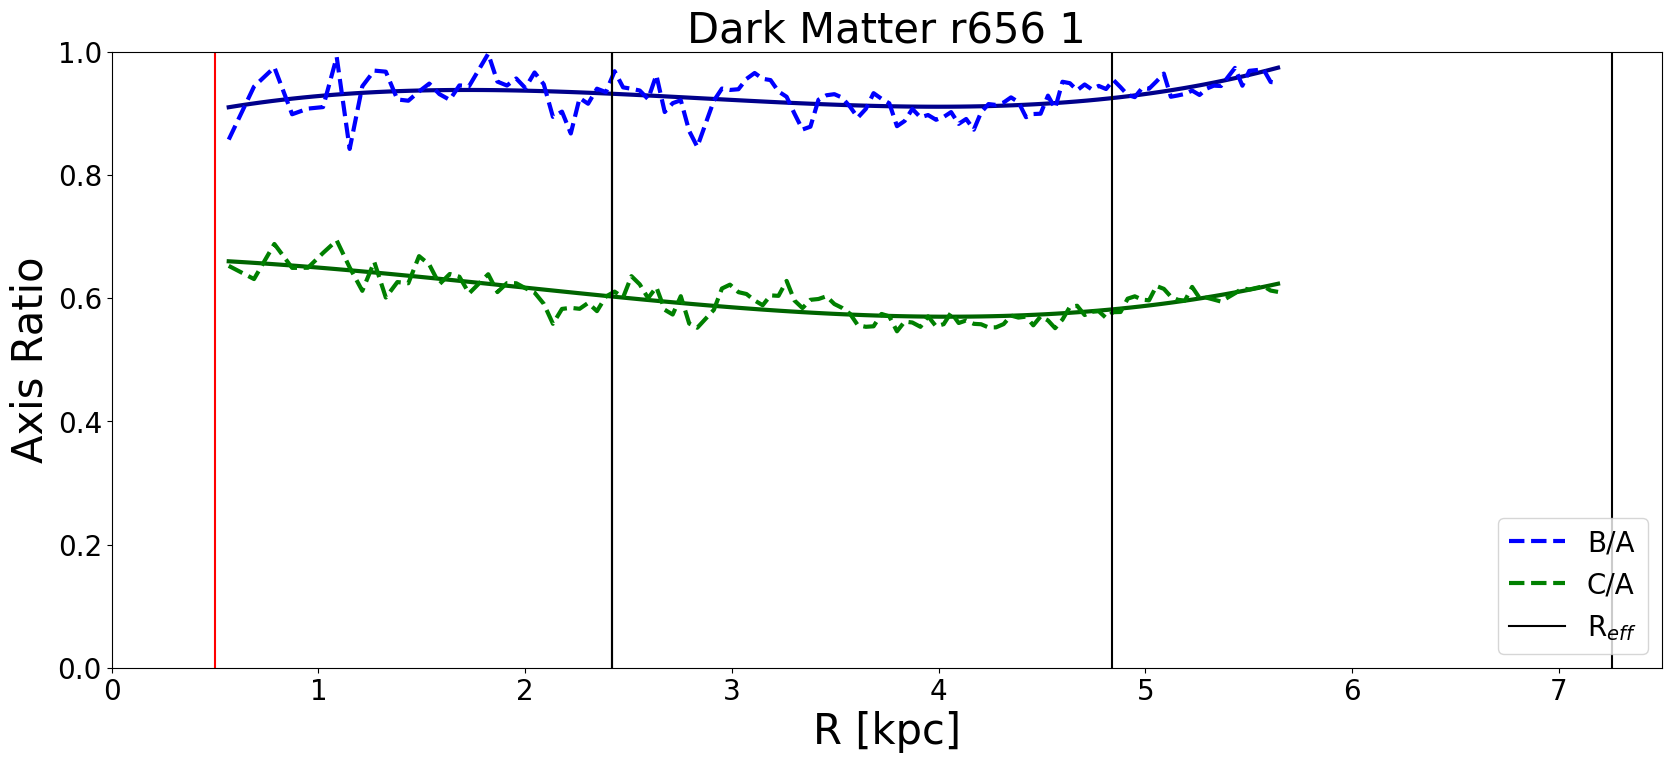

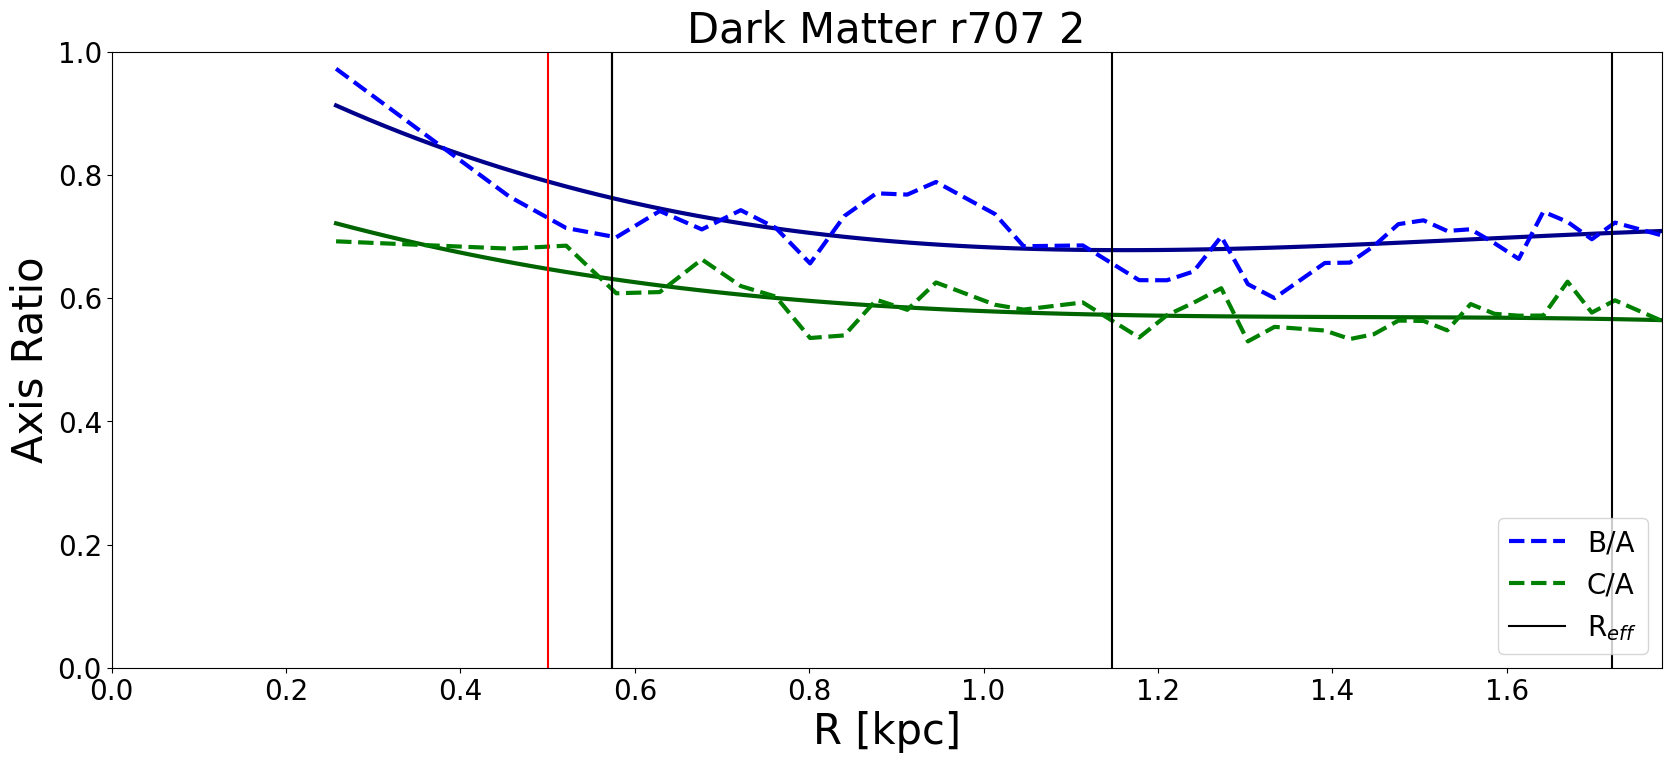

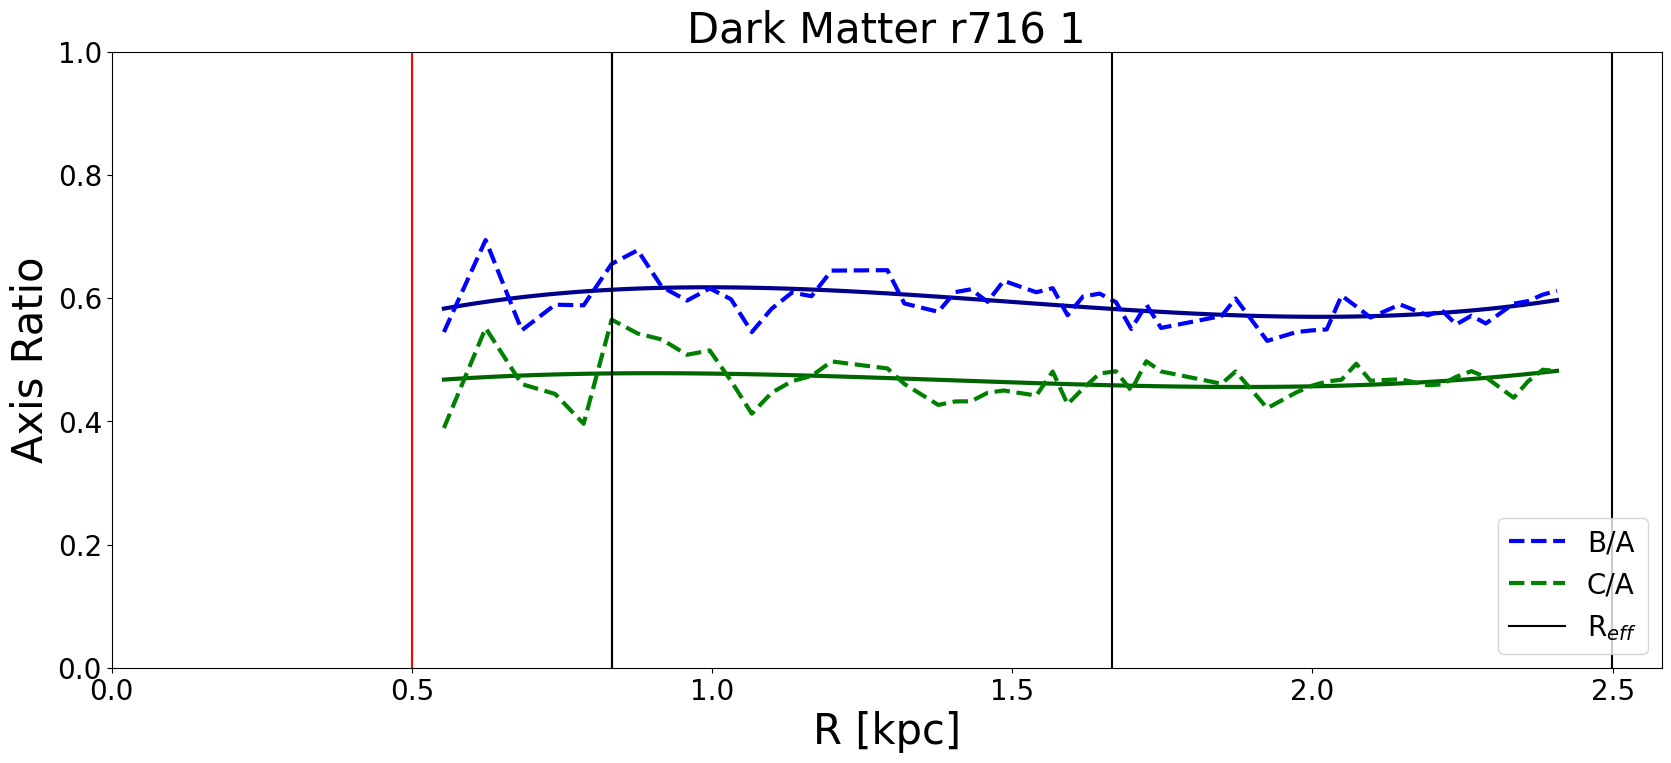

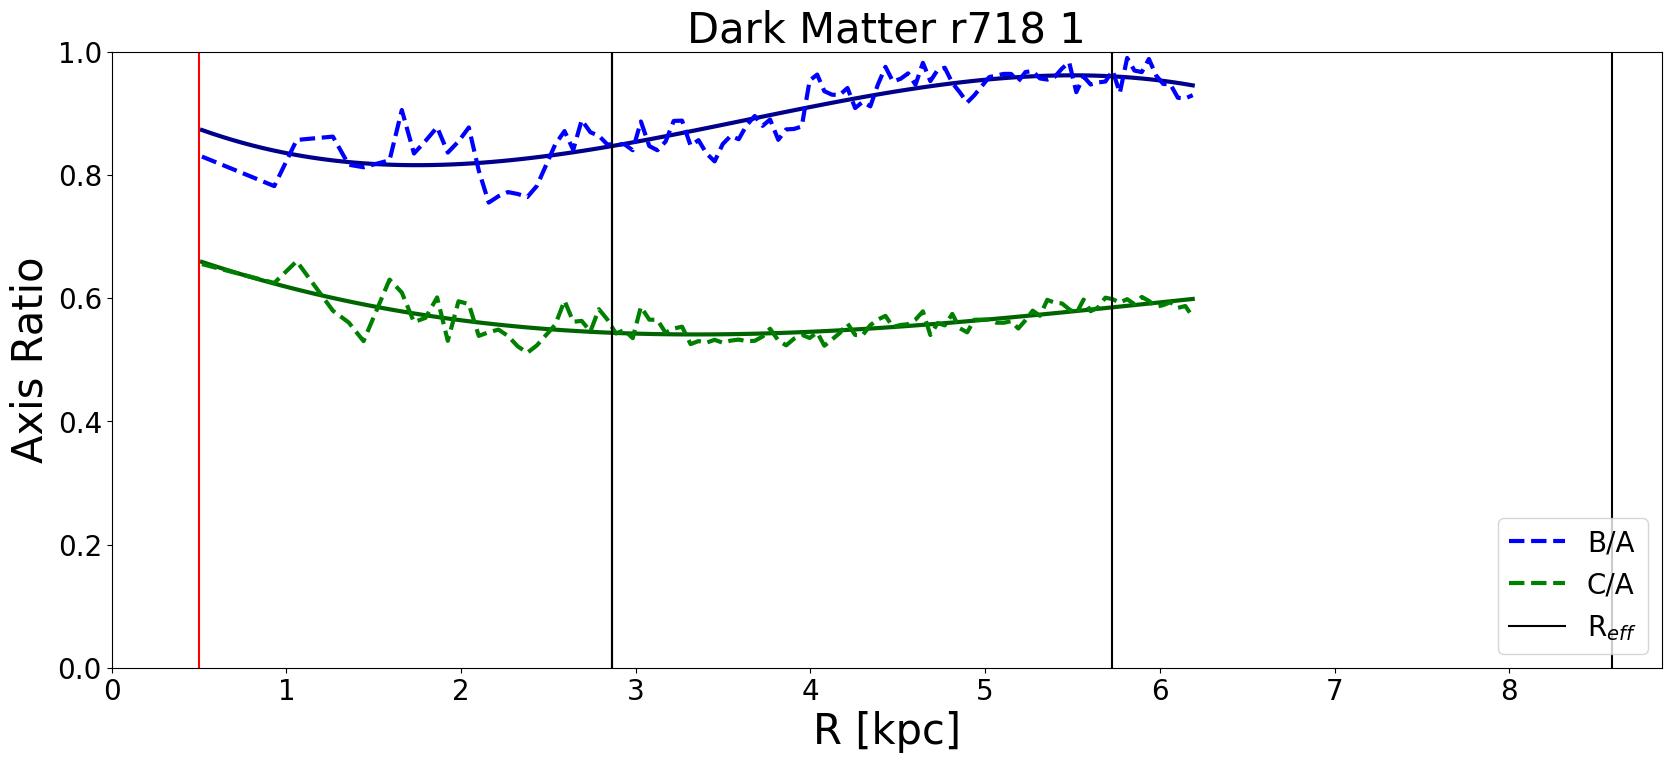

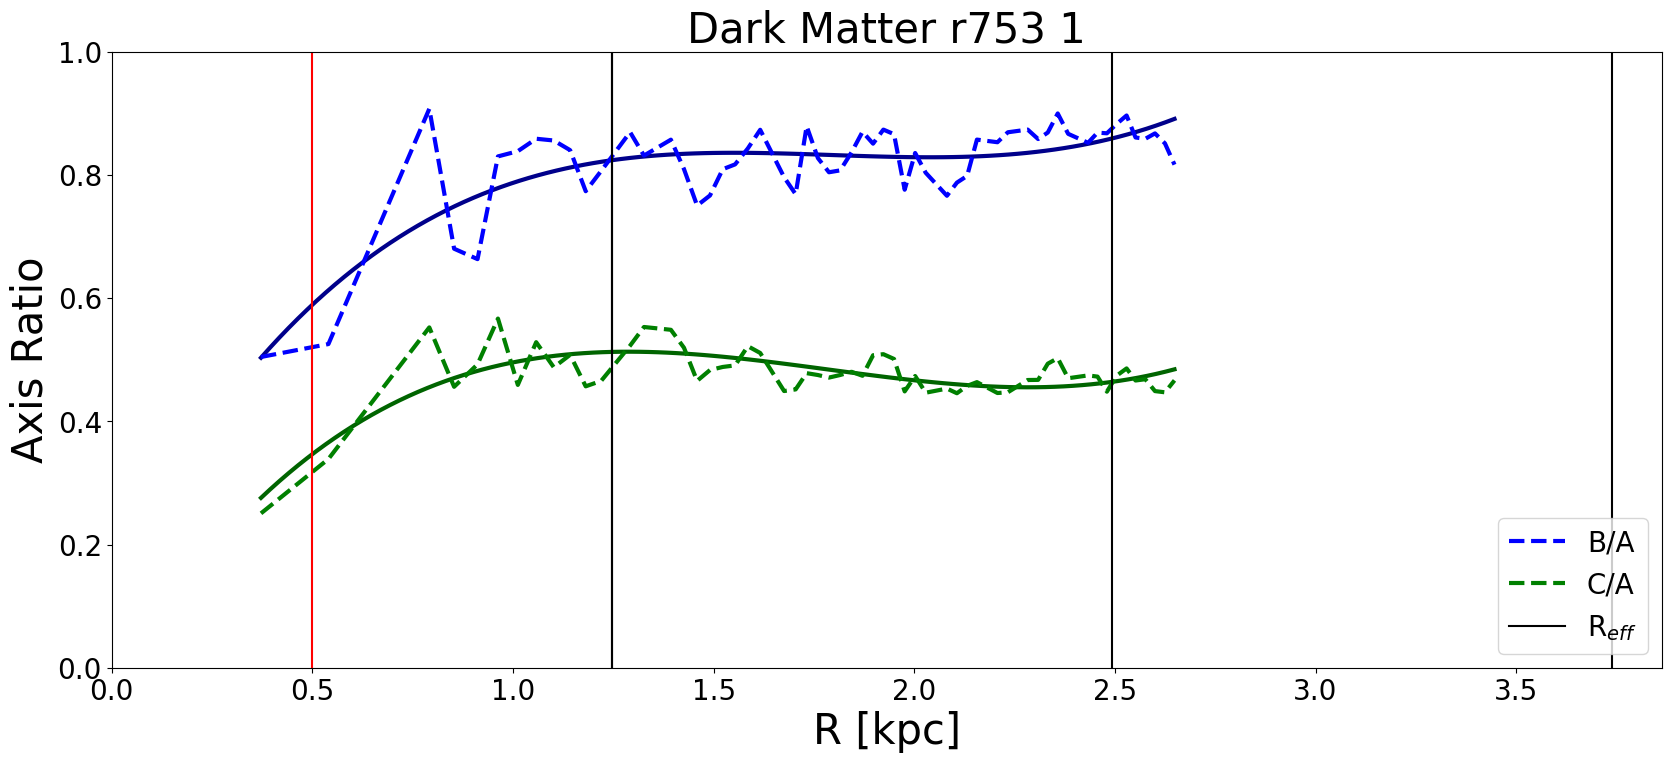

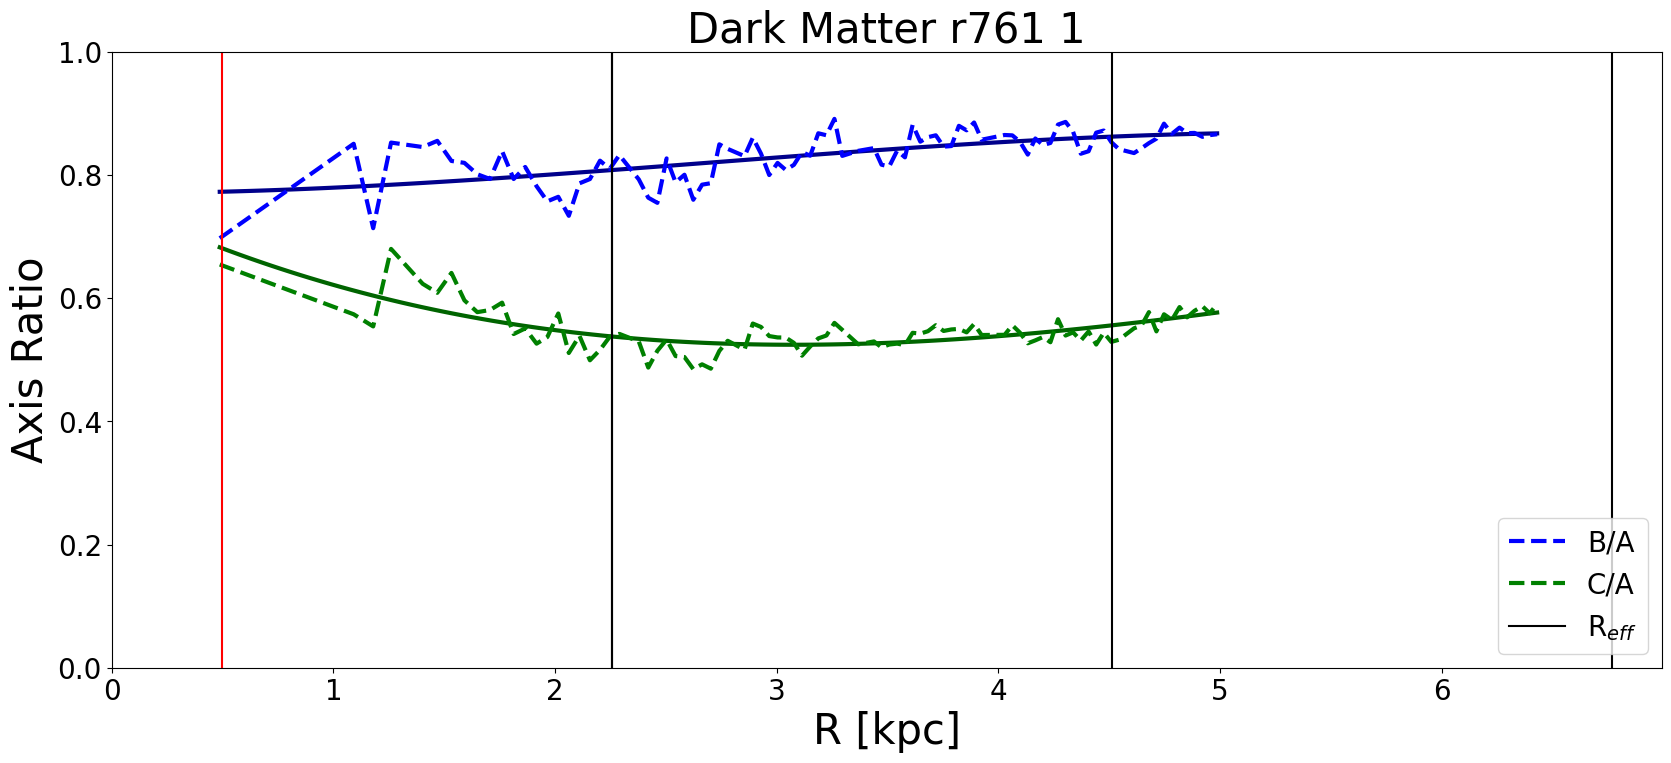

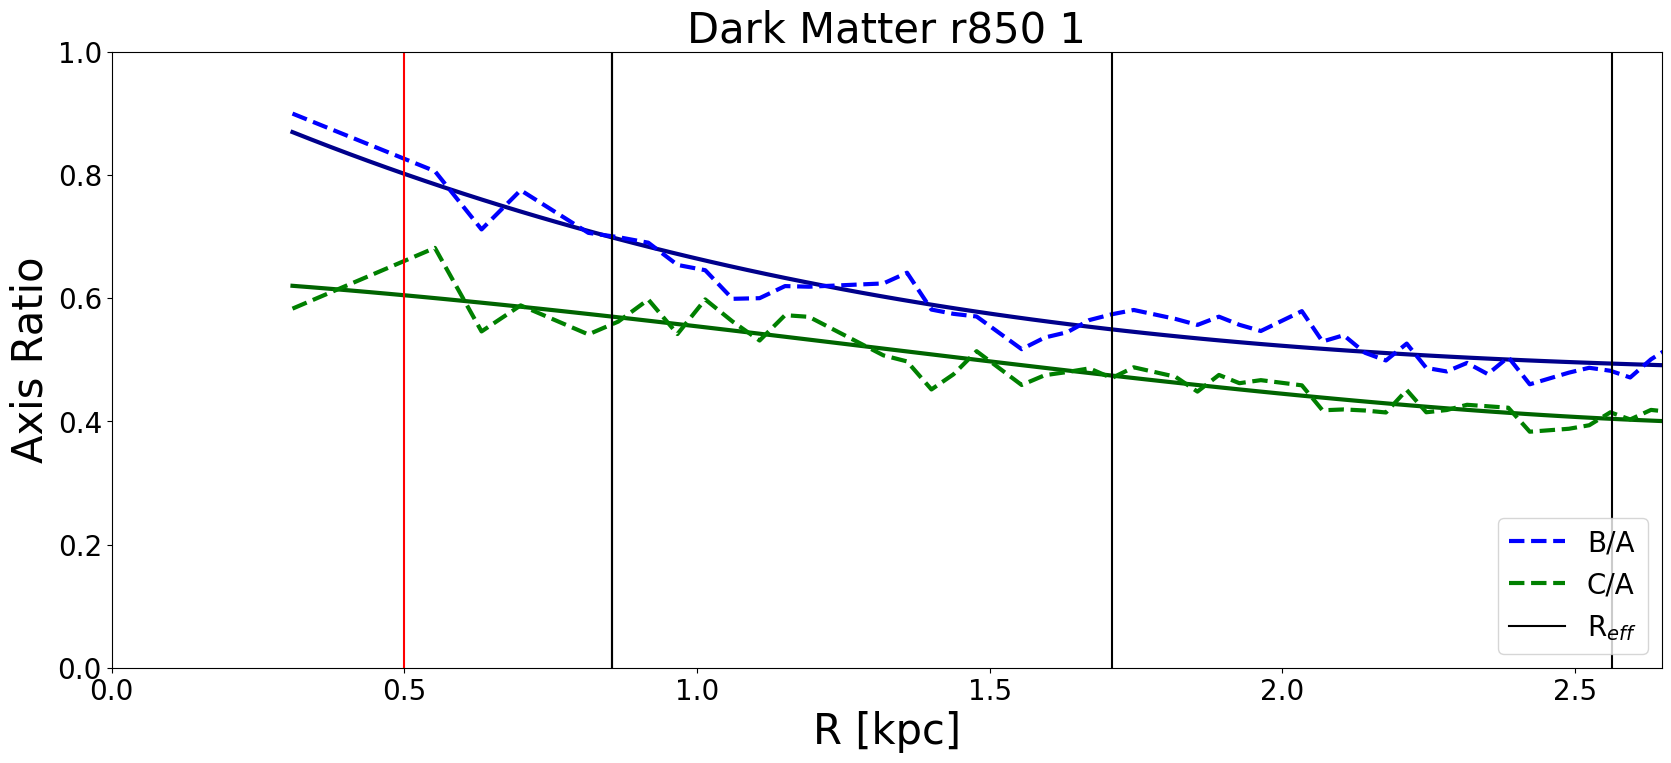

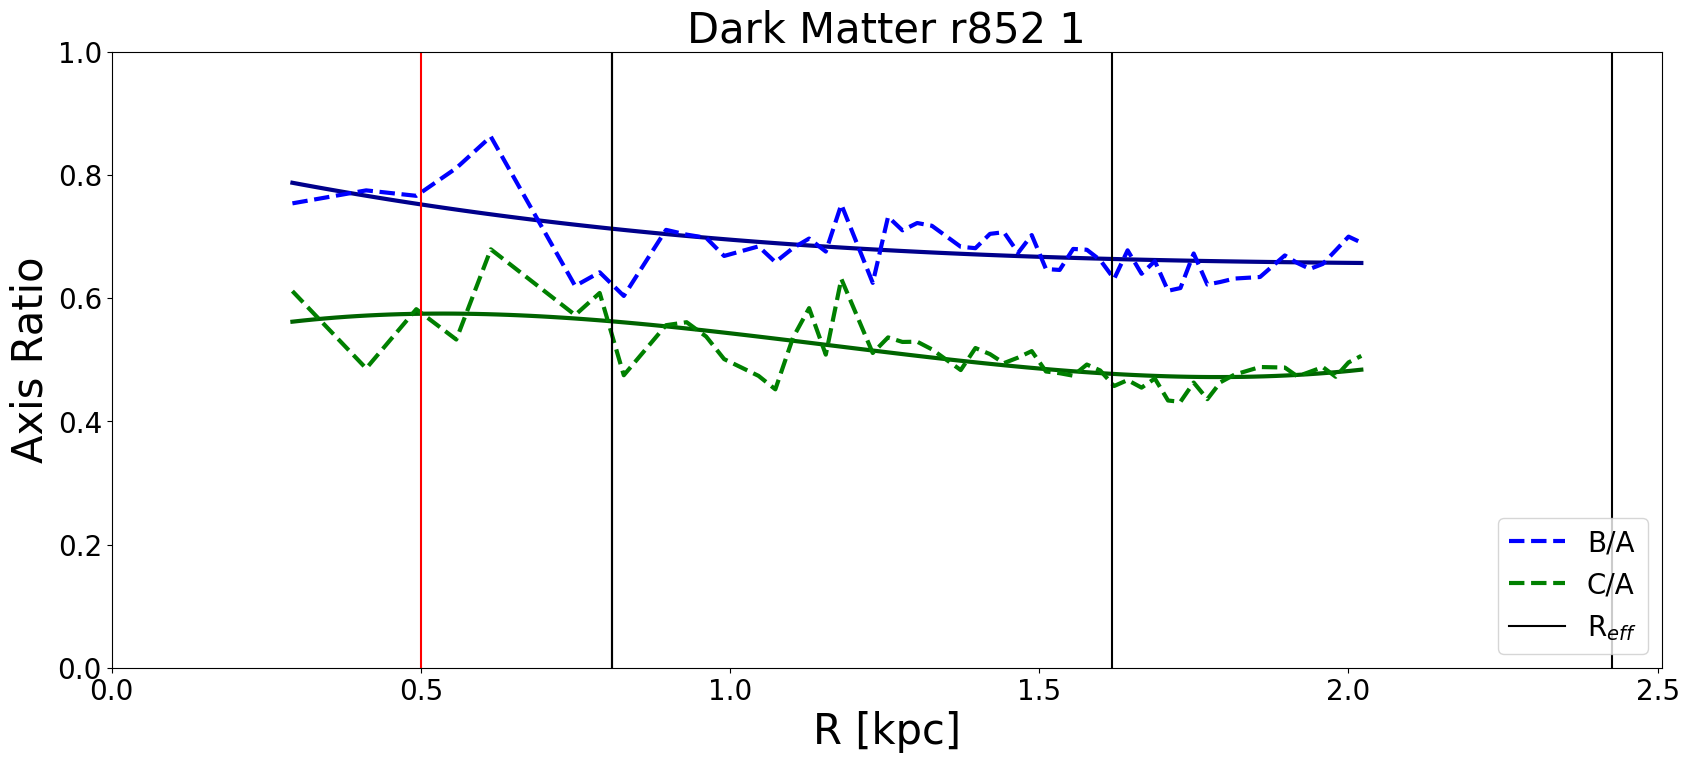

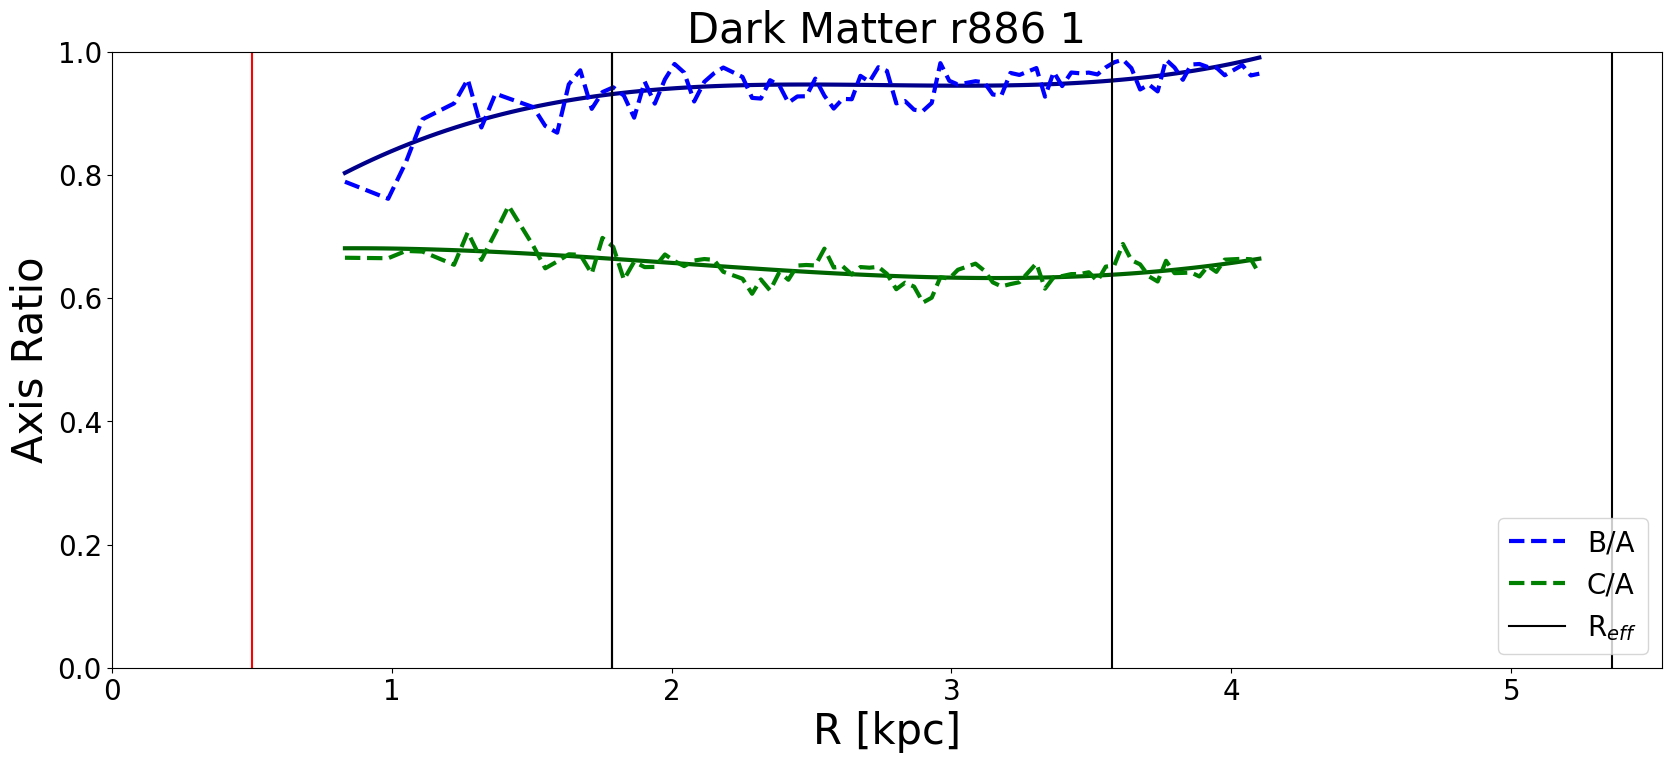

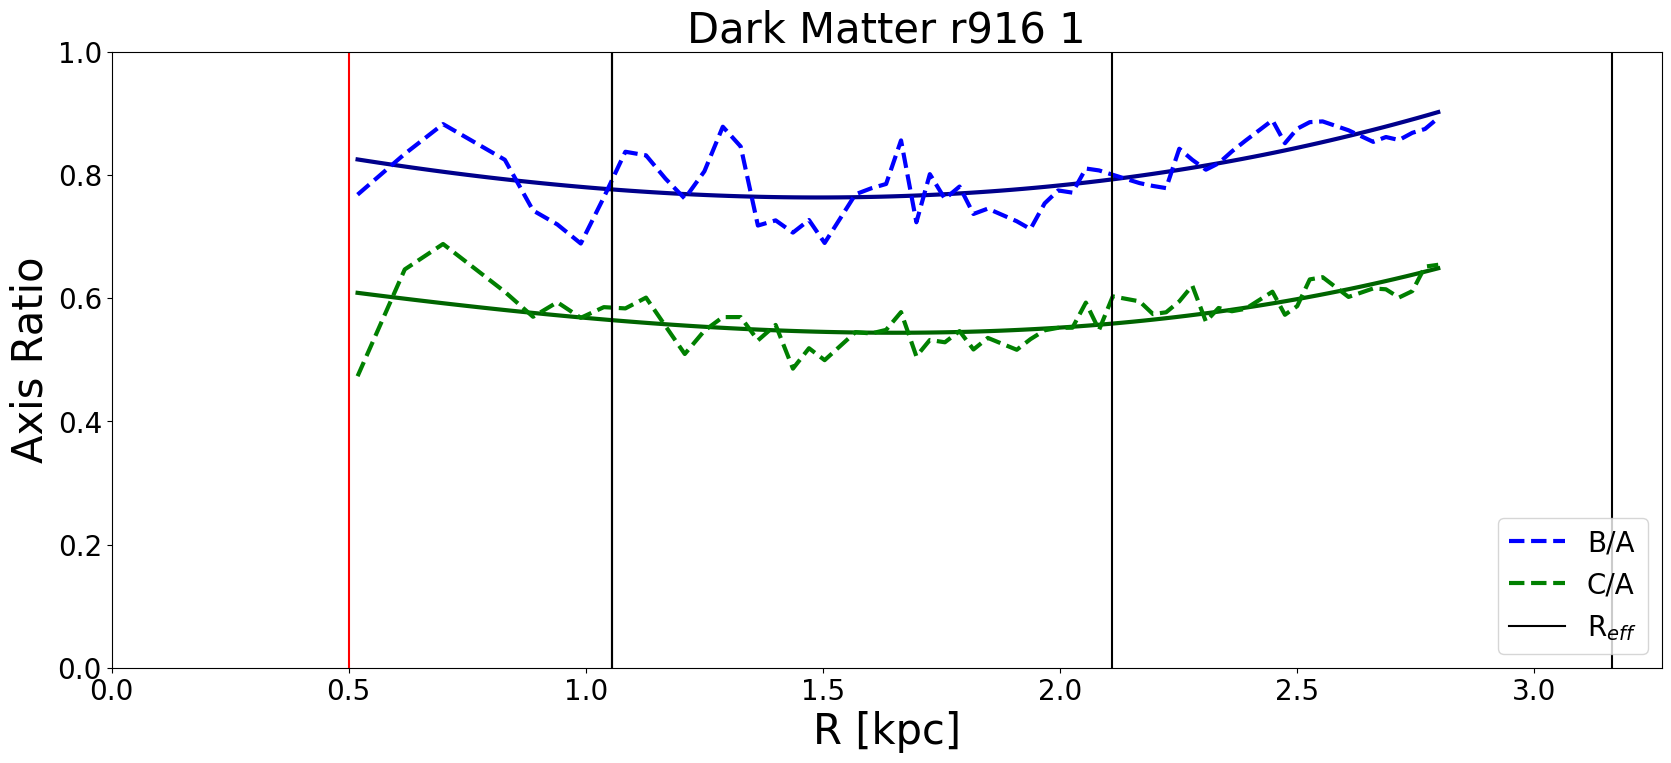

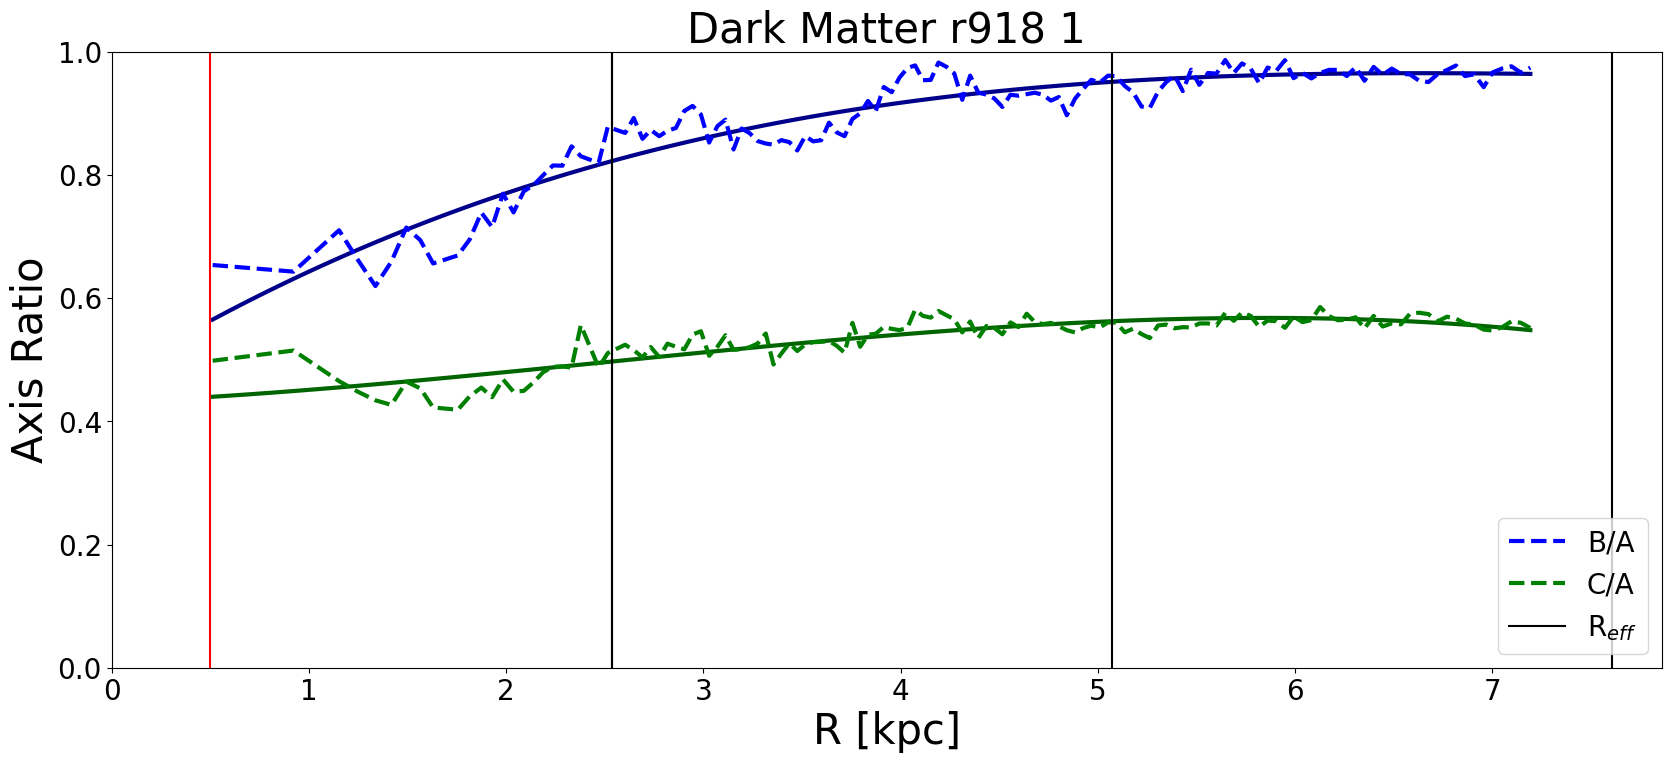

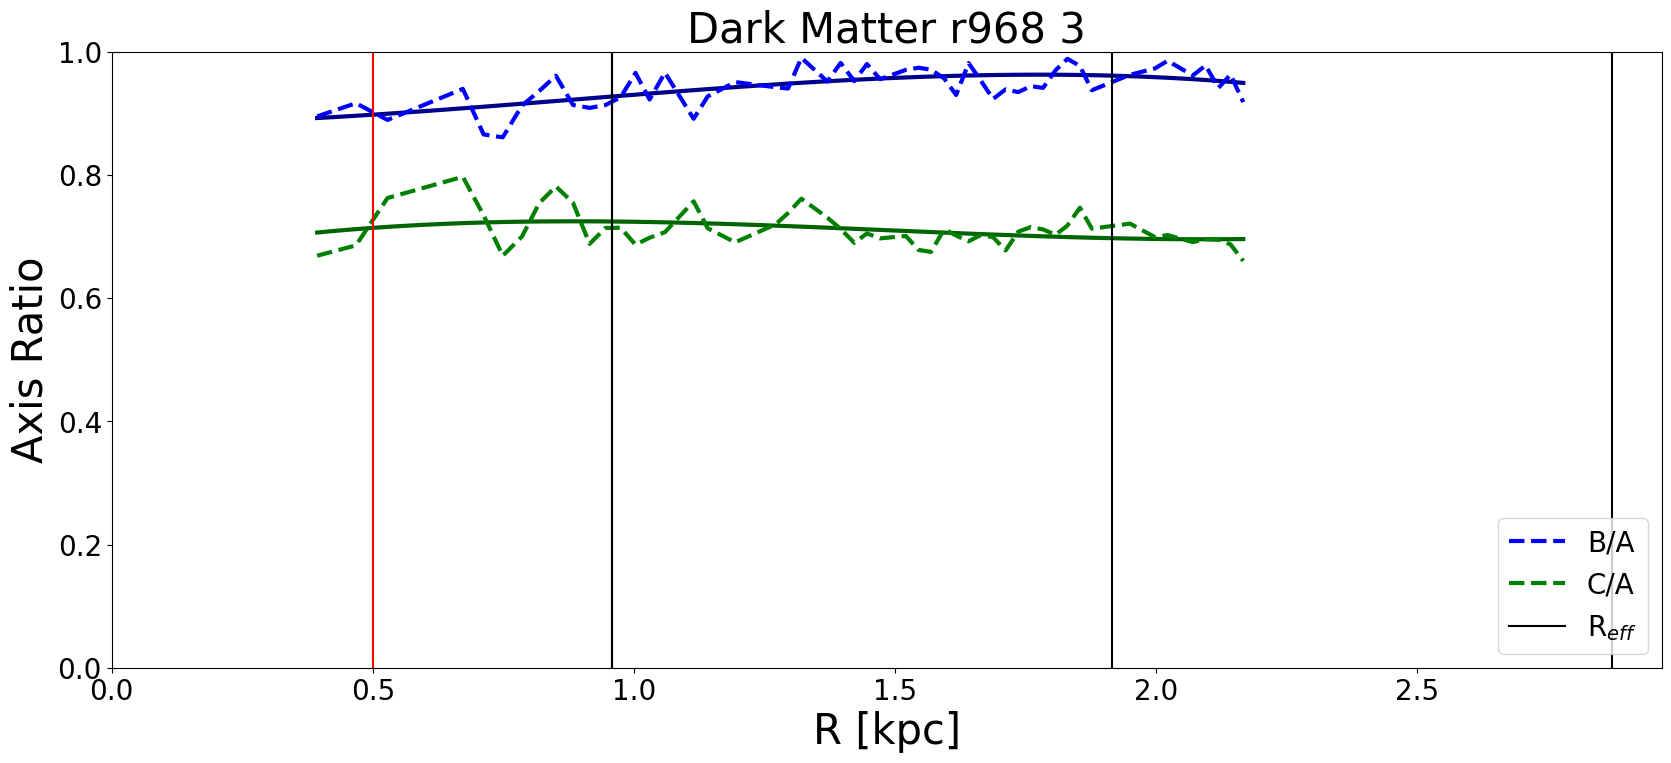

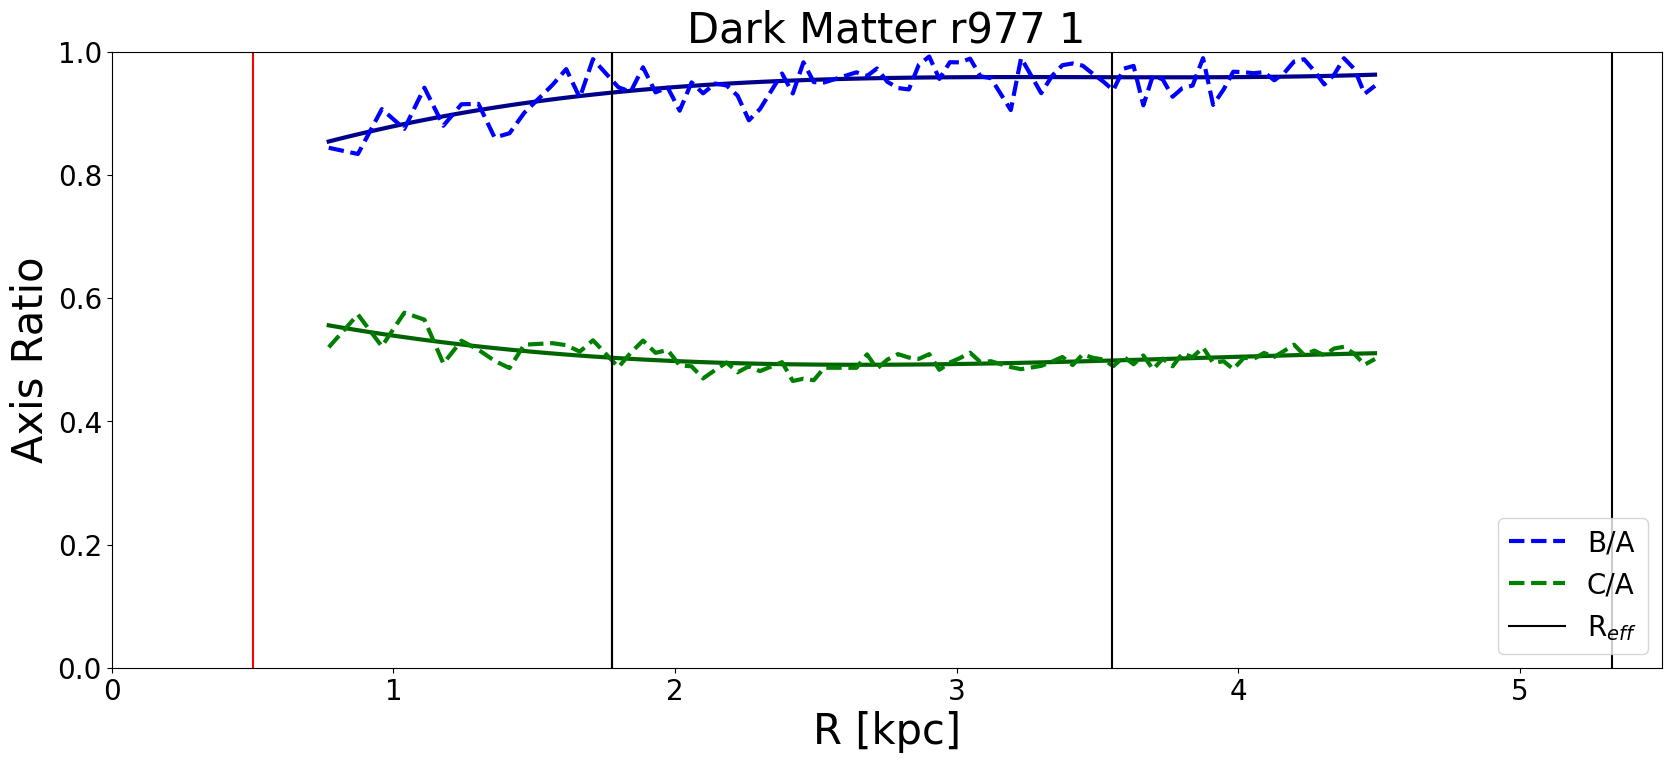

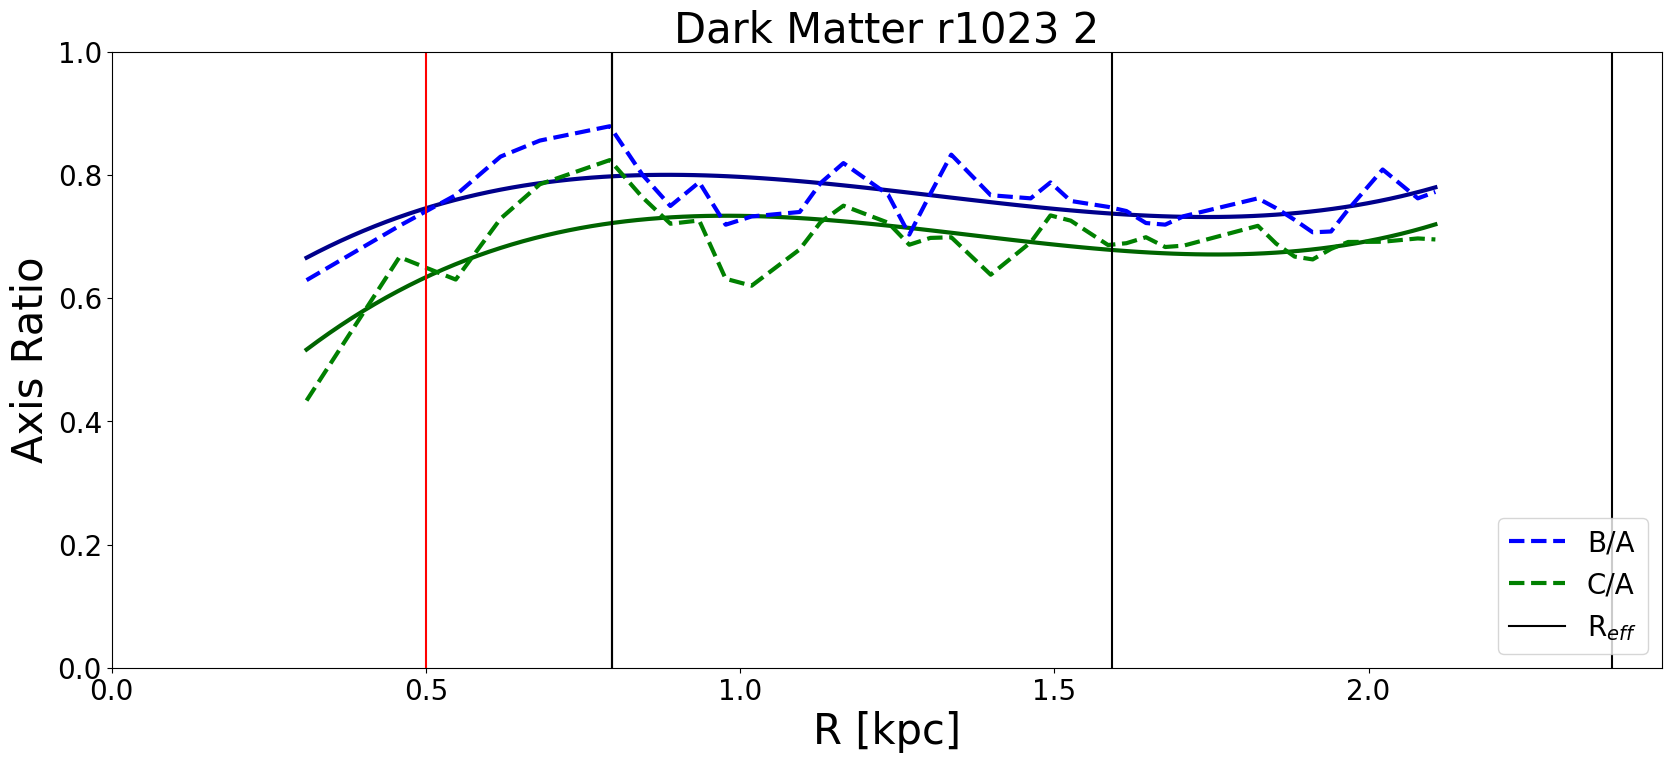

In [6]:
import os,pickle
import matplotlib.pylab as plt
from pynbody.sph import smooth
from scipy.interpolate import UnivariateSpline as Smooth
import numpy as np
#import argparse
import traceback
import pathlib
import sys
#parser = argparse.ArgumentParser(description='Smoothly interpolate Radial Bins for Shapes')
#args = parser.parse_args()
verbose = False


from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d


# def variable_sigma(r, reff, sigma_start=10, sigma_end=3):
#     # Linear interpolation for sigma
#     return sigma_start + (sigma_end - sigma_start) * np.minimum(r / reff, 1)
#
# def gaussian_smooth(x, y, reff):
#     # Calculate variable sigma for each point
#     sigma_values = variable_sigma(x, reff)
#
#     # Apply Gaussian filter with variable sigma
#     y_smooth = np.zeros_like(y)
#     for i in range(len(y)):
#         y_smooth[i] = gaussian_filter1d(y, sigma_values[i])[i]
#
#     y_smooth = np.clip(y_smooth, 0, 1)  # Ensure values are between 0 and 1
#
#     # Create an interpolation function
#     f = interp1d(x, y_smooth, kind='cubic', fill_value='extrapolate')
#
#     # Display a warning if y values are not between 0 and 1
#     if np.any(y_smooth < 0) or np.any(y_smooth > 1):
#         print('Warning: Some smoothed values are not in the physical range [0, 1]')
#
#     # Return a callable function that clips the output between 0 and 1
#     return lambda x_new: np.clip(f(x_new), 0, 1)


from scipy.interpolate import UnivariateSpline as Smooth


def gaussian_smooth(x, y, distance=0.2, sigma=6):
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Create a new array for smoothed y values
    y_smooth = np.zeros_like(y_sorted)

    for i, xi in enumerate(x_sorted):
        # Find indices of points within the specified distance
        mask = np.abs(x_sorted - xi) <= distance
        x_window = x_sorted[mask]
        y_window = y_sorted[mask]

        # Apply Gaussian smoothing to the window
        if len(y_window) > 1:
            y_smooth[i] = gaussian_filter1d(y_window, sigma)[0]
        else:
            y_smooth[i] = y_window[0]

    # Clip values between 0 and 1
    y_smooth = np.clip(y_smooth, 0, 1)

    # Create an interpolation function
    f = interp1d(x_sorted, y_smooth, kind='cubic', fill_value='extrapolate')

    # Display a warning if y values are not between 0 and 1
    if np.any(y_smooth < 0) or np.any(y_smooth > 1):
        print(
            'Warning: Some smoothed values are not in the physical range [0, 1]')

    # # Return a callable function that clips the output between 0 and 1
    # return lambda x_new: np.clip(f(x_new), 0, 1)
    return f

import numpy as np
from scipy.interpolate import UnivariateSpline

# 
# def nanfunction(x):
#     return x*0 +10

from scipy.interpolate import UnivariateSpline
def smooth_and_filter_data(rbins, ba, ca, k=3, s_factor=0.01, residual_threshold=0.3, jump_threshold=0.2, jump_percentage=0.05):
    """
    Smooth and filter data, handling a few NaN values gracefully.

    Parameters:
    rbins, ba, ca: array-like, input data
    k: int, degree of the smoothing spline (default 3)
    s_factor: float, smoothing factor as a fraction of len(rbins) (default 0.01)
    residual_threshold, jump_threshold, jump_percentage: unused in this version

    Returns:
    rbins, ba, ca: filtered arrays
    ba_s, ca_s: smoothed spline functions
    """
    import numpy as np
    from scipy.interpolate import UnivariateSpline

    # Remove rows where either ba or ca is NaN
    mask = ~np.isnan(ba) & ~np.isnan(ca)
    rbins_filtered = rbins[mask]
    ba_filtered = ba[mask]
    ca_filtered = ca[mask]

    # Calculate smoothing parameter
    s = s_factor * len(rbins_filtered)

    # Create splines
    ba_s = UnivariateSpline(rbins_filtered, ba_filtered, k=k, s=s)
    ca_s = UnivariateSpline(rbins_filtered, ca_filtered, k=k, s=s)

    # Print some diagnostic information
    print(f"Total data points: {len(rbins)}")
    print(f"Data points after NaN removal: {len(rbins_filtered)}")
    print(f"NaN percentage: {(1 - len(rbins_filtered)/len(rbins))*100:.2f}%")

    n = len(rbins_filtered)
    #calculate residuals and remove outliers
    ba_residuals = ba_filtered - ba_s(rbins_filtered)
    ca_residuals = ca_filtered - ca_s(rbins_filtered)
    #calculate the standard deviation of the residuals
    ba_std = np.std(ba_residuals)
    ca_std = np.std(ca_residuals)
    #remove outliers
    d = 3


    mask = np.abs(ba_residuals) < d*ba_std


    rbins_filtered = rbins_filtered[mask]
    ba_filtered = ba_filtered[mask]
    ca_filtered = ca_filtered[mask]
    mask = np.abs(ca_residuals[mask]) < d*ca_std
    rbins_filtered = rbins_filtered[mask]
    ba_filtered = ba_filtered[mask]
    ca_filtered = ca_filtered[mask]
    # Recreate splines
    ba_s = UnivariateSpline(rbins_filtered, ba_filtered, k=k, s=s)
    ca_s = UnivariateSpline(rbins_filtered, ca_filtered, k=k, s=s)


    # Print some diagnostic information
    print(f"Data points after outlier removal: {len(rbins_filtered)}")
    print(f"Outlier percentage: {(1 - len(rbins_filtered)/len(rbins))*100:.2f}%")

    #clip the function to 0,1
    ba_s_c = lambda x: np.clip(ba_s(x),0,1)
    ca_s_c = lambda x: np.clip(ca_s(x),0,1)




    return rbins_filtered, ba_filtered, ca_filtered, ba_s_c, ca_s_c

# Example usage:
# rbins_filtered, ba_filtered, ca_filtered, ba_smooth, ca_smooth = smooth_and_filter_data(rbins, ba, ca)

# Example usage:
# rbins, ba, ca = your_data_here
# rbins_filtered, ba_filtered, ca_filtered, ba_smooth, ca_smooth = smooth_and_filter_data(rbins, ba, ca)


# loop,remake=True,False
# while loop:
#     rem = input('Remake Image Directory: Figures/3DShapes/- (y/n): ')
#     if rem in ['y','n']:
#         loop = False
#         if rem=='y': remake = True
# if remake:
#     #os.system('rmdir -f ../Figures/3DShapes')
#     #os.system('mkdir ../figures/3DShapes')
#     for sim in SimInfo:
#         os.system(f'mkdir ../../Figures/3DShapes/{sim}.{feedback}/')
windows = {
    '3DShapes':{
    'cptmarvel-10':[.65,2],
    'elektra-3':[.4,.8],
    'storm-2':[5,40],
    'storm-8':[3,10],
    'rogue-7':[.8,1],
    'rogue-8':[0,1],
    },
    'DMShapes':{

    }
}

path = '/home/bk639/MorphologyMeasurements/Code'
sys.path.append(path)
#print(sys.path)

# Import the SimInfoDicts package
from SimInfoDicts.sim_type_name import sim_type_name

sim_type_name['BWMDC'] = False
sim_type_name['MerianCDM'] = True
#add path to sys.path for jupyter notebook
#path /home/bk639/MorphologyMeasurements/SimInfoDicts

#only make for a few sims
sims_to_use = ['cptmarvel']


for feedback, use_sim in sim_type_name.items():
    for t in ['3DShapes','DMShapes']:
        #if feedback=='BWMDC':
            #continue
        if use_sim:
            print(f'Calculating masses for {feedback} feedback type.')
            pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
            if os.path.exists(pickle_path):
                SimInfo = pickle.load(open(pickle_path, 'rb'))
                #add a check to see if the mass file already exists, if it does, we need to make sure it has all the current sims
                for sim in SimInfo:
                    # if sim not in sims_to_use:
                    #     continue
                    try:
                        Shapes = pickle.load(open(f'../../Data/{sim}.{feedback}.{t}.pickle','rb'))
                    except FileNotFoundError:
                        print(f'Error loading {sim}.{feedback}.{t}.pickle')
                    try:
                        Profiles = pickle.load(open(f'../../Data/{sim}.{feedback}.Profiles.pickle','rb'))
                    except FileNotFoundError:
                        print(f'Error loading {sim}.{feedback}.Profiles.pickle')
                    for hid in SimInfo[sim]['goodhalos']:
                        #for t in ['DMShapes','3DShapes']:
                            try:
                                rbins,ba,ca=Shapes[hid]['rbins'],Shapes[hid]['ba'], Shapes[hid]['ca']
                                reffs = []
                                if len(rbins)>0:
                                    #print('halo',hid)

                                    for angle in Profiles[str(hid)]:
                                        try:
                                            reffs.append(Profiles[str(hid)][angle]['Reff'])
                                        except IndexError:
                                            if verbose:
                                                print(f'IndexError angle {angle} for halo {hid} in {sim}.{feedback}.Profiles.pickle')
                                        break

                                    f,ax=plt.subplots(1,1,figsize=(20,8))
                                    ax.set_xlim([0,max(rbins)])
                                    ax.set_ylim([0,1])
                                    ax.set_xlabel('R [kpc]',fontsize=30)
                                    ax.set_ylabel('Axis Ratio',fontsize=30)
                                    ax.tick_params(which='both',labelsize=20)
                                    lw = 3

                                    try:
                                        r_bins, ba_f, ca_f, ba_s, ca_s = smooth_and_filter_data(rbins, ba, ca)
                                        r_smooth = np.linspace(min(r_bins),max(r_bins),100)
                                        ax.plot(r_smooth,ba_s(r_smooth),c='darkblue',linestyle='-',lw=lw)
                                        ax.plot(r_smooth,ca_s(r_smooth),c='darkgreen',linestyle='-',lw=lw)
                                        #print(ba,ba_s(rbins))
                                        #Shapes[str(hid)]['ba_smooth'] = ba_s
                                        #Shapes[str(hid)]['ca_smooth'] = ca_s
                                    except Exception as e:
                                        print(f"An error occurred during smoothing sim {sim} halo {hid} type {t}: {e}")
                                        print(traceback.format_exc())


                                    ax.plot(r_bins,ba_f,c='b',label='B/A',lw=lw,ls='--')
                                    ax.plot(r_bins,ca_f,c='g',label='C/A',lw=lw,ls='--')
                                    ax.set_xlim([0,3.1*reffs[0]])
                                    if t == '3DShapes':
                                        title = f'Stars {sim} {hid}'
                                    else:
                                        title = f'Dark Matter {sim} {hid}'
                                    ax.set_title(f'{title}',fontsize=30)
                                    #add horizontal lines at 0.5 kpc, 1 * reffs[0]], 2 * reffs[0]], 3 * reffs[0]]
                                    for i in range(1,4):
                                        ax.axvline(i*reffs[0],c='k',alpha=1)
                                    ax.axvline(.5,c='r',alpha=1)
                                    #ba_s,ca_s = gaussian_smooth(rbins,ba,.3,10),gaussian_smooth(rbins,ca,.3,10)





                                    ax.axvline(reffs[0],c='k',alpha=1,label=r'R$_{eff}$')

                                    ax.legend(loc='lower right',prop={'size':20})
                                    fname='Stars' if t=='3DShapes' else 'Dark'
                                    #create folder if it doesn't exist
                                    if not os.path.exists(f'../../Figures/3DShapesv2/{sim}.{feedback}/'):
                                        os.makedirs(f'../../Figures/3DShapesv2/{sim}.{feedback}/')
                                    filename = f'../../Figures/3DShapesv2/{sim}.{feedback}/{fname}.{hid}.png'
                                    print(f'Saving {filename}')
                                    f.savefig(filename,bbox_inches='tight',pad_inches=.1)
                                    #plt.close()


                                    



                            except Exception as e:
                                print(traceback.format_exc())
                                print(f"An error processing sim {sim} halo {hid} type {t}: {e}")




                        #pickle.dump(Shapes,open(f'../../Data/{sim}.{feedback}.{t}.pickle','wb'))
print('Smoothing Done')

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

def gaussian_smooth(x, y, sigma):
    y_smooth = gaussian_filter1d(y, sigma)
    y_smooth = np.clip(y_smooth, 0, 1)
    f = interp1d(x, y_smooth, kind='cubic', fill_value='extrapolate')
    if np.any(y_smooth < 0) or np.any(y_smooth > 1):
        print('Warning: Some smoothed values are not in the physical range [0, 1]')
    return lambda x_new: np.clip(f(x_new), 0, 1)

# Import the SimInfoDicts package
from SimInfoDicts.sim_type_name import sim_type_name

sims_to_use = ['r468']

for feedback, use_sim in sim_type_name.items():
    # if feedback == 'BWMDC':
    #     continue
    if use_sim:
        print(f'Calculating masses for {feedback} feedback type.')
        pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
        if os.path.exists(pickle_path):
            SimInfo = pickle.load(open(pickle_path, 'rb'))
            for sim in SimInfo:
                if sim not in sims_to_use:
                    continue

                try:

                    Shapes_3D = pickle.load(open(f'../../Data/{sim}.{feedback}.3DShapes.pickle', 'rb'))
                    Shapes_DM = pickle.load(open(f'../../Data/{sim}.{feedback}.DMShapes.pickle', 'rb'))
                    Profiles = pickle.load(open(f'../../Data/{sim}.{feedback}.Profiles.pickle', 'rb'))
                except FileNotFoundError as e:
                    print(f'Error loading pickle file: {e}')
                    continue

                for hid in SimInfo[sim]['goodhalos']:
                    try:
                        rbins_3D, ba_3D, ca_3D = Shapes_3D[str(hid)]['rbins'], Shapes_3D[str(hid)]['ba'], Shapes_3D[str(hid)]['ca']
                        rbins_DM, ba_DM, ca_DM = Shapes_DM[str(hid)]['rbins'], Shapes_DM[str(hid)]['ba'], Shapes_DM[str(hid)]['ca']

                        print(len(rbins_3D), len(rbins_DM))
                        print(rbins_DM[0],rbins_3D[0],rbins_DM[-1],rbins_3D[-1])

                        reffs = []
                        for angle in Profiles[str(hid)]:
                            try:
                                reffs.append(Profiles[str(hid)][angle]['Reff'])
                            except IndexError:
                                print(f'IndexError angle {angle} for halo {hid} in {sim}.{feedback}.Profiles.pickle')
                            break

                        if len(rbins_3D) > 0 and len(rbins_DM) > 0:
                            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

                            max_r = max(max(rbins_3D), max(rbins_DM))
                            for ax in (ax1, ax2):
                                ax.set_xlim([0, 3.1 * reffs[0]])
                                ax.set_ylim([0, 1])
                                #ax.set_xlabel('R [kpc]', fontsize=20)
                                #ax.set_ylabel('Axis Ratio', fontsize=20)
                                ax.tick_params(which='both', labelsize=16)
                                #disable grid
                                ax.grid(False)

                            lw = 2
                            # Plot B/A
                            ax1.plot(rbins_3D, ba_3D, c='r', label='Stars B/A', lw=lw, ls='--')
                            ax1.plot(rbins_DM, ba_DM, c='b', label='DM B/A', lw=lw, ls='--')
                            ba_s_3D, ba_s_DM = gaussian_smooth(rbins_3D, ba_3D, 3), gaussian_smooth(rbins_DM, ba_DM, 3)
                            ax1.plot(rbins_3D, ba_s_3D(rbins_3D), c='darkred', linestyle='-', lw=lw)
                            ax1.plot(rbins_DM, ba_s_DM(rbins_DM), c='darkblue', linestyle='-', lw=lw)
                            #ax1.set_title(f'B/A Ratio - {sim}', fontsize=24)
                            ax1.set_ylabel('Q=B/A', fontsize=33)

                            # Plot C/A
                            ax2.plot(rbins_3D, ca_3D, c='r', label='Stars C/A', lw=lw, ls='--')
                            ax2.plot(rbins_DM, ca_DM, c='b', label='DM C/A', lw=lw, ls='--')
                            ca_s_3D, ca_s_DM = gaussian_smooth(rbins_3D, ca_3D, 3), gaussian_smooth(rbins_DM, ca_DM, 3)
                            ax2.plot(rbins_3D, ca_s_3D(rbins_3D), c='darkred', linestyle='-', lw=lw)
                            ax2.plot(rbins_DM, ca_s_DM(rbins_DM), c='darkblue', linestyle='-', lw=lw)
                            #ax2.set_title(f'C/A Ratio - {sim}', fontsize=24)
                            ax2.set_ylabel('S=C/A', fontsize=33)
                            ax2.set_xlabel('R [kpc]', fontsize=20)

                            for ax in (ax1, ax2):
                                for i in range(1, 4):
                                    ax.axvline(i * reffs[0], c='k', alpha=0.5)
                                ax.axvline(0.5, c='k', alpha=0.5, linestyle='--')
                                ax.axvline(reffs[0], c='k', alpha=1, label=r'R$_{eff}$')
                                ax.legend(loc='lower right', prop={'size': 16})

                            plt.tight_layout()

                            if not os.path.exists(f'../../Figures/3DShapes/{sim}.{feedback}/'):
                                os.makedirs(f'../../Figures/3DShapes/{sim}.{feedback}/')
                            filename = f'../../Figures/3DShapes/{sim}.{feedback}/Combined_Shapes.{hid}.png'
                            print(f'Saving {filename}')
                            fig.savefig(filename, bbox_inches='tight', pad_inches=.1)
                            #plt.close()

                            # Update smoothed values in Shapes dictionaries
                            Shapes_3D[str(hid)]['ba_smooth'] = ba_s_3D
                            Shapes_3D[str(hid)]['ca_smooth'] = ca_s_3D
                            Shapes_DM[str(hid)]['ba_smooth'] = ba_s_DM
                            Shapes_DM[str(hid)]['ca_smooth'] = ca_s_DM

                    except Exception as e:
                        print(f"An error occurred during processing halo {hid}: {e}")

                # Save updated Shapes dictionaries
                #pickle.dump(Shapes_3D, open(f'../../Data/{sim}.{feedback}.3DShapes.pickle', 'wb'))
                #pickle.dump(Shapes_DM, open(f'../../Data/{sim}.{feedback}.DMShapes.pickle', 'wb'))

print('Processing and plotting completed')

In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

feedback_types = ['MerianSIDM', 'MerianCDM']

# Styling variables
FIGURE_SIZE = (20, 12)
LINEWIDTH = 2
FONTSIZE_TITLE = 24
FONTSIZE_LABEL = 20
FONTSIZE_TICK = 16
FONTSIZE_LEGEND = 16
ALPHA_RAW = 0.5
ALPHA_VLINE = 0.5

# Colors
COLOR_SIDM_DM = 'blue'
COLOR_SIDM_STAR = 'red'
COLOR_CDM_DM = 'cyan'
COLOR_CDM_STAR = 'orange'

# Labels
LABEL_SIDM_DM = 'SIDM Dark Matter'
LABEL_SIDM_STAR = 'SIDM Stars'
LABEL_CDM_DM = 'CDM Dark Matter'
LABEL_CDM_STAR = 'CDM Stars'
LABEL_REFF = r'R$_{eff}$'
LABEL_BA = 'Q = B/A'
LABEL_CA = 'S = C/A'
LABEL_R_KPC = 'R [kpc]'

# Dictionary to store SimInfo for each feedback type
SimInfos = {}

# Load SimInfo for each feedback type
for feedback in feedback_types:
    pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
    if os.path.exists(pickle_path):
        with open(pickle_path, 'rb') as f:
            SimInfos[feedback] = pickle.load(f)
    else:
        print(f"Warning: {pickle_path} does not exist.")

# Process each SIDM simulation and compare with corresponding CDM simulation
# Process each SIDM simulation and compare with corresponding CDM simulation
for sim_name in SimInfos['MerianSIDM']:
    #split sim name into parts
    #eg r492.romulus25cvdXsec or r634.romulus25si2s50v35
    sim = sim_name
    # sim_parts = sim_name.split('.')
    # sim = sim_parts[0]
    # SI = sim_parts[1]
    print(f'Processing {sim} for SIDM and CDM comparison.')
    
    try:
        # Load necessary data for SIDM
        sidm_masspath = f'../../Data/BasicData/MerianSIDM.Masses.pickle'
        cdm_masspath = f'../../Data/BasicData/MerianCDM.Masses.pickle'
        
        if os.path.exists(sidm_masspath) and os.path.exists(cdm_masspath):
            with open(sidm_masspath, 'rb') as f:
                sidm_mass_data = pickle.load(f)
            with open(cdm_masspath, 'rb') as f:
                cdm_mass_data = pickle.load(f)
        
        sidm_DMShapes = pickle.load(open(f'../../Data/{sim_name}.MerianSIDM.DMShapes.pickle', 'rb'))
        sidm_StarShapes = pickle.load(open(f'../../Data/{sim_name}.MerianSIDM.3DShapes.pickle', 'rb'))
        sidm_Profiles = pickle.load(open(f'../../Data/{sim_name}.MerianSIDM.Profiles.pickle', 'rb'))
        
        cdm_DMShapes = pickle.load(open(f'../../Data/{sim}.MerianCDM.DMShapes.pickle', 'rb'))
        cdm_StarShapes = pickle.load(open(f'../../Data/{sim}.MerianCDM.3DShapes.pickle', 'rb'))
        cdm_Profiles = pickle.load(open(f'../../Data/{sim}.MerianCDM.Profiles.pickle', 'rb'))
    
    except FileNotFoundError as e:
        print(f'Error loading pickle file: {e}')
        continue

    for hid in SimInfos['MerianSIDM'][sim_name]['goodhalos']:
        try:
            # SIDM data
            sidm_dm_rbins, sidm_dm_ba, sidm_dm_ca = sidm_DMShapes[str(hid)]['rbins'], sidm_DMShapes[str(hid)]['ba'], sidm_DMShapes[str(hid)]['ca']
            sidm_star_rbins, sidm_star_ba, sidm_star_ca = sidm_StarShapes[str(hid)]['rbins'], sidm_StarShapes[str(hid)]['ba'], sidm_StarShapes[str(hid)]['ca']
            
            # CDM data
            cdm_dm_rbins, cdm_dm_ba, cdm_dm_ca = cdm_DMShapes[str(hid)]['rbins'], cdm_DMShapes[str(hid)]['ba'], cdm_DMShapes[str(hid)]['ca']
            cdm_star_rbins, cdm_star_ba, cdm_star_ca = cdm_StarShapes[str(hid)]['rbins'], cdm_StarShapes[str(hid)]['ba'], cdm_StarShapes[str(hid)]['ca']
            
            sidm_sm = np.log10(sidm_mass_data[sim][str(hid)]['Mstar'])
            cdm_sm = np.log10(cdm_mass_data[sim][str(hid)]['Mstar'])

            if len(sidm_dm_rbins) > 0 and len(sidm_star_rbins) > 0 and len(cdm_dm_rbins) > 0 and len(cdm_star_rbins) > 0:
                sidm_reffs = []
                cdm_reffs = []
                for angle in sidm_Profiles[str(hid)]:
                    try:
                        sidm_reffs.append(sidm_Profiles[str(hid)][angle]['Reff'])
                        cdm_reffs.append(cdm_Profiles[str(hid)][angle]['Reff'])
                    except IndexError:
                        print(f'IndexError angle {angle} for halo {hid} in {sim}')
                    break



                # Smoothing parameters
                SMOOTH_SIGMA = 6

                # Create the plot
                f, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True)
                max_r = max(3.1 * sidm_reffs[0], 3.1 * cdm_reffs[0])

                for ax in (ax1, ax2):
                    ax.set_xlim([0, max_r])
                    ax.set_ylim([0, 1])
                    ax.tick_params(which='both', labelsize=FONTSIZE_TICK)
                    # Plot Reff lines with corresponding colors
                    ax.axvline(sidm_reffs[0], c=COLOR_SIDM_DM, alpha=ALPHA_VLINE, linestyle=':', lw=LINEWIDTH, label=f'SIDM {LABEL_REFF}')
                    ax.axvline(cdm_reffs[0], c=COLOR_CDM_DM, alpha=ALPHA_VLINE, linestyle=':', lw=LINEWIDTH, label=f'CDM {LABEL_REFF}')
                    ax.grid(True, alpha=0.3)

                # Plot B/A
                ax1.plot(sidm_dm_rbins, sidm_dm_ba, c=COLOR_SIDM_DM, label=LABEL_SIDM_DM + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                ax1.plot(sidm_star_rbins, sidm_star_ba, c=COLOR_SIDM_STAR, label=LABEL_SIDM_STAR + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                ax1.plot(cdm_dm_rbins, cdm_dm_ba, c=COLOR_CDM_DM, label=LABEL_CDM_DM + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                ax1.plot(cdm_star_rbins, cdm_star_ba, c=COLOR_CDM_STAR, label=LABEL_CDM_STAR + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)

                # Smooth and plot B/A
                sidm_dm_ba_smooth = gaussian_smooth(sidm_dm_rbins, sidm_dm_ba, SMOOTH_SIGMA)
                sidm_star_ba_smooth = gaussian_smooth(sidm_star_rbins, sidm_star_ba, SMOOTH_SIGMA)
                cdm_dm_ba_smooth = gaussian_smooth(cdm_dm_rbins, cdm_dm_ba, SMOOTH_SIGMA)
                cdm_star_ba_smooth = gaussian_smooth(cdm_star_rbins, cdm_star_ba, SMOOTH_SIGMA)

                ax1.plot(sidm_dm_rbins, sidm_dm_ba_smooth(sidm_dm_rbins), c=COLOR_SIDM_DM, label=LABEL_SIDM_DM, lw=LINEWIDTH, ls='-')
                ax1.plot(sidm_star_rbins, sidm_star_ba_smooth(sidm_star_rbins), c=COLOR_SIDM_STAR, label=LABEL_SIDM_STAR, lw=LINEWIDTH, ls='--')
                ax1.plot(cdm_dm_rbins, cdm_dm_ba_smooth(cdm_dm_rbins), c=COLOR_CDM_DM, label=LABEL_CDM_DM, lw=LINEWIDTH, ls='-')
                ax1.plot(cdm_star_rbins, cdm_star_ba_smooth(cdm_star_rbins), c=COLOR_CDM_STAR, label=LABEL_CDM_STAR, lw=LINEWIDTH, ls='--')

                ax1.set_title(f'{sim}{SI} - SIDM vs CDM Comparison (Halo {hid})', fontsize=FONTSIZE_TITLE)
                ax1.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), prop={'size': FONTSIZE_LEGEND})
                ax1.set_ylabel(LABEL_BA, fontsize=FONTSIZE_LABEL)

                # Plot C/A
                ax2.plot(sidm_dm_rbins, sidm_dm_ca, c=COLOR_SIDM_DM, label=LABEL_SIDM_DM + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                ax2.plot(sidm_star_rbins, sidm_star_ca, c=COLOR_SIDM_STAR, label=LABEL_SIDM_STAR + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                ax2.plot(cdm_dm_rbins, cdm_dm_ca, c=COLOR_CDM_DM, label=LABEL_CDM_DM + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                ax2.plot(cdm_star_rbins, cdm_star_ca, c=COLOR_CDM_STAR, label=LABEL_CDM_STAR + ' (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)

                # Smooth and plot C/A
                sidm_dm_ca_smooth = gaussian_smooth(sidm_dm_rbins, sidm_dm_ca, SMOOTH_SIGMA)
                sidm_star_ca_smooth = gaussian_smooth(sidm_star_rbins, sidm_star_ca, SMOOTH_SIGMA)
                cdm_dm_ca_smooth = gaussian_smooth(cdm_dm_rbins, cdm_dm_ca, SMOOTH_SIGMA)
                cdm_star_ca_smooth = gaussian_smooth(cdm_star_rbins, cdm_star_ca, SMOOTH_SIGMA)

                ax2.plot(sidm_dm_rbins, sidm_dm_ca_smooth(sidm_dm_rbins), c=COLOR_SIDM_DM, label=LABEL_SIDM_DM, lw=LINEWIDTH, ls='-')
                ax2.plot(sidm_star_rbins, sidm_star_ca_smooth(sidm_star_rbins), c=COLOR_SIDM_STAR, label=LABEL_SIDM_STAR, lw=LINEWIDTH, ls='--')
                ax2.plot(cdm_dm_rbins, cdm_dm_ca_smooth(cdm_dm_rbins), c=COLOR_CDM_DM, label=LABEL_CDM_DM, lw=LINEWIDTH, ls='-')
                ax2.plot(cdm_star_rbins, cdm_star_ca_smooth(cdm_star_rbins), c=COLOR_CDM_STAR, label=LABEL_CDM_STAR, lw=LINEWIDTH, ls='--')

                ax2.set_ylabel(LABEL_CA, fontsize=FONTSIZE_LABEL)
                ax2.set_xlabel(LABEL_R_KPC, fontsize=FONTSIZE_LABEL)

                # Create new folder for saving figures
                os.makedirs('../../Figures/3DShapes/SIDM_CDM_Comparison/', exist_ok=True)
                
                plt.tight_layout()
                plt.savefig(f'../../Figures/3DShapes/SIDM_CDM_Comparison/Shapes.{sim}{SI}.SIDM_vs_CDM.{hid}.png')
                #plt.close()

        except Exception as e:
            print(f"An error occurred during processing halo {hid} in {sim}: {e}")

print("Processing complete.")

In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

feedback_types = ['MerianSIDM', 'MerianCDM']

# Dictionary to store SimInfo for each feedback type
SimInfos = {}

# Load SimInfo for each feedback type
for feedback in feedback_types:
    pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
    if os.path.exists(pickle_path):
        with open(pickle_path, 'rb') as f:
            SimInfos[feedback] = pickle.load(f)
    else:
        print(f"Warning: {pickle_path} does not exist.")

# Process each SIDM simulation and compare with corresponding CDM simulation
# Process each SIDM simulation and compare with corresponding CDM simulation
for sim in SimInfos['MerianSIDM']:
    print(f'Processing {sim} for SIDM and CDM comparison.')

    try:
        # Load necessary data for SIDM
        sidm_masspath = f'../../Data/BasicData/MerianSIDM.Masses.pickle'
        cdm_masspath = f'../../Data/BasicData/MerianCDM.Masses.pickle'

        if os.path.exists(sidm_masspath) and os.path.exists(cdm_masspath):
            with open(sidm_masspath, 'rb') as f:
                sidm_mass_data = pickle.load(f)
            with open(cdm_masspath, 'rb') as f:
                cdm_mass_data = pickle.load(f)

        sidm_DMShapes = pickle.load(open(f'../../Data/{sim}.MerianSIDM.DMShapes.pickle', 'rb'))
        sidm_StarShapes = pickle.load(open(f'../../Data/{sim}.MerianSIDM.3DShapes.pickle', 'rb'))
        sidm_Profiles = pickle.load(open(f'../../Data/{sim}.MerianSIDM.Profiles.pickle', 'rb'))

        cdm_DMShapes = pickle.load(open(f'../../Data/{sim}.MerianCDM.DMShapes.pickle', 'rb'))
        cdm_StarShapes = pickle.load(open(f'../../Data/{sim}.MerianCDM.3DShapes.pickle', 'rb'))
        cdm_Profiles = pickle.load(open(f'../../Data/{sim}.MerianCDM.Profiles.pickle', 'rb'))

    except FileNotFoundError as e:
        print(f'Error loading pickle file: {e}')
        continue

    for hid in SimInfos['MerianSIDM'][sim]['goodhalos']:
        try:
            # SIDM data
            sidm_dm_rbins, sidm_dm_ba, sidm_dm_ca = sidm_DMShapes[str(hid)]['rbins'], sidm_DMShapes[str(hid)]['ba'], sidm_DMShapes[str(hid)]['ca']
            sidm_star_rbins, sidm_star_ba, sidm_star_ca = sidm_StarShapes[str(hid)]['rbins'], sidm_StarShapes[str(hid)]['ba'], sidm_StarShapes[str(hid)]['ca']

            # CDM data
            cdm_dm_rbins, cdm_dm_ba, cdm_dm_ca = cdm_DMShapes[str(hid)]['rbins'], cdm_DMShapes[str(hid)]['ba'], cdm_DMShapes[str(hid)]['ca']
            cdm_star_rbins, cdm_star_ba, cdm_star_ca = cdm_StarShapes[str(hid)]['rbins'], cdm_StarShapes[str(hid)]['ba'], cdm_StarShapes[str(hid)]['ca']

            sidm_sm = np.log10(sidm_mass_data[sim][str(hid)]['Mstar'])
            cdm_sm = np.log10(cdm_mass_data[sim][str(hid)]['Mstar'])

            if len(sidm_dm_rbins) > 0 and len(sidm_star_rbins) > 0 and len(cdm_dm_rbins) > 0 and len(cdm_star_rbins) > 0:
                sidm_reffs = []
                cdm_reffs = []
                for angle in sidm_Profiles[str(hid)]:
                    try:
                        sidm_reffs.append(sidm_Profiles[str(hid)][angle]['Reff'])
                        cdm_reffs.append(cdm_Profiles[str(hid)][angle]['Reff'])
                    except IndexError:
                        print(f'IndexError angle {angle} for halo {hid} in {sim}')
                    break
                
                # Styling variables
                FIGURE_SIZE = (12, 10)
                LINEWIDTH = 2
                FONTSIZE_TITLE = 24
                FONTSIZE_LABEL = 16
                FONTSIZE_TICK = 12
                FONTSIZE_LEGEND = 12
                ALPHA_RAW = 0.3
                ALPHA_VLINE = 0.5
                
                # Colors
                COLOR_SIDM = 'red'
                COLOR_CDM = 'blue'
                
                # Labels
                LABEL_SIDM = 'SIDM'
                LABEL_CDM = 'CDM'
                LABEL_REFF = r'R$_{eff}$'
                LABEL_BA = 'Q = B/A'
                LABEL_CA = 'S = C/A'
                LABEL_R_KPC = 'R [kpc]'
                
                # Smoothing parameters
                SMOOTH_SIGMA = 6
                
                def gaussian_smooth(x, y, sigma):
                    x_smooth = np.linspace(x.min(), x.max(), 500)
                    y_smooth = gaussian_filter1d(np.interp(x_smooth, x, y), sigma)
                    return interp1d(x_smooth, y_smooth, bounds_error=False, fill_value="extrapolate")
                
                # Create the plot
                fig, axs = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True)
                axs = axs.flatten()
                max_r = max(3.1 * sidm_reffs[0], 3.1 * cdm_reffs[0])
                
                for ax in axs.flatten():
                    ax.set_xlim([0, max_r])
                    ax.set_ylim([0, 1])
                    ax.tick_params(which='both', labelsize=FONTSIZE_TICK)
                    ax.grid(True, alpha=0.3)
                
                # Plot Dark Matter B/A
                axs[0].plot(sidm_dm_rbins, sidm_dm_ba, c=COLOR_SIDM, label=f'{LABEL_SIDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                axs[0].plot(cdm_dm_rbins, cdm_dm_ba, c=COLOR_CDM, label=f'{LABEL_CDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                
                sidm_dm_ba_smooth = gaussian_smooth(sidm_dm_rbins, sidm_dm_ba, SMOOTH_SIGMA)
                cdm_dm_ba_smooth = gaussian_smooth(cdm_dm_rbins, cdm_dm_ba, SMOOTH_SIGMA)
                
                axs[0].plot(sidm_dm_rbins, sidm_dm_ba_smooth(sidm_dm_rbins), c=COLOR_SIDM, label=LABEL_SIDM, lw=LINEWIDTH, ls='-')
                axs[0].plot(cdm_dm_rbins, cdm_dm_ba_smooth(cdm_dm_rbins), c=COLOR_CDM, label=LABEL_CDM, lw=LINEWIDTH, ls='-')
                #axs[0].set_title('Dark Matter B/A', fontsize=FONTSIZE_TITLE)
                axs[0].set_ylabel(LABEL_BA, fontsize=FONTSIZE_LABEL)
                axs[0].legend(loc='lower left', fontsize=FONTSIZE_LEGEND)
                
                # Plot Dark Matter C/A
                axs[1].plot(sidm_dm_rbins, sidm_dm_ca, c=COLOR_SIDM, label=f'{LABEL_SIDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                axs[1].plot(cdm_dm_rbins, cdm_dm_ca, c=COLOR_CDM, label=f'{LABEL_CDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                
                sidm_dm_ca_smooth = gaussian_smooth(sidm_dm_rbins, sidm_dm_ca, SMOOTH_SIGMA)
                cdm_dm_ca_smooth = gaussian_smooth(cdm_dm_rbins, cdm_dm_ca, SMOOTH_SIGMA)
                
                axs[1].plot(sidm_dm_rbins, sidm_dm_ca_smooth(sidm_dm_rbins), c=COLOR_SIDM, label=LABEL_SIDM, lw=LINEWIDTH, ls='-')
                axs[1].plot(cdm_dm_rbins, cdm_dm_ca_smooth(cdm_dm_rbins), c=COLOR_CDM, label=LABEL_CDM, lw=LINEWIDTH, ls='-')
                #axs[1].set_title('Dark Matter C/A', fontsize=FONTSIZE_TITLE)
                axs[1].set_ylabel(LABEL_CA, fontsize=FONTSIZE_LABEL)
                axs[1].set_xlabel(LABEL_R_KPC, fontsize=FONTSIZE_LABEL)
                axs[1].legend(loc='lower left', fontsize=FONTSIZE_LEGEND)
                print('SIDM',len(sidm_dm_rbins),sidm_dm_rbins[0],sidm_dm_rbins[-1])
                print('CDM',len(cdm_dm_rbins),cdm_dm_rbins[0],cdm_dm_rbins[-1])
                
                # # Plot Stellar B/A
                # axs[2].plot(sidm_star_rbins, sidm_star_ba, c=COLOR_SIDM, label=f'{LABEL_SIDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                # axs[2].plot(cdm_star_rbins, cdm_star_ba, c=COLOR_CDM, label=f'{LABEL_CDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                #
                # sidm_star_ba_smooth = gaussian_smooth(sidm_star_rbins, sidm_star_ba, SMOOTH_SIGMA)
                # cdm_star_ba_smooth = gaussian_smooth(cdm_star_rbins, cdm_star_ba, SMOOTH_SIGMA)
                #
                # axs[2].plot(sidm_star_rbins, sidm_star_ba_smooth(sidm_star_rbins), c=COLOR_SIDM, label=LABEL_SIDM, lw=LINEWIDTH, ls='-')
                # axs[2].plot(cdm_star_rbins, cdm_star_ba_smooth(cdm_star_rbins), c=COLOR_CDM, label=LABEL_CDM, lw=LINEWIDTH, ls='-')
                # axs[2].set_title('Stellar B/A', fontsize=FONTSIZE_TITLE)
                # axs[2].legend(loc='lower left', fontsize=FONTSIZE_LEGEND)
                #
                # # Plot Stellar C/A
                # axs[3].plot(sidm_star_rbins, sidm_star_ca, c=COLOR_SIDM, label=f'{LABEL_SIDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                # axs[3].plot(cdm_star_rbins, cdm_star_ca, c=COLOR_CDM, label=f'{LABEL_CDM} (raw)', lw=LINEWIDTH, ls=':', alpha=ALPHA_RAW)
                #
                # sidm_star_ca_smooth = gaussian_smooth(sidm_star_rbins, sidm_star_ca, SMOOTH_SIGMA)
                # cdm_star_ca_smooth = gaussian_smooth(cdm_star_rbins, cdm_star_ca, SMOOTH_SIGMA)
                #
                # axs[3].plot(sidm_star_rbins, sidm_star_ca_smooth(sidm_star_rbins), c=COLOR_SIDM, label=LABEL_SIDM, lw=LINEWIDTH, ls='-')
                # axs[3].plot(cdm_star_rbins, cdm_star_ca_smooth(cdm_star_rbins), c=COLOR_CDM, label=LABEL_CDM, lw=LINEWIDTH, ls='-')
                # axs[3].set_title('Stellar C/A', fontsize=FONTSIZE_TITLE)
                # axs[3].set_xlabel(LABEL_R_KPC, fontsize=FONTSIZE_LABEL)
                # axs[3].legend(loc='lower left', fontsize=FONTSIZE_LEGEND)
                
                # Add Reff lines to all subplots
                for ax in axs.flatten():
                    for i in range(1, 4):
                        ax.axvline(sidm_reffs[0]*i, c=COLOR_SIDM, alpha=ALPHA_VLINE, linestyle=':', lw=LINEWIDTH, label=f'{LABEL_SIDM} {LABEL_REFF}')
                        ax.axvline(cdm_reffs[0]*i, c=COLOR_CDM, alpha=ALPHA_VLINE, linestyle=':', lw=LINEWIDTH, label=f'{LABEL_CDM} {LABEL_REFF}')
                    #add line at .5kpc
                    ax.axvline(.5, c='k', alpha=ALPHA_VLINE, linestyle='--', lw=LINEWIDTH, label='0.5 kpc')
                #get stellar mass from mass data
                sidm_sm = np.log10(sidm_mass_data[sim][str(hid)]['Mstar'])
                cdm_sm = np.log10(cdm_mass_data[sim][str(hid)]['Mstar'])
                
                plt.suptitle(f'{sim} - SIDM M* = {sidm_sm:.1f} vs CDM M* = {cdm_sm:.1f} Comparison (Halo {hid})' , fontsize=FONTSIZE_TITLE)
                plt.tight_layout()
                plt.savefig(f'../../Figures/3DShapes/SIDM_CDM_Comparison/Shapes.{sim}.SIDM_vs_CDM.{hid}.png')

        except Exception as e:
            print(f"An error occurred during processing halo {hid} in {sim}: {e}")

print("Processing complete.")